> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate The TMBD Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**This is a TMBD movie data set and I am going to Analyiz it to undertsand**
1. The internet avilability on the Industry
2. The impact of economical recession on the Movie industry

**References**
1. https://github.com/palewire/cpi
2. https://github.com/celiao/tmdbsimple/
3. https://www.kaggle.com/tmdb/tmdb-movie-metadata/discussion/58203
4. https://www.kaggle.com/tmdb/tmdb-movie-metadata/discussion/271794
5. https://towardsdatascience.com/the-easiest-way-to-adjust-your-data-for-inflation-in-python-365490c03969

In [54]:
# install the tmbd library to get the movie missing info
!pip install tmdbsimple
# install the CPI library will be used to convert budget to 2010 inflation rate as it is the refereance as per the documentation
!pip install cpi
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas
# !pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


In [55]:
import pandas as pd
# Supress warning is not a recomennded option, however I enabled it as I got several warning
## visit: https://www.dataquest.io/blog/settingwithcopywarning/ (Mentioned in the references)
pd.set_option('mode.chained_assignment', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for internet calls to try toget as much data as possible
import requests
import json
# TMBD Library
import tmdbsimple as tmdb
tmdb.API_KEY = 'ADD_YOUR_TMBD_TOKEN_HERE' # please add your key if you reached max limit to be able to continue
# for inflation adjustment
import cpi
# For date time function
import datetime
# for time claulations to meausre how long a function takes
import time

In [56]:
#-> can be Commented if you don't want inflation updated data especially that it takes long time to run
cpi.update() 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

<a id='generalfunctions'></a>
## General functions

> **Imp**: This section will include the general functions that may be used by one or of the below cels

In [57]:
'''
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of **2010** dollars, accounting for inflation over time.
'''
def get_inflation_adjusted(amount, source_year, target_year):
    amount_adjusted = cpi.inflate(amount, source_year, to=target_year)
    print ('=== START === get_inflation_adjusted === START === ')
    print ('amount ', amount, 'current_year ', source_year, 'target_year ', target_year)
    print ('The adjusted inflation for ', amount, ' is ', amount_adjusted)
    print ('=== FIN === get_inflation_adjusted === FIN === ')
    return amount_adjusted

In [58]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

# display first ten rows of data
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [59]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(10866, 21)

In [60]:
#Get infomrtaion aboy the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [61]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [62]:
# We will use this info to compare between the original description & the later one after cleaning & completeing the data from the interne
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Note** It is clear that we have a lot of missing values so we will try to get them from a source of truth which are TMDB, & imbd
Types of missing values that we will focus on are Zero value, & Nulls.
Then we will count the missing values, now, & then to know how many values we were able to recover

**Columns with Null or Zero values**

In [63]:
# Columns - With Null Value
# return a list of the columns which have missing values
columns_nulls = df.columns[df.isnull().any()]
print('columns_missing_values are: ', columns_nulls, '\n')

for column in columns_nulls:
    print('The number of nulls in ', column, ' is ', df[column].isnull().sum())

columns_missing_values are:  Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object') 

The number of nulls in  imdb_id  is  10
The number of nulls in  cast  is  76
The number of nulls in  homepage  is  7930
The number of nulls in  director  is  44
The number of nulls in  tagline  is  2824
The number of nulls in  keywords  is  1493
The number of nulls in  overview  is  4
The number of nulls in  genres  is  23
The number of nulls in  production_companies  is  1030


In [64]:
# Columns - With Zero Value
# return a list of the columns which have ZERO values
columns_zero_values = df.columns[df.isin([0]).any()]
print('columns_zero_values are: ', columns_zero_values)

'''
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 12  runtime               10866 non-null  int64  
 19  budget_adj            10866 non-null  float64
 20  revenue_adj           10866 non-null  float64
'''
for colum in columns_zero_values:
    value_zero = (df[colum] == 0).sum()
    print('the number of ZERO valuses in ', colum, ' is ', value_zero)
#     value_not_Zero = (df[colum] != 0).sum()
#     print('the number of NOT-ZERO valuses in ', colum, ' is ', value_not_Zero )
#     print ('Total for verification is ', (value_zero+value_not_Zero), '\n')

columns_zero_values are:  Index(['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj'], dtype='object')
the number of ZERO valuses in  budget  is  5696
the number of ZERO valuses in  revenue  is  6016
the number of ZERO valuses in  runtime  is  31
the number of ZERO valuses in  budget_adj  is  5696
the number of ZERO valuses in  revenue_adj  is  6016


**Notes**
- Columns with Null (Missing) values are: (['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']

- Columns with Zero values are:  Index(['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']

**Quick conclusion:**
- Financial related columns has Zero values
- Data related columns has nulls (Missing values)
- The date 'release_date' & year 'release_year' columns has NO missing info. But, the "release_date" columns raws formats are not the same
- The ID column has no missing values which is a good point when we try to get the missing info from the TMBD internet
- The ['popularity', 'Original title', 'Vote_count'] has no missing values

**Raws with Null or Zero values**

In [65]:
#find raws with Zero values
raws_with_zero_values_original = df[df.isin([0]).any(axis=1)]
print(raws_with_zero_values_original)

           id    imdb_id  popularity    budget   revenue  \
30     280996  tt3168230    3.927333         0  29355203   
36     339527  tt1291570    3.358321         0  22354572   
48     265208  tt2231253    2.932340  30000000         0   
67     334074  tt3247714    2.331636  20000000         0   
72     284289  tt2911668    2.272044         0     45895   
...       ...        ...         ...       ...       ...   
10861      21  tt0060371    0.080598         0         0   
10862   20379  tt0060472    0.065543         0         0   
10863   39768  tt0060161    0.065141         0         0   
10864   21449  tt0061177    0.064317         0         0   
10865   22293  tt0060666    0.035919     19000         0   

                 original_title  \
30                   Mr. Holmes   
36                       Solace   
48                    Wild Card   
67                     Survivor   
72             Beyond the Reach   
...                         ...   
10861        The Endless Summer   

In [66]:
# find raws with NULL valus
raws_with_null_values_original = df[df.isnull().any(axis=1)]
print(raws_with_null_values_original)

           id    imdb_id  popularity    budget    revenue  \
18     150689  tt1661199    5.556818  95000000  542351353   
21     307081  tt1798684    5.337064  30000000   91709827   
26     214756  tt2637276    4.564549  68000000  215863606   
32     254470  tt2848292    3.877764  29000000  287506194   
33     296098  tt3682448    3.648210  40000000  162610473   
...       ...        ...         ...       ...        ...   
10861      21  tt0060371    0.080598         0          0   
10862   20379  tt0060472    0.065543         0          0   
10863   39768  tt0060161    0.065141         0          0   
10864   21449  tt0061177    0.064317         0          0   
10865   22293  tt0060666    0.035919     19000          0   

                 original_title  \
18                   Cinderella   
21                     Southpaw   
26                        Ted 2   
32              Pitch Perfect 2   
33              Bridge of Spies   
...                         ...   
10861        The Endle

**Note** find raws with NULL (Missing) values, & Zero Values, we may need to compare that later after cleaning
- Raws with "NULL" valus : [8874 rows x 21 columns]
- Raws with "Zero" values : [7011 rows x 21 columns]

In [67]:
print ('raws_with_null_values : ',raws_with_null_values_original.size)
print ('raws_with_zero_values : ',raws_with_zero_values_original.size)

raws_with_null_values :  186354
raws_with_zero_values :  147231



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

### Data Cleaning
1. Remove duplicates
2. rename id columns to tmbd_id
3. Unify release_date formate
    3.1. change the 2 digit years into 4 digit years
4. fill the missing data from a trusted source
4. adjust inflation values
    4.1. using values already in the dataframe we will find
    - the budjet from adjusted budjet & vicevers
    - the revenue from adjusted revenu & vicevers

### Cleaning step 1 find & drop duplicates duplicates

In [68]:
# count the current duplicates
sum(df.duplicated())

1

We found only 1 duplicate (No columns removed yet)

In [69]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [70]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

### Cleaning Step 2 rename confusing columns

In [71]:
# Cleaning Step 2 rename confusing columns
df.rename(columns={'id': 'tmbd_id'}, inplace=True)

In [72]:
# confirm that rename is sucessuss
df.head(1)

,tmbd_id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Cleaning Step 3 drop columns that willnot be used
**NOTE** on my next Analaysi part I wil lfocus more on financials & not names, so I drop all columns that are notr related to finance
- The following columns will be dropped
-- 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']

- The following columns will stay (TMBD_id used to be known only as id before renaming it)
-- 'TMBD_id', 'popularity', 'budget', 'revenue', 'original_title',  'runtime', 'genres' , 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 

In [73]:
dfng = df.copy()

In [74]:
dfng.head(1)

,tmbd_id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [75]:
dfng = dfng.drop(['imdb_id','cast','homepage','director','tagline','keywords','overview','genres','production_companies', 'release_date'], axis=1)

In [76]:
dfng.head(5)

,tmbd_id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015,1.747999e+08,1.385749e+09


### cleaning step 4 fill the missing from a source of truth 

**Note** 
If you have missing data & can get it from trusted resource, go do it. then do your Analysis
- columns_zero_values are:  Index(['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
**Runtime**
- As it doesn't make sense to have a movie with 0 min. We are going to try to fill the runtime column data as the number of ZERO valuses in runtime column are  31

## !Note  : the below code do multiple internet calls and will take time
### you can skip if you want but the conclussion you will have will differ

In [77]:
#columns_zero_values are:  Index(['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
for i in range(len(dfng['runtime'])):
    if dfng["runtime"].iloc[i] == 0:
        print ('\n the movie ', dfng["original_title"].iloc[i], 'has Zero runtime , & its TMDB_id is ', dfng["tmbd_id"].iloc[i])
        # Get the Movie info from TMBD
        try:
            movie_tmbd_id = dfng["tmbd_id"].iloc[i]
            movie = tmdb.Movies(movie_tmbd_id)

            # get runtime as it doesn't make sense to have a movie with 0 min
            movie_runtime = movie.info()["runtime"]
            if (movie.info()["runtime"] !=0):
                print('the movie ', dfng["original_title"].iloc[i], ' has a TMBD runtime of ', movie_runtime , ' mins')
                # This worked but with a warrning, warning was suppresed see tiop notes of the excercis at import
                dfng["runtime"].iloc[i] = np.int64(movie.info()["runtime"])
                print('The new Runtime is ', dfng["runtime"].iloc[i], '\n')

                # check budget and update 
                # if Original data budgut is Zero
                if (dfng["budget"].iloc[i] != movie.info()["budget"]):
                    print ('\nthe movie ', dfng["original_title"].iloc[i], 'has dfng budget of  : ', dfng["budget"].iloc[i])
                    print ('the movie ', dfng["original_title"].iloc[i], 'has TMDB budget of : ', movie.info()["budget"])
                    if movie.info()["budget"] !=0:
                        dfng["budget"].iloc[i] = movie.info()["budget"]
                        print ('the movie ', dfng["original_title"].iloc[i], 'has updated budget of : ', dfng["budget"].iloc[i])

                        # adjust for inflation
                        print('adjust for inflation \n')
                        print ('the movie ', dfng["original_title"].iloc[i], 'has dfng adjusted budget of : ', dfng["budget_adj"].iloc[i])
                        if dfng["budget_adj"].iloc[i] == 0:
                            movie_budget_adj = get_inflation_adjusted(movie.info()["budget"], dfng["release_year"].iloc[i], 2010)
                            # Replace the 0 budget_adj with the retunred budget_adj
                            print('movie_budget_adj : ', movie_budget_adj)
                            dfng["budget_adj"].iloc[i] = np.int64(movie_budget_adj)
                            print ('the movie ', dfng["original_title"].iloc[i], 'has updated budget of : ', dfng["budget_adj"].iloc[i])

               # check Revenu and update 
                # if Original data of Revenu is Zero
                if (dfng["revenue"].iloc[i] != movie.info()["revenue"]):
                    print ('\nthe movie ', dfng["original_title"].iloc[i], 'has dfng revenu of  : ', dfng["revenue"].iloc[i])
                    print ('the movie ', dfng["original_title"].iloc[i], 'has TMDB revenue of : ', movie.info()["revenue"])
                    if movie.info()["revenue"] !=0:
                        dfng["revenue"].iloc[i] = movie.info()["revenue"]
                        print ('the movie ', dfng["original_title"].iloc[i], 'has updated revenue of : ', dfng["revenue"].iloc[i])

                        # adjust revenue for inflation
                        print('adjust revenue for inflation \n')
                        print ('the movie ', dfng["original_title"].iloc[i], 'has dfng adjusted revenue of : ', dfng["revenue_adj"].iloc[i])
                        if dfng["revenue_adj"].iloc[i] == 0:
                            movie_revenue_adj = get_inflation_adjusted(movie.info()["revenue"], dfng["release_year"].iloc[i], 2010)
                            # Replace the 0 budget_adj with the retunred budget_adj
                            print('movie_revenue_adj : ', movie_revenue_adj)
                            dfng["revenue_adj"].iloc[i] = np.int64(movie_revenue_adj)
                            print ('the movie ', dfng["original_title"].iloc[i], 'has updated revenue_adj of : ', dfng["revenue_adj"].iloc[i])
                
                # check popularity
                if (dfng["popularity"].iloc[i] != movie.info()["popularity"]):
                    print ('\nthe movie ', dfng["original_title"].iloc[i], 'has dfng popularity of  : ', dfng["popularity"].iloc[i], ' & TMDB popularity of : ', movie.info()["popularity"])
                    dfng["popularity"].iloc[i] = movie.info()["popularity"]
                    print ('\nthe movie ', dfng["original_title"].iloc[i], 'has updated  popularity of ', dfng["popularity"].iloc[i])

                # check vote_count
                if (dfng["vote_count"].iloc[i] != movie.info()["vote_count"]):
                    print ('\nthe movie ', dfng["original_title"].iloc[i], 'has dfng vote_count of  : ', dfng["vote_count"].iloc[i], ' & TMDB vote_count of : ', movie.info()["vote_count"])
                    dfng["vote_count"].iloc[i] = movie.info()["vote_count"]
                    print ('\nthe movie ', dfng["original_title"].iloc[i], 'has updated  vote_count of ', dfng["vote_count"].iloc[i])

                    
                # check vote_average
                if (dfng["vote_average"].iloc[i] != movie.info()["vote_average"]):
                    print ('\nthe movie ', dfng["original_title"].iloc[i], 'has dfng vote_average of  : ', dfng["vote_average"].iloc[i], ' & TMDB vote_average of : ', movie.info()["vote_average"])
                    dfng["vote_average"].iloc[i] = movie.info()["vote_average"]
                    print ('\nthe movie ', dfng["original_title"].iloc[i], 'has updated  vote_average of ', dfng["vote_average"].iloc[i])
                    
        except ValueError:
            print("Oops!  That TMBD Request falid")


 the movie  Mythica: The Necromancer has Zero runtime , & its TMDB_id is  370687
the movie  Mythica: The Necromancer  has a TMBD runtime of  93  mins
The new Runtime is  93 


the movie  Mythica: The Necromancer has dfng popularity of  :  1.876037  & TMDB popularity of :  10.279

the movie  Mythica: The Necromancer has updated  popularity of  10.279

the movie  Mythica: The Necromancer has dfng vote_count of  :  11  & TMDB vote_count of :  62

the movie  Mythica: The Necromancer has updated  vote_count of  62

the movie  Mythica: The Necromancer has dfng vote_average of  :  5.4  & TMDB vote_average of :  6.1

the movie  Mythica: The Necromancer has updated  vote_average of  6.1

 the movie  Ronaldo has Zero runtime , & its TMDB_id is  361931
the movie  Ronaldo  has a TMBD runtime of  92  mins
The new Runtime is  92 


the movie  Ronaldo has dfng popularity of  :  0.35765399999999997  & TMDB popularity of :  27.105

the movie  Ronaldo has updated  popularity of  27.105

the movie  Rona

the movie  Toi, moi, les autres  has a TMBD runtime of  85  mins
The new Runtime is  85 


the movie  Toi, moi, les autres has dfng popularity of  :  0.183134  & TMDB popularity of :  4.329

the movie  Toi, moi, les autres has updated  popularity of  4.329

the movie  Toi, moi, les autres has dfng vote_count of  :  17  & TMDB vote_count of :  71

the movie  Toi, moi, les autres has updated  vote_count of  71

the movie  Toi, moi, les autres has dfng vote_average of  :  5.2  & TMDB vote_average of :  6.1

the movie  Toi, moi, les autres has updated  vote_average of  6.1

 the movie  Cell 213 has Zero runtime , & its TMDB_id is  289097
the movie  Cell 213  has a TMBD runtime of  109  mins
The new Runtime is  109 


the movie  Cell 213 has dfng popularity of  :  0.095583  & TMDB popularity of :  5.398

the movie  Cell 213 has updated  popularity of  5.398

the movie  Cell 213 has dfng vote_count of  :  13  & TMDB vote_count of :  49

the movie  Cell 213 has updated  vote_count of  49

the


the movie  The Vatican Exorcisms has dfng vote_count of  :  10  & TMDB vote_count of :  18

the movie  The Vatican Exorcisms has updated  vote_count of  18

the movie  The Vatican Exorcisms has dfng vote_average of  :  4.7  & TMDB vote_average of :  4.3

the movie  The Vatican Exorcisms has updated  vote_average of  4.3

 the movie  The 12 Dogs of Christmas has Zero runtime , & its TMDB_id is  26985
the movie  The 12 Dogs of Christmas  has a TMBD runtime of  107  mins
The new Runtime is  107 


the movie  The 12 Dogs of Christmas has dfng popularity of  :  0.37163  & TMDB popularity of :  4.597

the movie  The 12 Dogs of Christmas has updated  popularity of  4.597

the movie  The 12 Dogs of Christmas has dfng vote_count of  :  11  & TMDB vote_count of :  24

the movie  The 12 Dogs of Christmas has updated  vote_count of  24

the movie  The 12 Dogs of Christmas has dfng vote_average of  :  4.7  & TMDB vote_average of :  5.3

the movie  The 12 Dogs of Christmas has updated  vote_average

tmbd_id	popularity	budget	revenue	original_title	runtime	release_date	vote_count	vote_average

### Cleaning step 5 1st  Evaluation after adjusting for runtime from TMBD runtime, & not needed columns

In [78]:
# Columns - With no Value
# return a list of the columns which have missing values
dfng_columns_missing_values = dfng.columns[dfng.isnull().any()]
print('dfng_columns_missing_values are: ', dfng_columns_missing_values, '\n')

for column in dfng_columns_missing_values:
    print('the number of missing valuses in ', column, ' is ', dfng[column].isnull().sum())

dfng_columns_missing_values are:  Index([], dtype='object') 



In [79]:
# Columns - With Zero Value
# return a list of the columns which have ZERO values
dfng_columns_zero_values = dfng.columns[dfng.isin([0]).any()]
print('dfng_columns_zero_values are: ', dfng_columns_zero_values)


for colum in dfng_columns_zero_values:
    dfng_value_zero = (dfng[colum] == 0).sum()
    print('The number of ZERO valuses in ', colum, ' is ', dfng_value_zero)

dfng_columns_zero_values are:  Index(['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj'], dtype='object')
The number of ZERO valuses in  budget  is  5694
The number of ZERO valuses in  revenue  is  6014
The number of ZERO valuses in  runtime  is  4
The number of ZERO valuses in  budget_adj  is  5694
The number of ZERO valuses in  revenue_adj  is  6014


In [80]:
#find raws with Zero values
dfng_raws_with_zero_values = dfng[dfng.isin([0]).any(axis=1)]

In [81]:
# find raws with NULL valus
dfng_raws_with_null_values = dfng[dfng.isnull().any(axis=1)]

In [82]:
print ('dfng_ raws_with_null_values : ',dfng_raws_with_null_values.size)
print ('dfng_ raws_with_zero_values : ',dfng_raws_with_zero_values.size)

dfng_ raws_with_null_values :  0
dfng_ raws_with_zero_values :  77099


**Note: The result of updating the data from the internet shows**
1. Columns
    1.1. Number of columns of Null values is Zero
    1.2. Number of columns of Zero Value decreased by
        1.2.1 runtime from 31 to just 4
        1.2.2 budget & revenu both decrease by 2
2. Raws
    2.1. Number of raws with null values decreased from 186354 to zero -> more than 186K values
    2.2. Number of raws with Zero values decreased from 147231 to 84108 -> more than 63K values
    

Note: we will drop the 4 raws that has No or Zero runtime value as we can't have movies with zero mins

In [83]:
dfng.shape

(10865, 11)

In [84]:
# Delet the 4 raws where the runtime value is zero
dfng = dfng.loc[dfng["runtime"] != 0]

In [85]:
# confimr that our data set decreased by 4 rawas
dfng.shape

(10861, 11)

## !!!  : the below code do more than 5000 API calls to TMBD and will take a very long time
### you can skip if you want but the conclussion you will have will differ

We cannot just drop all this number of columsn 
The number of ZERO valuses in  budget  is  5694 this is a very hug so we will try to get from the TMBD database

In [86]:
#columns_zero_values are:  Index(['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
for i in range(len(dfng['budget'])):
    if dfng["budget"].iloc[i] <1600:
        print ('\n the movie ', dfng["original_title"].iloc[i], 'has budget less than 1600 dollar, its TMDB_id ', dfng["tmbd_id"].iloc[i])
        
        # Get the Movie info from TMBD
        try:
            movie_tmbd_id = dfng["tmbd_id"].iloc[i]
            movie = tmdb.Movies(movie_tmbd_id)

            # check budget and update 
            # if Original data budgut is Zero
            if  movie.info()["budget"] !=0:
                if dfng["budget"].iloc[i] != movie.info()["budget"]:
                    print ('\nthe movie ', dfng["original_title"].iloc[i], 'has dfng budget of  : ', dfng["budget"].iloc[i])
                    print ('the movie ', dfng["original_title"].iloc[i], 'has TMDB budget of : ', movie.info()["budget"])
                    dfng["budget"].iloc[i] = movie.info()["budget"]
                    print ('the movie ', dfng["original_title"].iloc[i], 'has updated budget of : ', dfng["budget"].iloc[i])

                    # adjust for inflation
                    print('adjust for inflation \n')
                    print ('the movie ', dfng["original_title"].iloc[i], 'has dfng adjusted budget of : ', dfng["budget_adj"].iloc[i])
                    movie_budget_adj = get_inflation_adjusted(movie.info()["budget"], dfng["release_year"].iloc[i], 2010)
                    if dfng["budget_adj"].iloc[i] != movie_budget_adj:
                        # Replace the old budget_adj with the retunred budget_adj
                        print('movie_budget_adj : ', movie_budget_adj)
                        dfng["budget_adj"].iloc[i] = np.int64(movie_budget_adj)
                        print ('the movie ', dfng["original_title"].iloc[i], 'has updated budget of : ', dfng["budget_adj"].iloc[i])

                # check Revenu and update 
                # if Original data of Revenu is Zero
                if movie.info()["revenue"] !=0:
                    if (dfng["revenue"].iloc[i] != movie.info()["revenue"]):
                        print ('\nthe movie ', dfng["original_title"].iloc[i], 'has dfng revenu of  : ', dfng["revenue"].iloc[i])
                        print ('the movie ', dfng["original_title"].iloc[i], 'has TMDB revenue of : ', movie.info()["revenue"])
                        dfng["revenue"].iloc[i] = movie.info()["revenue"]
                        print ('the movie ', dfng["original_title"].iloc[i], 'has updated revenue of : ', dfng["revenue"].iloc[i])

                        # adjust revenue for inflation
                        print('adjust revenue for inflation \n')
                        print ('the movie ', dfng["original_title"].iloc[i], 'has dfng adjusted revenue of : ', dfng["revenue_adj"].iloc[i])
                        movie_revenue_adj = get_inflation_adjusted(movie.info()["revenue"], dfng["release_year"].iloc[i], 2010)
                        if dfng["revenue_adj"].iloc[i] != movie_revenue_adj:
                            # Replace the old revenue_adj with the calculated revenue_adj
                            print('movie_revenue_adj : ', movie_revenue_adj)
                            dfng["revenue_adj"].iloc[i] = np.int64(movie_revenue_adj)
                            print ('the movie ', dfng["original_title"].iloc[i], 'has updated revenue_adj of : ', dfng["revenue_adj"].iloc[i])
                
                # check popularity
                if movie.info()["popularity"] !=0:
                    if (dfng["popularity"].iloc[i] != movie.info()["popularity"]):
                        print ('\nthe movie ', dfng["original_title"].iloc[i], 'has dfng popularity of  : ', dfng["popularity"].iloc[i], ' & TMDB popularity of : ', movie.info()["popularity"])
                        dfng["popularity"].iloc[i] = movie.info()["popularity"]
                        print ('\nthe movie ', dfng["original_title"].iloc[i], 'has updated  popularity of ', dfng["popularity"].iloc[i])

                # check vote_count
                if movie.info()["vote_count"] !=0:
                    if (dfng["vote_count"].iloc[i] != movie.info()["vote_count"]):
                        print ('\nthe movie ', dfng["original_title"].iloc[i], 'has dfng vote_count of  : ', dfng["vote_count"].iloc[i], ' & TMDB vote_count of : ', movie.info()["vote_count"])
                        dfng["vote_count"].iloc[i] = movie.info()["vote_count"]
                        print ('\nthe movie ', dfng["original_title"].iloc[i], 'has updated  vote_count of ', dfng["vote_count"].iloc[i])

                    
                # check vote_average
                if movie.info()["vote_average"] !=0:
                    if (dfng["vote_average"].iloc[i] != movie.info()["vote_average"]):
                        print ('\nthe movie ', dfng["original_title"].iloc[i], 'has dfng vote_average of  : ', dfng["vote_average"].iloc[i], ' & TMDB vote_average of : ', movie.info()["vote_average"])
                        dfng["vote_average"].iloc[i] = movie.info()["vote_average"]
                        print ('\nthe movie ', dfng["original_title"].iloc[i], 'has updated  vote_average of ', dfng["vote_average"].iloc[i])
        except requests.HTTPError as exception:
            print("Oops!  That TMBD Request falid")
            print(exception)


 the movie  Mr. Holmes has budget less than 1600 dollar, its TMDB_id  280996

the movie  Mr. Holmes has dfng budget of  :  0
the movie  Mr. Holmes has TMDB budget of :  11000000
the movie  Mr. Holmes has updated budget of :  11000000
adjust for inflation 

the movie  Mr. Holmes has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  11000000 current_year  2015 target_year  2010
The adjusted inflation for  11000000  is  10120016.70766232
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  10120016.70766232
the movie  Mr. Holmes has updated budget of :  10120016.0

the movie  Mr. Holmes has dfng popularity of  :  3.927333  & TMDB popularity of :  16.717

the movie  Mr. Holmes has updated  popularity of  16.717

the movie  Mr. Holmes has dfng vote_count of  :  425  & TMDB vote_count of :  1540

the movie  Mr. Holmes has updated  vote_count of  1540

the movie  Mr. Holmes has dfng vote_average of  :  6.4  & TMDB vote_average of :  6.5


 the movie  Brothers of the Wind has budget less than 1600 dollar, its TMDB_id  378373

 the movie  Regression has budget less than 1600 dollar, its TMDB_id  241257

 the movie  Pawn Sacrifice has budget less than 1600 dollar, its TMDB_id  245698

the movie  Pawn Sacrifice has dfng budget of  :  0
the movie  Pawn Sacrifice has TMDB budget of :  19000000
the movie  Pawn Sacrifice has updated budget of :  19000000
adjust for inflation 

the movie  Pawn Sacrifice has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  19000000 current_year  2015 target_year  2010
The adjusted inflation for  19000000  is  17480028.85868946
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  17480028.85868946
the movie  Pawn Sacrifice has updated budget of :  17480028.0

the movie  Pawn Sacrifice has dfng revenu of  :  0
the movie  Pawn Sacrifice has TMDB revenue of :  5578519
the movie  Pawn Sacrifice has updated revenue of :  5578519
adjust revenue f


 the movie  Cop Car has budget less than 1600 dollar, its TMDB_id  310133

 the movie  Mojave has budget less than 1600 dollar, its TMDB_id  237584

 the movie  Sleeping with Other People has budget less than 1600 dollar, its TMDB_id  288036

 the movie  Amy has budget less than 1600 dollar, its TMDB_id  331781

 the movie  Madame Bovary has budget less than 1600 dollar, its TMDB_id  253161

 the movie  The Hallow has budget less than 1600 dollar, its TMDB_id  312831

 the movie  Barbie in Princess Power has budget less than 1600 dollar, its TMDB_id  316322

 the movie  Howl has budget less than 1600 dollar, its TMDB_id  301846

 the movie  Man Up has budget less than 1600 dollar, its TMDB_id  332340

 the movie  Return to Sender has budget less than 1600 dollar, its TMDB_id  333381

 the movie  Knight of Cups has budget less than 1600 dollar, its TMDB_id  86835

 the movie  Mississippi Grind has budget less than 1600 dollar, its TMDB_id  309242

 the movie  400 Days has budget less t


 the movie  Beyond the Mask has budget less than 1600 dollar, its TMDB_id  318954

 the movie  I Am Here has budget less than 1600 dollar, its TMDB_id  289191

 the movie  Wild Horses has budget less than 1600 dollar, its TMDB_id  324333

 the movie  Pressure has budget less than 1600 dollar, its TMDB_id  252164

 the movie  Hidden has budget less than 1600 dollar, its TMDB_id  360784

 the movie  Hell & Back has budget less than 1600 dollar, its TMDB_id  336313

 the movie  The Man with the Iron Fists 2 has budget less than 1600 dollar, its TMDB_id  321494

 the movie  LEGO DC Comics Super Heroes: Justice League: Attack of the Legion of Doom! has budget less than 1600 dollar, its TMDB_id  353595

 the movie  Crown for Christmas has budget less than 1600 dollar, its TMDB_id  360603

 the movie  Spare Parts has budget less than 1600 dollar, its TMDB_id  264337

 the movie  The World Made Straight has budget less than 1600 dollar, its TMDB_id  289716

 the movie  Last Shift has budget l

 the movie  I'll See You in My Dreams has budget less than 1600 dollar, its TMDB_id  310121

 the movie  Jesse Stone: Lost in Paradise has budget less than 1600 dollar, its TMDB_id  361263

 the movie  Steve Jobs: The Man in the Machine has budget less than 1600 dollar, its TMDB_id  324308

 the movie  Babysitter's Black Book has budget less than 1600 dollar, its TMDB_id  326923

 the movie  The Ones Below has budget less than 1600 dollar, its TMDB_id  356842

 the movie  Tremors 5: Bloodlines has budget less than 1600 dollar, its TMDB_id  339530

 the movie  Terminus has budget less than 1600 dollar, its TMDB_id  301729

 the movie  Andron has budget less than 1600 dollar, its TMDB_id  395883

 the movie  How to Plan an Orgy in a Small Town has budget less than 1600 dollar, its TMDB_id  356300

 the movie  Freaks of Nature has budget less than 1600 dollar, its TMDB_id  218784

 the movie  Reversal has budget less than 1600 dollar, its TMDB_id  310137

 the movie  Batman Unlimited: Mon


 the movie  Anarchy Parlor has budget less than 1600 dollar, its TMDB_id  339342

 the movie  Summer Camp has budget less than 1600 dollar, its TMDB_id  306966

 the movie  Backmask has budget less than 1600 dollar, its TMDB_id  226458

 the movie  Already Tomorrow in Hong Kong has budget less than 1600 dollar, its TMDB_id  339148

 the movie  Those People has budget less than 1600 dollar, its TMDB_id  340684

 the movie  Show Me a Hero has budget less than 1600 dollar, its TMDB_id  340968
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/340968?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  Curve has budget less than 1600 dollar, its TMDB_id  347754

 the movie  Cyberbully has budget less than 1600 dollar, its TMDB_id  317144

 the movie  Final Girl has budget less than 1600 dollar, its TMDB_id  277558

 the movie  He Named Me Malala has budget less than 1600 dollar, its TMDB_id  338928

 the movie  The Driftless Area has bu


the movie  Lost in the Sun has dfng popularity of  :  0.253157  & TMDB popularity of :  8.985

the movie  Lost in the Sun has updated  popularity of  8.985

the movie  Lost in the Sun has dfng vote_count of  :  31  & TMDB vote_count of :  78

the movie  Lost in the Sun has updated  vote_count of  78

the movie  Lost in the Sun has dfng vote_average of  :  5.5  & TMDB vote_average of :  6.0

the movie  Lost in the Sun has updated  vote_average of  6.0

 the movie  Results has budget less than 1600 dollar, its TMDB_id  294132

 the movie  Addicted to Fresno has budget less than 1600 dollar, its TMDB_id  301629

 the movie  Listening has budget less than 1600 dollar, its TMDB_id  331592

 the movie  Jack of the Red Hearts has budget less than 1600 dollar, its TMDB_id  342464

 the movie  Absolution has budget less than 1600 dollar, its TMDB_id  332976

 the movie  American Hero has budget less than 1600 dollar, its TMDB_id  367551

 the movie  The Condemned 2 has budget less than 1600 do


 the movie  James White has budget less than 1600 dollar, its TMDB_id  312804

 the movie  Hitchcock/Truffaut has budget less than 1600 dollar, its TMDB_id  339751

 the movie  A Faster Horse has budget less than 1600 dollar, its TMDB_id  333350

 the movie  The Mask You Live In has budget less than 1600 dollar, its TMDB_id  224972

 the movie  Soaked in Bleach has budget less than 1600 dollar, its TMDB_id  295595

 the movie  And Then There Were None has budget less than 1600 dollar, its TMDB_id  371758
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/371758?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  Bloodsucking Bastards has budget less than 1600 dollar, its TMDB_id  317981

 the movie  The Culling has budget less than 1600 dollar, its TMDB_id  309889

 the movie  Comedy Central Roast of Justin Bieber has budget less than 1600 dollar, its TMDB_id  333103

 the movie  Boy Meets Girl has budget less than 1600 dollar, its


 the movie  Floride has budget less than 1600 dollar, its TMDB_id  340361

 the movie  The Outskirts has budget less than 1600 dollar, its TMDB_id  306943

 the movie  Twinsters has budget less than 1600 dollar, its TMDB_id  324325

 the movie  The Jinx: The Life and Deaths of Robert Durst has budget less than 1600 dollar, its TMDB_id  321640
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/321640?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  World of Tomorrow has budget less than 1600 dollar, its TMDB_id  303867

 the movie  Dawg Fight has budget less than 1600 dollar, its TMDB_id  325365

 the movie  King Jack has budget less than 1600 dollar, its TMDB_id  330916

 the movie  The Suicide Theory has budget less than 1600 dollar, its TMDB_id  273599

 the movie  Stalked By My Neighbor has budget less than 1600 dollar, its TMDB_id  333620

 the movie  Buzzard has budget less than 1600 dollar, its TMDB_id  253303

 the movie 


the movie  A Million Ways to Die in the West has dfng vote_count of  :  1074  & TMDB vote_count of :  3294

the movie  A Million Ways to Die in the West has updated  vote_count of  3294

the movie  A Million Ways to Die in the West has dfng vote_average of  :  5.9  & TMDB vote_average of :  6.0

the movie  A Million Ways to Die in the West has updated  vote_average of  6.0

 the movie  The Forger has budget less than 1600 dollar, its TMDB_id  255157

the movie  The Forger has dfng budget of  :  0
the movie  The Forger has TMDB budget of :  15000000
the movie  The Forger has updated budget of :  15000000
adjust for inflation 

the movie  The Forger has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  15000000 current_year  2014 target_year  2010
The adjusted inflation for  15000000  is  13816403.081914032
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  13816403.081914032
the movie  The Forger has updated budget of :  1381640


the movie  Blue Ruin has dfng popularity of  :  0.8966270000000001  & TMDB popularity of :  10.784

the movie  Blue Ruin has updated  popularity of  10.784

the movie  Blue Ruin has dfng vote_count of  :  263  & TMDB vote_count of :  1143

the movie  Blue Ruin has updated  vote_count of  1143

the movie  Blue Ruin has dfng vote_average of  :  6.7  & TMDB vote_average of :  6.8

the movie  Blue Ruin has updated  vote_average of  6.8

 the movie  How to Make Love Like an Englishman has budget less than 1600 dollar, its TMDB_id  253344

 the movie  Magic in the Moonlight has budget less than 1600 dollar, its TMDB_id  229297

the movie  Magic in the Moonlight has dfng budget of  :  0
the movie  Magic in the Moonlight has TMDB budget of :  16800000
the movie  Magic in the Moonlight has updated budget of :  16800000
adjust for inflation 

the movie  Magic in the Moonlight has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  16800000 current_year  20

=== START === get_inflation_adjusted === START === 
amount  33448971 current_year  2014 target_year  2010
The adjusted inflation for  33448971  is  30809631.067416873
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  30809631.067416873
the movie  Get on Up has updated revenue_adj of :  30809631.0

the movie  Get on Up has dfng popularity of  :  0.648465  & TMDB popularity of :  9.284

the movie  Get on Up has updated  popularity of  9.284

the movie  Get on Up has dfng vote_count of  :  105  & TMDB vote_count of :  406

the movie  Get on Up has updated  vote_count of  406

the movie  Get on Up has dfng vote_average of  :  6.3  & TMDB vote_average of :  6.7

the movie  Get on Up has updated  vote_average of  6.7

 the movie  Calvary has budget less than 1600 dollar, its TMDB_id  157832

 the movie  Time Lapse has budget less than 1600 dollar, its TMDB_id  273271

 the movie  Sheâ€™s Funny That Way has budget less than 1600 dollar, its TMDB_id  245906

 the movie  What


 the movie  Barbie and the Secret Door has budget less than 1600 dollar, its TMDB_id  285733

 the movie  Time Out of Mind has budget less than 1600 dollar, its TMDB_id  284294

 the movie  Citizenfour has budget less than 1600 dollar, its TMDB_id  293310

 the movie  A Little Chaos has budget less than 1600 dollar, its TMDB_id  283227

 the movie  Bears has budget less than 1600 dollar, its TMDB_id  214314

 the movie  The Possession of Michael King has budget less than 1600 dollar, its TMDB_id  272692

 the movie  The Town that Dreaded Sundown has budget less than 1600 dollar, its TMDB_id  287084

 the movie  Maps to the Stars has budget less than 1600 dollar, its TMDB_id  157851

the movie  Maps to the Stars has dfng budget of  :  0
the movie  Maps to the Stars has TMDB budget of :  15000000
the movie  Maps to the Stars has updated budget of :  15000000
adjust for inflation 

the movie  Maps to the Stars has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === ST


 the movie  Behaving Badly has budget less than 1600 dollar, its TMDB_id  259018

 the movie  Welcome to Me has budget less than 1600 dollar, its TMDB_id  284537

 the movie  Alien Outpost has budget less than 1600 dollar, its TMDB_id  312526

 the movie  Just Before I Go has budget less than 1600 dollar, its TMDB_id  258099

 the movie  The Disappearance of Eleanor Rigby: Her has budget less than 1600 dollar, its TMDB_id  275060

 the movie  October Gale has budget less than 1600 dollar, its TMDB_id  285843

 the movie  Get Santa has budget less than 1600 dollar, its TMDB_id  250535

 the movie  Freezer has budget less than 1600 dollar, its TMDB_id  243531

 the movie  Mercenaries has budget less than 1600 dollar, its TMDB_id  277597

 the movie  The Face of an Angel has budget less than 1600 dollar, its TMDB_id  254024

 the movie  The Single Moms Club has budget less than 1600 dollar, its TMDB_id  239562

 the movie  Rampage: Capital Punishment has budget less than 1600 dollar, its


 the movie  Outlaw Prophet: Warren Jeffs has budget less than 1600 dollar, its TMDB_id  279171

 the movie  The Song has budget less than 1600 dollar, its TMDB_id  271164

 the movie  The Last Five Years has budget less than 1600 dollar, its TMDB_id  206296

the movie  The Last Five Years has dfng budget of  :  0
the movie  The Last Five Years has TMDB budget of :  3500000
the movie  The Last Five Years has updated budget of :  3500000
adjust for inflation 

the movie  The Last Five Years has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  3500000 current_year  2014 target_year  2010
The adjusted inflation for  3500000  is  3223827.3857799405
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  3223827.3857799405
the movie  The Last Five Years has updated budget of :  3223827.0

the movie  The Last Five Years has dfng revenu of  :  0
the movie  The Last Five Years has TMDB revenue of :  292092
the movie  The Last Five Years has


the movie  Dinosaur Island has dfng vote_count of  :  13  & TMDB vote_count of :  112

the movie  Dinosaur Island has updated  vote_count of  112

the movie  Dinosaur Island has dfng vote_average of  :  4.3  & TMDB vote_average of :  5.5

the movie  Dinosaur Island has updated  vote_average of  5.5

 the movie  Lap Dance has budget less than 1600 dollar, its TMDB_id  304336

the movie  Lap Dance has dfng budget of  :  0
the movie  Lap Dance has TMDB budget of :  2000000
the movie  Lap Dance has updated budget of :  2000000
adjust for inflation 

the movie  Lap Dance has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  2000000 current_year  2014 target_year  2010
The adjusted inflation for  2000000  is  1842187.0775885375
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  1842187.0775885375
the movie  Lap Dance has updated budget of :  1842187.0

the movie  Lap Dance has dfng popularity of  :  0.278064  & TMDB popularity of :  


 the movie  How to Build a Better Boy has budget less than 1600 dollar, its TMDB_id  286987

 the movie  Jarhead 2: Field of Fire has budget less than 1600 dollar, its TMDB_id  285423

 the movie  Survivor has budget less than 1600 dollar, its TMDB_id  281778

 the movie  Seal Team Eight: Behind Enemy Lines has budget less than 1600 dollar, its TMDB_id  260063

 the movie  Suburban Gothic has budget less than 1600 dollar, its TMDB_id  277688

 the movie  Welcome to New York has budget less than 1600 dollar, its TMDB_id  197696

 the movie  An Honest Liar has budget less than 1600 dollar, its TMDB_id  262481

 the movie  JLA Adventures: Trapped in Time has budget less than 1600 dollar, its TMDB_id  251768

 the movie  Enchanted Kingdom has budget less than 1600 dollar, its TMDB_id  301056

the movie  Enchanted Kingdom has dfng budget of  :  18
the movie  Enchanted Kingdom has TMDB budget of :  25000000
the movie  Enchanted Kingdom has updated budget of :  25000000
adjust for inflation 


 the movie  Trailer Park Boys: Don't Legalize It has budget less than 1600 dollar, its TMDB_id  257451

 the movie  Elephant Song has budget less than 1600 dollar, its TMDB_id  285841

 the movie  Teen Lust has budget less than 1600 dollar, its TMDB_id  285838

 the movie  Nowhere Safe has budget less than 1600 dollar, its TMDB_id  279973

 the movie  Black Mirror: White Christmas has budget less than 1600 dollar, its TMDB_id  374430
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/374430?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  Animal has budget less than 1600 dollar, its TMDB_id  274626

 the movie  We'll Never Have Paris has budget less than 1600 dollar, its TMDB_id  253287

 the movie  They Came Together has budget less than 1600 dollar, its TMDB_id  180296

 the movie  The Story of Frozen: Making a Disney Animated Classic has budget less than 1600 dollar, its TMDB_id  292985

 the movie  Inner Demons has budget le


the movie  Not Cool has dfng vote_count of  :  17  & TMDB vote_count of :  81

the movie  Not Cool has updated  vote_count of  81

the movie  Not Cool has dfng vote_average of  :  4.1  & TMDB vote_average of :  3.5

the movie  Not Cool has updated  vote_average of  3.5

 the movie  Merchants of Doubt has budget less than 1600 dollar, its TMDB_id  288789

 the movie  96 heures has budget less than 1600 dollar, its TMDB_id  265964

 the movie  Camp Takota has budget less than 1600 dollar, its TMDB_id  251227

 the movie  Montana has budget less than 1600 dollar, its TMDB_id  290336

 the movie  Atari: Game Over has budget less than 1600 dollar, its TMDB_id  284470

 the movie  Indigenous has budget less than 1600 dollar, its TMDB_id  265018

 the movie  Mardaani has budget less than 1600 dollar, its TMDB_id  287767

the movie  Mardaani has dfng budget of  :  0
the movie  Mardaani has TMDB budget of :  2121476
the movie  Mardaani has updated budget of :  2121476
adjust for inflation 

th


the movie  America: Imagine the World Without Her has dfng popularity of  :  0.0527299999999999  & TMDB popularity of :  3.545

the movie  America: Imagine the World Without Her has updated  popularity of  3.545

the movie  America: Imagine the World Without Her has dfng vote_count of  :  25  & TMDB vote_count of :  66

the movie  America: Imagine the World Without Her has updated  vote_count of  66

the movie  America: Imagine the World Without Her has dfng vote_average of  :  5.6  & TMDB vote_average of :  4.2

the movie  America: Imagine the World Without Her has updated  vote_average of  4.2

 the movie  23 Blast has budget less than 1600 dollar, its TMDB_id  295588

 the movie  All This Mayhem has budget less than 1600 dollar, its TMDB_id  275657

 the movie  Vie Sauvage has budget less than 1600 dollar, its TMDB_id  288587

 the movie  Jim Gaffigan: Obsessed has budget less than 1600 dollar, its TMDB_id  263111

 the movie  Chelsea Handler Uganda Be Kidding Me Live has budget le


the movie  Smokey and the Bandit has updated  vote_count of  505

 the movie  Pumping Iron has budget less than 1600 dollar, its TMDB_id  5205

the movie  Pumping Iron has dfng budget of  :  0
the movie  Pumping Iron has TMDB budget of :  1000000
the movie  Pumping Iron has updated budget of :  1000000
adjust for inflation 

the movie  Pumping Iron has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  1000000 current_year  1977 target_year  2010
The adjusted inflation for  1000000  is  3598283.828382838
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  3598283.828382838
the movie  Pumping Iron has updated budget of :  3598283.0

the movie  Pumping Iron has dfng popularity of  :  0.520725  & TMDB popularity of :  12.794

the movie  Pumping Iron has updated  popularity of  12.794

the movie  Pumping Iron has dfng vote_count of  :  71  & TMDB vote_count of :  325

the movie  Pumping Iron has updated  vote_count of  325

the movie


the movie  The Island of Dr. Moreau has dfng popularity of  :  0.11406199999999901  & TMDB popularity of :  7.784

the movie  The Island of Dr. Moreau has updated  popularity of  7.784

the movie  The Island of Dr. Moreau has dfng vote_count of  :  12  & TMDB vote_count of :  105

the movie  The Island of Dr. Moreau has updated  vote_count of  105

the movie  The Island of Dr. Moreau has dfng vote_average of  :  5.1  & TMDB vote_average of :  5.6

the movie  The Island of Dr. Moreau has updated  vote_average of  5.6

 the movie  Martin has budget less than 1600 dollar, its TMDB_id  26517

 the movie  The Deep has budget less than 1600 dollar, its TMDB_id  20416

the movie  The Deep has dfng budget of  :  0
the movie  The Deep has TMDB budget of :  9000000
the movie  The Deep has updated budget of :  9000000
adjust for inflation 

the movie  The Deep has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  9000000 current_year  1977 target_year  20

=== START === get_inflation_adjusted === START === 
amount  10000000 current_year  2009 target_year  2010
The adjusted inflation for  10000000  is  10164027.65024215
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  10164027.65024215
the movie  The Haunting in Connecticut has updated budget of :  10164027.0

the movie  The Haunting in Connecticut has dfng popularity of  :  0.729008  & TMDB popularity of :  13.68

the movie  The Haunting in Connecticut has updated  popularity of  13.68

the movie  The Haunting in Connecticut has dfng vote_count of  :  141  & TMDB vote_count of :  863

the movie  The Haunting in Connecticut has updated  vote_count of  863

the movie  The Haunting in Connecticut has dfng vote_average of  :  6.1  & TMDB vote_average of :  6.2

the movie  The Haunting in Connecticut has updated  vote_average of  6.2

 the movie  American Pie Presents: The Book of Love has budget less than 1600 dollar, its TMDB_id  26123

the movie  American Pie Presents: T


the movie  American Virgin has dfng vote_average of  :  5.3  & TMDB vote_average of :  4.8

the movie  American Virgin has updated  vote_average of  4.8

 the movie  Red Riding: In the Year of Our Lord 1983 has budget less than 1600 dollar, its TMDB_id  291092

 the movie  The Stepfather has budget less than 1600 dollar, its TMDB_id  19904

the movie  The Stepfather has dfng budget of  :  0
the movie  The Stepfather has TMDB budget of :  20000000
the movie  The Stepfather has updated budget of :  20000000
adjust for inflation 

the movie  The Stepfather has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  20000000 current_year  2009 target_year  2010
The adjusted inflation for  20000000  is  20328055.3004843
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  20328055.3004843
the movie  The Stepfather has updated budget of :  20328055.0

the movie  The Stepfather has dfng revenu of  :  0
the movie  The Stepfather has TMDB reven

=== START === get_inflation_adjusted === START === 
amount  4500000 current_year  2009 target_year  2010
The adjusted inflation for  4500000  is  4573812.442608967
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  4573812.442608967
the movie  Dadnapped has updated budget of :  4573812.0

the movie  Dadnapped has dfng popularity of  :  0.400567  & TMDB popularity of :  9.191

the movie  Dadnapped has updated  popularity of  9.191

the movie  Dadnapped has dfng vote_count of  :  40  & TMDB vote_count of :  199

the movie  Dadnapped has updated  vote_count of  199

the movie  Dadnapped has dfng vote_average of  :  4.2  & TMDB vote_average of :  5.2

the movie  Dadnapped has updated  vote_average of  5.2

 the movie  The Limits of Control has budget less than 1600 dollar, its TMDB_id  8284

 the movie  According to Greta has budget less than 1600 dollar, its TMDB_id  26035

 the movie  Dead Man Running has budget less than 1600 dollar, its TMDB_id  32678

the movie  Dead 


the movie  Love and Other Impossible Pursuits has dfng budget of  :  0
the movie  Love and Other Impossible Pursuits has TMDB budget of :  30000000
the movie  Love and Other Impossible Pursuits has updated budget of :  30000000
adjust for inflation 

the movie  Love and Other Impossible Pursuits has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  30000000 current_year  2009 target_year  2010
The adjusted inflation for  30000000  is  30492082.950726446
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  30492082.950726446
the movie  Love and Other Impossible Pursuits has updated budget of :  30492082.0

the movie  Love and Other Impossible Pursuits has dfng revenu of  :  0
the movie  Love and Other Impossible Pursuits has TMDB revenue of :  1451343
the movie  Love and Other Impossible Pursuits has updated revenue of :  1451343
adjust revenue for inflation 

the movie  Love and Other Impossible Pursuits has dfng adjusted revenue


the movie  Nine Miles Down has dfng popularity of  :  0.332142  & TMDB popularity of :  9.023

the movie  Nine Miles Down has updated  popularity of  9.023

the movie  Nine Miles Down has dfng vote_count of  :  16  & TMDB vote_count of :  64

the movie  Nine Miles Down has updated  vote_count of  64

the movie  Nine Miles Down has dfng vote_average of  :  5.4  & TMDB vote_average of :  5.3

the movie  Nine Miles Down has updated  vote_average of  5.3

 the movie  Robin Williams: Weapons of Self Destruction has budget less than 1600 dollar, its TMDB_id  26621

 the movie  Prep & Landing has budget less than 1600 dollar, its TMDB_id  26809

 the movie  Dread has budget less than 1600 dollar, its TMDB_id  26587

 the movie  The Last Templar has budget less than 1600 dollar, its TMDB_id  17669
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/17669?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  Middle of Nowhere has budget less t


 the movie  The Hills Run Red has budget less than 1600 dollar, its TMDB_id  24001

 the movie  Looking for Eric has budget less than 1600 dollar, its TMDB_id  18898

 the movie  Taking Woodstock has budget less than 1600 dollar, its TMDB_id  26320

the movie  Taking Woodstock has dfng budget of  :  0
the movie  Taking Woodstock has TMDB budget of :  30000000
the movie  Taking Woodstock has updated budget of :  30000000
adjust for inflation 

the movie  Taking Woodstock has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  30000000 current_year  2009 target_year  2010
The adjusted inflation for  30000000  is  30492082.950726446
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  30492082.950726446
the movie  Taking Woodstock has updated budget of :  30492082.0

the movie  Taking Woodstock has dfng revenu of  :  0
the movie  Taking Woodstock has TMDB revenue of :  9975737
the movie  Taking Woodstock has updated revenue of :  9975


 the movie  Amreeka has budget less than 1600 dollar, its TMDB_id  29134

 the movie  Emma has budget less than 1600 dollar, its TMDB_id  183894
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/183894?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  Lebanon has budget less than 1600 dollar, its TMDB_id  32084

 the movie  Mega Shark vs Giant Octopus has budget less than 1600 dollar, its TMDB_id  17911

 the movie  It Might Get Loud has budget less than 1600 dollar, its TMDB_id  22492

 the movie  The Cell 2 has budget less than 1600 dollar, its TMDB_id  18759

 the movie  Wizards of Waverly Place: The Movie has budget less than 1600 dollar, its TMDB_id  26736

 the movie  Accidents Happen has budget less than 1600 dollar, its TMDB_id  37721

the movie  Accidents Happen has dfng budget of  :  0
the movie  Accidents Happen has TMDB budget of :  6000000
the movie  Accidents Happen has updated budget of :  6000000
adjust for infla


the movie  To Save A Life has dfng revenu of  :  0
the movie  To Save A Life has TMDB revenue of :  3824868
the movie  To Save A Life has updated revenue of :  3824868
adjust revenue for inflation 

the movie  To Save A Life has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  3824868 current_year  2009 target_year  2010
The adjusted inflation for  3824868  is  3887606.411052639
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  3887606.411052639
the movie  To Save A Life has updated revenue_adj of :  3887606.0

the movie  To Save A Life has dfng popularity of  :  0.135641  & TMDB popularity of :  5.567

the movie  To Save A Life has updated  popularity of  5.567

the movie  To Save A Life has dfng vote_count of  :  13  & TMDB vote_count of :  44

the movie  To Save A Life has updated  vote_count of  44

the movie  To Save A Life has dfng vote_average of  :  5.6  & TMDB vote_average of :  6.4

the movie  To Save A Life has u


 the movie  Nightmares in Red, White and Blue has budget less than 1600 dollar, its TMDB_id  43065

 the movie  The Winning Season has budget less than 1600 dollar, its TMDB_id  44750

 the movie  Alien Trespass has budget less than 1600 dollar, its TMDB_id  16634

 the movie  Bring It On: Fight to the Finish has budget less than 1600 dollar, its TMDB_id  21474

 the movie  Doctor Who: The Waters of Mars has budget less than 1600 dollar, its TMDB_id  281979

 the movie  Logorama has budget less than 1600 dollar, its TMDB_id  32389

 the movie  Jonas Brothers: The Concert Experience has budget less than 1600 dollar, its TMDB_id  40534

 the movie  R.T.T. has budget less than 1600 dollar, its TMDB_id  26629

 the movie  Alma has budget less than 1600 dollar, its TMDB_id  31160

 the movie  Waking Sleeping Beauty has budget less than 1600 dollar, its TMDB_id  47813

 the movie  Kurbaan has budget less than 1600 dollar, its TMDB_id  24613

the movie  Kurbaan has dfng budget of  :  0
the m

=== START === get_inflation_adjusted === START === 
amount  55000000 current_year  2010 target_year  2010
The adjusted inflation for  55000000  is  55000000
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  55000000
the movie  When in Rome has updated budget of :  55000000.0

the movie  When in Rome has dfng revenu of  :  36699403
the movie  When in Rome has TMDB revenue of :  43042835
the movie  When in Rome has updated revenue of :  43042835
adjust revenue for inflation 

the movie  When in Rome has dfng adjusted revenue of :  36699403.0
=== START === get_inflation_adjusted === START === 
amount  43042835 current_year  2010 target_year  2010
The adjusted inflation for  43042835  is  43042835
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  43042835
the movie  When in Rome has updated revenue_adj of :  43042835.0

the movie  When in Rome has dfng popularity of  :  0.733947  & TMDB popularity of :  12.859

the movie  When in Rome has updated  popul


 the movie  Open Season 3 has budget less than 1600 dollar, its TMDB_id  51170

 the movie  Dog Pound has budget less than 1600 dollar, its TMDB_id  43920

 the movie  16 Wishes has budget less than 1600 dollar, its TMDB_id  40205

 the movie  StarStruck has budget less than 1600 dollar, its TMDB_id  35558

 the movie  Operation: Endgame has budget less than 1600 dollar, its TMDB_id  41135

 the movie  Flicka 2 has budget less than 1600 dollar, its TMDB_id  37932

 the movie  Friendship! has budget less than 1600 dollar, its TMDB_id  35217

 the movie  Scared Shrekless has budget less than 1600 dollar, its TMDB_id  48466

 the movie  The 41â€“Yearâ€“Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It has budget less than 1600 dollar, its TMDB_id  38570

the movie  The 41â€“Yearâ€“Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It has dfng budget of  :  0
the movie  The 41â€“Yearâ€“Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It has 


 the movie  Ben Hur has budget less than 1600 dollar, its TMDB_id  63561
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/63561?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  Road Train has budget less than 1600 dollar, its TMDB_id  42307

 the movie  Lying to Be Perfect has budget less than 1600 dollar, its TMDB_id  70076

 the movie  Third Star has budget less than 1600 dollar, its TMDB_id  75170

 the movie  Happythankyoumoreplease has budget less than 1600 dollar, its TMDB_id  47218

 the movie  Scrat's Continental Crack-Up has budget less than 1600 dollar, its TMDB_id  55692

 the movie  Jesse Stone: No Remorse has budget less than 1600 dollar, its TMDB_id  43263

 the movie  Prowl has budget less than 1600 dollar, its TMDB_id  60575

 the movie  DC Showcase: Jonah Hex has budget less than 1600 dollar, its TMDB_id  41988

 the movie  Bill Burr: Let It Go has budget less than 1600 dollar, its TMDB_id  46967

 the movie  


 the movie  Zwart Water has budget less than 1600 dollar, its TMDB_id  42833

 the movie  Primal has budget less than 1600 dollar, its TMDB_id  49958

 the movie  Elena Undone has budget less than 1600 dollar, its TMDB_id  56743

 the movie  Temple Grandin has budget less than 1600 dollar, its TMDB_id  33602

 the movie  Peep World has budget less than 1600 dollar, its TMDB_id  55632

 the movie  Sharktopus has budget less than 1600 dollar, its TMDB_id  46020

 the movie  Tick Tock Tale has budget less than 1600 dollar, its TMDB_id  352812

 the movie  Listen to Your Heart has budget less than 1600 dollar, its TMDB_id  48373

 the movie  è‰‹èˆº has budget less than 1600 dollar, its TMDB_id  40911

 the movie  Meek's Cutoff has budget less than 1600 dollar, its TMDB_id  57120

 the movie  Barbie in A Mermaid Tale has budget less than 1600 dollar, its TMDB_id  34134

 the movie  Ceremony has budget less than 1600 dollar, its TMDB_id  55246

 the movie  à¸ªà¸´à¹ˆà¸‡à¹€à¸¥à¹‡à¸à¹€à¸¥à¹‡à¸

the movie  High School has TMDB revenue of :  221590
the movie  High School has updated revenue of :  221590
adjust revenue for inflation 

the movie  High School has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  221590 current_year  2010 target_year  2010
The adjusted inflation for  221590  is  221590
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  221590
the movie  High School has updated revenue_adj of :  221590.0

the movie  High School has dfng popularity of  :  0.126182  & TMDB popularity of :  43.26

the movie  High School has updated  popularity of  43.26

the movie  High School has dfng vote_count of  :  26  & TMDB vote_count of :  105

the movie  High School has updated  vote_count of  105

the movie  High School has dfng vote_average of  :  5.0  & TMDB vote_average of :  5.8

the movie  High School has updated  vote_average of  5.8

 the movie  American Grindhouse has budget less than 1600 dollar, its TMDB_id


the movie  FRED: The Movie has dfng popularity of  :  0.064038  & TMDB popularity of :  7.663

the movie  FRED: The Movie has updated  popularity of  7.663

the movie  FRED: The Movie has dfng vote_count of  :  17  & TMDB vote_count of :  126

the movie  FRED: The Movie has updated  vote_count of  126

the movie  FRED: The Movie has dfng vote_average of  :  3.9  & TMDB vote_average of :  4.9

the movie  FRED: The Movie has updated  vote_average of  4.9

 the movie  Strapped has budget less than 1600 dollar, its TMDB_id  52605

 the movie  Lemmy has budget less than 1600 dollar, its TMDB_id  53344

 the movie  What if... has budget less than 1600 dollar, its TMDB_id  42950

 the movie  Bill Cunningham New York has budget less than 1600 dollar, its TMDB_id  55244

 the movie  DC Showcase: Green Arrow has budget less than 1600 dollar, its TMDB_id  46718

 the movie  I Hate Luv Storys has budget less than 1600 dollar, its TMDB_id  40777

the movie  I Hate Luv Storys has dfng budget of  : 


the movie  Ghost Dog: The Way of the Samurai has dfng popularity of  :  0.6271720000000001  & TMDB popularity of :  10.44

the movie  Ghost Dog: The Way of the Samurai has updated  popularity of  10.44

the movie  Ghost Dog: The Way of the Samurai has dfng vote_count of  :  146  & TMDB vote_count of :  830

the movie  Ghost Dog: The Way of the Samurai has updated  vote_count of  830

the movie  Ghost Dog: The Way of the Samurai has dfng vote_average of  :  7.0  & TMDB vote_average of :  7.3

the movie  Ghost Dog: The Way of the Samurai has updated  vote_average of  7.3

 the movie  Instinct has budget less than 1600 dollar, its TMDB_id  12117

the movie  Instinct has dfng budget of  :  80
the movie  Instinct has TMDB budget of :  80000000
the movie  Instinct has updated budget of :  80000000
adjust for inflation 

the movie  Instinct has dfng adjusted budget of :  104.724227727545
=== START === get_inflation_adjusted === START === 
amount  80000000 current_year  1999 target_year  2010

the movie  Summer of Sam has TMDB revenue of :  19288130
the movie  Summer of Sam has updated revenue of :  19288130
adjust revenue for inflation 

the movie  Summer of Sam has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  19288130 current_year  1999 target_year  2010
The adjusted inflation for  19288130  is  25245453.03289316
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  25245453.03289316
the movie  Summer of Sam has updated revenue_adj of :  25245453.0

the movie  Summer of Sam has dfng popularity of  :  0.258844  & TMDB popularity of :  11.125

the movie  Summer of Sam has updated  popularity of  11.125

the movie  Summer of Sam has dfng vote_count of  :  49  & TMDB vote_count of :  324

the movie  Summer of Sam has updated  vote_count of  324

 the movie  Varsity Blues has budget less than 1600 dollar, its TMDB_id  14709

 the movie  Rogue Trader has budget less than 1600 dollar, its TMDB_id  21039

 the movie  Th


 the movie  Doug's 1st Movie has budget less than 1600 dollar, its TMDB_id  16508

 the movie  Ratcatcher has budget less than 1600 dollar, its TMDB_id  29698

 the movie  Chris Rock: Bigger & Blacker has budget less than 1600 dollar, its TMDB_id  17870

 the movie  Komodo has budget less than 1600 dollar, its TMDB_id  25172

 the movie  Plunkett & MacLeane has budget less than 1600 dollar, its TMDB_id  10381

 the movie  David Copperfield has budget less than 1600 dollar, its TMDB_id  28918
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/28918?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  Batman Beyond: The Movie has budget less than 1600 dollar, its TMDB_id  64202

 the movie  The Thirteenth Year has budget less than 1600 dollar, its TMDB_id  83965

 the movie  Lost & Found has budget less than 1600 dollar, its TMDB_id  39964

the movie  Lost & Found has dfng popularity of  :  0.090186  & TMDB popularity of :  6.653

the

=== START === get_inflation_adjusted === START === 
amount  6000000 current_year  2001 target_year  2010
The adjusted inflation for  6000000  is  7387555.05364201
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  7387555.05364201
the movie  Tremors 3: Back to Perfection has updated budget of :  7387555.0

the movie  Tremors 3: Back to Perfection has dfng popularity of  :  0.705609  & TMDB popularity of :  14.758

the movie  Tremors 3: Back to Perfection has updated  popularity of  14.758

the movie  Tremors 3: Back to Perfection has dfng vote_count of  :  67  & TMDB vote_count of :  447

the movie  Tremors 3: Back to Perfection has updated  vote_count of  447

the movie  Tremors 3: Back to Perfection has dfng vote_average of  :  5.2  & TMDB vote_average of :  5.8

the movie  Tremors 3: Back to Perfection has updated  vote_average of  5.8

 the movie  One Night at McCool's has budget less than 1600 dollar, its TMDB_id  2144

 the movie  Mickey's House of Villains has b


 the movie  The Man Who Wasn't There has budget less than 1600 dollar, its TMDB_id  10778

the movie  The Man Who Wasn't There has dfng budget of  :  0
the movie  The Man Who Wasn't There has TMDB budget of :  20000000
the movie  The Man Who Wasn't There has updated budget of :  20000000
adjust for inflation 

the movie  The Man Who Wasn't There has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  20000000 current_year  2001 target_year  2010
The adjusted inflation for  20000000  is  24625183.512140036
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  24625183.512140036
the movie  The Man Who Wasn't There has updated budget of :  24625183.0

the movie  The Man Who Wasn't There has dfng popularity of  :  0.438395  & TMDB popularity of :  9.862

the movie  The Man Who Wasn't There has updated  popularity of  9.862

the movie  The Man Who Wasn't There has dfng vote_count of  :  153  & TMDB vote_count of :  1179

the movie  The M

the movie  Yamakasi - Les samouraÃ¯s des temps modernes has TMDB revenue of :  1297401
the movie  Yamakasi - Les samouraÃ¯s des temps modernes has updated revenue of :  1297401
adjust revenue for inflation 

the movie  Yamakasi - Les samouraÃ¯s des temps modernes has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  1297401 current_year  2001 target_year  2010
The adjusted inflation for  1297401  is  1597436.8856916998
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  1597436.8856916998
the movie  Yamakasi - Les samouraÃ¯s des temps modernes has updated revenue_adj of :  1597436.0

the movie  Yamakasi - Les samouraÃ¯s des temps modernes has dfng popularity of  :  0.27256199999999997  & TMDB popularity of :  11.301

the movie  Yamakasi - Les samouraÃ¯s des temps modernes has updated  popularity of  11.301

the movie  Yamakasi - Les samouraÃ¯s des temps modernes has dfng vote_count of  :  82  & TMDB vote_count of :  437

the mo


 the movie  Winning London has budget less than 1600 dollar, its TMDB_id  36269

 the movie  Rudolph the Red-Nosed Reindeer & the Island of Misfit Toys has budget less than 1600 dollar, its TMDB_id  43575

 the movie  Dogtown and Z-Boys has budget less than 1600 dollar, its TMDB_id  1282

 the movie  CQ has budget less than 1600 dollar, its TMDB_id  27834

 the movie  The Anniversary Party has budget less than 1600 dollar, its TMDB_id  26475

 the movie  Vizontele has budget less than 1600 dollar, its TMDB_id  57892

 the movie  Soul Survivors has budget less than 1600 dollar, its TMDB_id  14033

the movie  Soul Survivors has dfng budget of  :  0
the movie  Soul Survivors has TMDB budget of :  17000000
the movie  Soul Survivors has updated budget of :  17000000
adjust for inflation 

the movie  Soul Survivors has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  17000000 current_year  2001 target_year  2010
The adjusted inflation for  17000000 


the movie  High School Musical 3: Senior Year has dfng revenu of  :  0
the movie  High School Musical 3: Senior Year has TMDB revenue of :  252909177
the movie  High School Musical 3: Senior Year has updated revenue of :  252909177
adjust revenue for inflation 

the movie  High School Musical 3: Senior Year has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  252909177 current_year  2008 target_year  2010
The adjusted inflation for  252909177  is  256143033.30614066
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  256143033.30614066
the movie  High School Musical 3: Senior Year has updated revenue_adj of :  256143033.0

the movie  High School Musical 3: Senior Year has dfng popularity of  :  1.0918780000000001  & TMDB popularity of :  31.85

the movie  High School Musical 3: Senior Year has updated  popularity of  31.85

the movie  High School Musical 3: Senior Year has dfng vote_count of  :  453  & TMDB vote_count of :  2


the movie  LOL (Laughing Out Loud) has dfng popularity of  :  0.765289  & TMDB popularity of :  10.957

the movie  LOL (Laughing Out Loud) has updated  popularity of  10.957

the movie  LOL (Laughing Out Loud) has dfng vote_count of  :  235  & TMDB vote_count of :  1063

the movie  LOL (Laughing Out Loud) has updated  vote_count of  1063

the movie  LOL (Laughing Out Loud) has dfng vote_average of  :  6.4  & TMDB vote_average of :  6.5

the movie  LOL (Laughing Out Loud) has updated  vote_average of  6.5

 the movie  Rachel Getting Married has budget less than 1600 dollar, its TMDB_id  14976

 the movie  A Matter of Loaf and Death has budget less than 1600 dollar, its TMDB_id  14447

 the movie  The Lazarus Project has budget less than 1600 dollar, its TMDB_id  13825

the movie  The Lazarus Project has dfng budget of  :  0
the movie  The Lazarus Project has TMDB budget of :  9750000
the movie  The Lazarus Project has updated budget of :  9750000
adjust for inflation 

the movie  The L

Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/14305?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  Camp Rock has budget less than 1600 dollar, its TMDB_id  13655

 the movie  Ghost Town has budget less than 1600 dollar, its TMDB_id  12797

the movie  Ghost Town has dfng budget of  :  0
the movie  Ghost Town has TMDB budget of :  20000000
the movie  Ghost Town has updated budget of :  20000000
adjust for inflation 

the movie  Ghost Town has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  20000000 current_year  2008 target_year  2010
The adjusted inflation for  20000000  is  20255732.61868158
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  20255732.61868158
the movie  Ghost Town has updated budget of :  20255732.0

the movie  Ghost Town has dfng revenu of  :  0
the movie  Ghost Town has TMDB revenue of :  27090159
the movie  Ghost Town has updated revenue of :  


the movie  The Echo has dfng revenu of  :  0
the movie  The Echo has TMDB revenue of :  124048
the movie  The Echo has updated revenue of :  124048
adjust revenue for inflation 

the movie  The Echo has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  124048 current_year  2008 target_year  2010
The adjusted inflation for  124048  is  125634.15599411064
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  125634.15599411064
the movie  The Echo has updated revenue_adj of :  125634.0

the movie  The Echo has dfng popularity of  :  0.407009  & TMDB popularity of :  11.441

the movie  The Echo has updated  popularity of  11.441

the movie  The Echo has dfng vote_count of  :  15  & TMDB vote_count of :  136

the movie  The Echo has updated  vote_count of  136

the movie  The Echo has dfng vote_average of  :  5.7  & TMDB vote_average of :  6.1

the movie  The Echo has updated  vote_average of  6.1

 the movie  Birds of America has bu


the movie  Major Movie Star has dfng popularity of  :  0.315339  & TMDB popularity of :  12.676

the movie  Major Movie Star has updated  popularity of  12.676

the movie  Major Movie Star has dfng vote_count of  :  18  & TMDB vote_count of :  197

the movie  Major Movie Star has updated  vote_count of  197

the movie  Major Movie Star has dfng vote_average of  :  5.3  & TMDB vote_average of :  6.3

the movie  Major Movie Star has updated  vote_average of  6.3

 the movie  Religulous has budget less than 1600 dollar, its TMDB_id  13007

 the movie  Flashbacks of a Fool has budget less than 1600 dollar, its TMDB_id  13793

 the movie  The Meerkats has budget less than 1600 dollar, its TMDB_id  16971

 the movie  Insanitarium has budget less than 1600 dollar, its TMDB_id  17166

 the movie  Dance of the Dead has budget less than 1600 dollar, its TMDB_id  13094

 the movie  The Lucky Ones has budget less than 1600 dollar, its TMDB_id  16005

 the movie  $5 a Day has budget less than 1600

=== START === get_inflation_adjusted === START === 
amount  12000 current_year  2008 target_year  2010
The adjusted inflation for  12000  is  12153.439571208948
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  12153.439571208948
the movie  Dream Boy has updated budget of :  12153.0

the movie  Dream Boy has dfng revenu of  :  0
the movie  Dream Boy has TMDB revenue of :  60000
the movie  Dream Boy has updated revenue of :  60000
adjust revenue for inflation 

the movie  Dream Boy has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  60000 current_year  2008 target_year  2010
The adjusted inflation for  60000  is  60767.19785604474
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  60767.19785604474
the movie  Dream Boy has updated revenue_adj of :  60767.0

the movie  Dream Boy has dfng popularity of  :  0.24644699999999997  & TMDB popularity of :  10.778

the movie  Dream Boy has updated  popularity of  10.


the movie  Hamlet 2 has dfng revenu of  :  0
the movie  Hamlet 2 has TMDB revenue of :  4886216
the movie  Hamlet 2 has updated revenue of :  4886216
adjust revenue for inflation 

the movie  Hamlet 2 has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  4886216 current_year  2008 target_year  2010
The adjusted inflation for  4886216  is  4948694.2406561915
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  4948694.2406561915
the movie  Hamlet 2 has updated revenue_adj of :  4948694.0

the movie  Hamlet 2 has dfng popularity of  :  0.16159400000000002  & TMDB popularity of :  11.998

the movie  Hamlet 2 has updated  popularity of  11.998

the movie  Hamlet 2 has dfng vote_count of  :  24  & TMDB vote_count of :  132

the movie  Hamlet 2 has updated  vote_count of  132

the movie  Hamlet 2 has dfng vote_average of  :  5.8  & TMDB vote_average of :  6.0

the movie  Hamlet 2 has updated  vote_average of  6.0

 the movie  Get Sma


the movie  Deal has dfng budget of  :  0
the movie  Deal has TMDB budget of :  5000000
the movie  Deal has updated budget of :  5000000
adjust for inflation 

the movie  Deal has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  5000000 current_year  2008 target_year  2010
The adjusted inflation for  5000000  is  5063933.154670395
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  5063933.154670395
the movie  Deal has updated budget of :  5063933.0

the movie  Deal has dfng popularity of  :  0.093988  & TMDB popularity of :  7.059

the movie  Deal has updated  popularity of  7.059

the movie  Deal has dfng vote_count of  :  10  & TMDB vote_count of :  50

the movie  Deal has updated  vote_count of  50

the movie  Deal has dfng vote_average of  :  5.0  & TMDB vote_average of :  5.4

the movie  Deal has updated  vote_average of  5.4

 the movie  Miss Conception has budget less than 1600 dollar, its TMDB_id  14847

the movie  Miss


the movie  Hannah Montana & Miley Cyrus: Best of Both Worlds Concert has dfng popularity of  :  0.0032380000000000004  & TMDB popularity of :  6.532

the movie  Hannah Montana & Miley Cyrus: Best of Both Worlds Concert has updated  popularity of  6.532

the movie  Hannah Montana & Miley Cyrus: Best of Both Worlds Concert has dfng vote_count of  :  15  & TMDB vote_count of :  69

the movie  Hannah Montana & Miley Cyrus: Best of Both Worlds Concert has updated  vote_count of  69

the movie  Hannah Montana & Miley Cyrus: Best of Both Worlds Concert has dfng vote_average of  :  5.9  & TMDB vote_average of :  6.1

the movie  Hannah Montana & Miley Cyrus: Best of Both Worlds Concert has updated  vote_average of  6.1

 the movie  Wizards On Deck With Hannah Montana has budget less than 1600 dollar, its TMDB_id  77974

 the movie  Fuera de carta has budget less than 1600 dollar, its TMDB_id  15953

 the movie  Underworld: Endless War has budget less than 1600 dollar, its TMDB_id  161337

 the


 the movie  Marley & Me: The Puppy Years has budget less than 1600 dollar, its TMDB_id  72391

 the movie  Jackass 3.5 has budget less than 1600 dollar, its TMDB_id  65851

 the movie  Violet & Daisy has budget less than 1600 dollar, its TMDB_id  91550

 the movie  La luna has budget less than 1600 dollar, its TMDB_id  83564

 the movie  Butter has budget less than 1600 dollar, its TMDB_id  79697

 the movie  11/11/11 has budget less than 1600 dollar, its TMDB_id  51248

 the movie  Geek Charming has budget less than 1600 dollar, its TMDB_id  81250

 the movie  A Princess for Christmas has budget less than 1600 dollar, its TMDB_id  79113

 the movie  The Sunset Limited has budget less than 1600 dollar, its TMDB_id  56831

 the movie  Detachment has budget less than 1600 dollar, its TMDB_id  74308

 the movie  Carjacked has budget less than 1600 dollar, its TMDB_id  72912

 the movie  Foster has budget less than 1600 dollar, its TMDB_id  81232

 the movie  Batman: Year One has budget l


 the movie  Spooky Buddies has budget less than 1600 dollar, its TMDB_id  70587

 the movie  Blackthorn has budget less than 1600 dollar, its TMDB_id  68818

 the movie  Horrid Henry: The Movie has budget less than 1600 dollar, its TMDB_id  66923

 the movie  Killing Bono has budget less than 1600 dollar, its TMDB_id  54093

 the movie  Barbie: Princess Charm School has budget less than 1600 dollar, its TMDB_id  73456

 the movie  Private Romeo has budget less than 1600 dollar, its TMDB_id  103516

 the movie  What A Man has budget less than 1600 dollar, its TMDB_id  73770

 the movie  Terri has budget less than 1600 dollar, its TMDB_id  51993

 the movie  Barbie: A Perfect Christmas has budget less than 1600 dollar, its TMDB_id  77499

 the movie  The Day has budget less than 1600 dollar, its TMDB_id  84226

 the movie  God Bless America has budget less than 1600 dollar, its TMDB_id  74306

 the movie  Adele - Live at the Royal Albert Hall has budget less than 1600 dollar, its TMDB_i


the movie  Pariah has dfng popularity of  :  0.260544  & TMDB popularity of :  8.051

the movie  Pariah has updated  popularity of  8.051

the movie  Pariah has dfng vote_count of  :  20  & TMDB vote_count of :  99

the movie  Pariah has updated  vote_count of  99

the movie  Pariah has dfng vote_average of  :  6.8  & TMDB vote_average of :  6.9

the movie  Pariah has updated  vote_average of  6.9

 the movie  The Lady has budget less than 1600 dollar, its TMDB_id  77878

 the movie  The Entitled has budget less than 1600 dollar, its TMDB_id  73818

 the movie  Cyberbully has budget less than 1600 dollar, its TMDB_id  70821

 the movie  Happiness Is a Warm Blanket, Charlie Brown has budget less than 1600 dollar, its TMDB_id  60897

 the movie  Little Deaths has budget less than 1600 dollar, its TMDB_id  66164

 the movie  The River Murders has budget less than 1600 dollar, its TMDB_id  70009

 the movie  L'Apollonide : Souvenirs de la Maison Close has budget less than 1600 dollar, its


 the movie  George Harrison: Living in the Material World has budget less than 1600 dollar, its TMDB_id  75964

 the movie  A Haunting in Salem has budget less than 1600 dollar, its TMDB_id  70574

 the movie  Seconds Apart has budget less than 1600 dollar, its TMDB_id  64854

 the movie  H2O Just Add Water - The Movie has budget less than 1600 dollar, its TMDB_id  65256

 the movie  Husk has budget less than 1600 dollar, its TMDB_id  56906

 the movie  Conan O'Brien Can't Stop has budget less than 1600 dollar, its TMDB_id  65058

 the movie  Eames: The Architect & The Painter has budget less than 1600 dollar, its TMDB_id  75442

 the movie  Eating Out: Drama Camp has budget less than 1600 dollar, its TMDB_id  71744

 the movie  ChromeSkull: Laid to Rest 2 has budget less than 1600 dollar, its TMDB_id  55723

 the movie  Thor - Tales of Asgard has budget less than 1600 dollar, its TMDB_id  63686

 the movie  Undefeated has budget less than 1600 dollar, its TMDB_id  82620

 the movie  


the movie  The Tuxedo has dfng revenu of  :  0
the movie  The Tuxedo has TMDB revenue of :  104391623
the movie  The Tuxedo has updated revenue of :  104391623
adjust revenue for inflation 

the movie  The Tuxedo has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  104391623 current_year  2002 target_year  2010
The adjusted inflation for  104391623  is  126532627.8203891
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  126532627.8203891
the movie  The Tuxedo has updated revenue_adj of :  126532627.0

the movie  The Tuxedo has dfng popularity of  :  1.051233  & TMDB popularity of :  23.034

the movie  The Tuxedo has updated  popularity of  23.034

the movie  The Tuxedo has dfng vote_count of  :  246  & TMDB vote_count of :  1478

the movie  The Tuxedo has updated  vote_count of  1478

the movie  The Tuxedo has dfng vote_average of  :  5.3  & TMDB vote_average of :  5.7

the movie  The Tuxedo has updated  vote_average of  5.


 the movie  Ali G Indahouse has budget less than 1600 dollar, its TMDB_id  9298

the movie  Ali G Indahouse has dfng budget of  :  0
the movie  Ali G Indahouse has TMDB budget of :  7000000
the movie  Ali G Indahouse has updated budget of :  7000000
adjust for inflation 

the movie  Ali G Indahouse has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  7000000 current_year  2002 target_year  2010
The adjusted inflation for  7000000  is  8484669.26070039
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  8484669.26070039
the movie  Ali G Indahouse has updated budget of :  8484669.0

the movie  Ali G Indahouse has dfng revenu of  :  0
the movie  Ali G Indahouse has TMDB revenue of :  25900000
the movie  Ali G Indahouse has updated revenue of :  25900000
adjust revenue for inflation 

the movie  Ali G Indahouse has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  25900000 current_year  200


 the movie  Dog Soldiers has budget less than 1600 dollar, its TMDB_id  11880

 the movie  The Count of Monte Cristo has budget less than 1600 dollar, its TMDB_id  11362

the movie  The Count of Monte Cristo has dfng budget of  :  0
the movie  The Count of Monte Cristo has TMDB budget of :  35000000
the movie  The Count of Monte Cristo has updated budget of :  35000000
adjust for inflation 

the movie  The Count of Monte Cristo has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  35000000 current_year  2002 target_year  2010
The adjusted inflation for  35000000  is  42423346.30350194
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  42423346.30350194
the movie  The Count of Monte Cristo has updated budget of :  42423346.0

the movie  The Count of Monte Cristo has dfng popularity of  :  0.41480500000000003  & TMDB popularity of :  17.947

the movie  The Count of Monte Cristo has updated  popularity of  17.947

the movie  The C


the movie  Dahmer has dfng vote_count of  :  22  & TMDB vote_count of :  186

the movie  Dahmer has updated  vote_count of  186

the movie  Dahmer has dfng vote_average of  :  4.7  & TMDB vote_average of :  5.2

the movie  Dahmer has updated  vote_average of  5.2

 the movie  Buying the Cow has budget less than 1600 dollar, its TMDB_id  13163

 the movie  When in Rome has budget less than 1600 dollar, its TMDB_id  39227

 the movie  Evelyn has budget less than 1600 dollar, its TMDB_id  21868

 the movie  The Crocodile Hunter: Collision Course has budget less than 1600 dollar, its TMDB_id  17043

 the movie  Kung Pow: Enter the Fist has budget less than 1600 dollar, its TMDB_id  11891

 the movie  Saathiya has budget less than 1600 dollar, its TMDB_id  20656

the movie  Saathiya has dfng budget of  :  0
the movie  Saathiya has TMDB budget of :  3000000
the movie  Saathiya has updated budget of :  3000000
adjust for inflation 

the movie  Saathiya has dfng adjusted budget of :  0.0
=== 


the movie  Tuck Everlasting has dfng revenu of  :  0
the movie  Tuck Everlasting has TMDB revenue of :  19158074
the movie  Tuck Everlasting has updated revenue of :  19158074
adjust revenue for inflation 

the movie  Tuck Everlasting has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  19158074 current_year  2002 target_year  2010
The adjusted inflation for  19158074  is  23221417.366003335
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  23221417.366003335
the movie  Tuck Everlasting has updated revenue_adj of :  23221417.0

the movie  Tuck Everlasting has dfng popularity of  :  0.128012  & TMDB popularity of :  11.119

the movie  Tuck Everlasting has updated  popularity of  11.119

the movie  Tuck Everlasting has dfng vote_count of  :  87  & TMDB vote_count of :  374

the movie  Tuck Everlasting has updated  vote_count of  374

the movie  Tuck Everlasting has dfng vote_average of  :  6.5  & TMDB vote_average of :  6.6




the movie  Maverick has dfng popularity of  :  1.455878  & TMDB popularity of :  9.832

the movie  Maverick has updated  popularity of  9.832

the movie  Maverick has dfng vote_count of  :  308  & TMDB vote_count of :  1152

the movie  Maverick has updated  vote_count of  1152

the movie  Maverick has dfng vote_average of  :  6.3  & TMDB vote_average of :  6.8

the movie  Maverick has updated  vote_average of  6.8

 the movie  Blown Away has budget less than 1600 dollar, its TMDB_id  178

the movie  Blown Away has dfng budget of  :  0
the movie  Blown Away has TMDB budget of :  28000000
the movie  Blown Away has updated budget of :  28000000
adjust for inflation 

the movie  Blown Away has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  28000000 current_year  1994 target_year  2010
The adjusted inflation for  28000000  is  41198164.64237517
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  41198164.64237517
the movie  Blown 


the movie  Angels in the Outfield has dfng vote_average of  :  5.9  & TMDB vote_average of :  6.0

the movie  Angels in the Outfield has updated  vote_average of  6.0

 the movie  The Getaway has budget less than 1600 dollar, its TMDB_id  2087

 the movie  Mrs. Parker and the Vicious Circle has budget less than 1600 dollar, its TMDB_id  23333

 the movie  Wolf has budget less than 1600 dollar, its TMDB_id  10395

the movie  Wolf has dfng budget of  :  0
the movie  Wolf has TMDB budget of :  70000000
the movie  Wolf has updated budget of :  70000000
adjust for inflation 

the movie  Wolf has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  70000000 current_year  1994 target_year  2010
The adjusted inflation for  70000000  is  102995411.60593793
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  102995411.60593793
the movie  Wolf has updated budget of :  102995411.0

the movie  Wolf has dfng revenu of  :  0
the movie  Wolf has T


 the movie  Jing wu ying xiong has budget less than 1600 dollar, its TMDB_id  17809

 the movie  Blue Chips has budget less than 1600 dollar, its TMDB_id  19819

 the movie  City Slickers II: The Legend of Curly's Gold has budget less than 1600 dollar, its TMDB_id  11310

the movie  City Slickers II: The Legend of Curly's Gold has dfng budget of  :  0
the movie  City Slickers II: The Legend of Curly's Gold has TMDB budget of :  40
the movie  City Slickers II: The Legend of Curly's Gold has updated budget of :  40
adjust for inflation 

the movie  City Slickers II: The Legend of Curly's Gold has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  40 current_year  1994 target_year  2010
The adjusted inflation for  40  is  58.85452091767881
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  58.85452091767881
the movie  City Slickers II: The Legend of Curly's Gold has updated budget of :  58.0

the movie  City Slickers II: The Legend


the movie  The River Wild has dfng vote_count of  :  95  & TMDB vote_count of :  646

the movie  The River Wild has updated  vote_count of  646

the movie  The River Wild has dfng vote_average of  :  6.0  & TMDB vote_average of :  6.4

the movie  The River Wild has updated  vote_average of  6.4

 the movie  Little Odessa has budget less than 1600 dollar, its TMDB_id  47504

 the movie  Cops & Robbersons has budget less than 1600 dollar, its TMDB_id  26261

 the movie  Fatherland has budget less than 1600 dollar, its TMDB_id  11248

 the movie  With Honors has budget less than 1600 dollar, its TMDB_id  16297

 the movie  3 Ninjas Kick Back has budget less than 1600 dollar, its TMDB_id  18885

the movie  3 Ninjas Kick Back has dfng budget of  :  0
the movie  3 Ninjas Kick Back has TMDB budget of :  20000000
the movie  3 Ninjas Kick Back has updated budget of :  20000000
adjust for inflation 

the movie  3 Ninjas Kick Back has dfng adjusted budget of :  0.0
=== START === get_inflation_ad


the movie  Wrong Turn 5: Bloodlines has dfng popularity of  :  0.929163  & TMDB popularity of :  61.847

the movie  Wrong Turn 5: Bloodlines has updated  popularity of  61.847

the movie  Wrong Turn 5: Bloodlines has dfng vote_count of  :  109  & TMDB vote_count of :  656

the movie  Wrong Turn 5: Bloodlines has updated  vote_count of  656

the movie  Wrong Turn 5: Bloodlines has dfng vote_average of  :  4.9  & TMDB vote_average of :  5.3

the movie  Wrong Turn 5: Bloodlines has updated  vote_average of  5.3

 the movie  Hitchcock has budget less than 1600 dollar, its TMDB_id  112336

the movie  Hitchcock has dfng budget of  :  0
the movie  Hitchcock has TMDB budget of :  15700000
the movie  Hitchcock has updated budget of :  15700000
adjust for inflation 

the movie  Hitchcock has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  15700000 current_year  2012 target_year  2010
The adjusted inflation for  15700000  is  14911013.354007509
=== FIN 


the movie  The Odd Life of Timothy Green has dfng vote_average of  :  6.5  & TMDB vote_average of :  7.0

the movie  The Odd Life of Timothy Green has updated  vote_average of  7.0

 the movie  Ruby Sparks has budget less than 1600 dollar, its TMDB_id  103332

the movie  Ruby Sparks has dfng budget of  :  0
the movie  Ruby Sparks has TMDB budget of :  8000000
the movie  Ruby Sparks has updated budget of :  8000000
adjust for inflation 

the movie  Ruby Sparks has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  8000000 current_year  2012 target_year  2010
The adjusted inflation for  8000000  is  7597968.5880293045
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  7597968.5880293045
the movie  Ruby Sparks has updated budget of :  7597968.0

the movie  Ruby Sparks has dfng popularity of  :  0.6573760000000001  & TMDB popularity of :  10.446

the movie  Ruby Sparks has updated  popularity of  10.446

the movie  Ruby Sparks has d

=== START === get_inflation_adjusted === START === 
amount  270000 current_year  2012 target_year  2010
The adjusted inflation for  270000  is  256431.43984598902
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  256431.43984598902
the movie  Compliance has updated budget of :  256431.0

the movie  Compliance has dfng popularity of  :  0.446244  & TMDB popularity of :  9.83

the movie  Compliance has updated  popularity of  9.83

the movie  Compliance has dfng vote_count of  :  118  & TMDB vote_count of :  496

the movie  Compliance has updated  vote_count of  496

the movie  Compliance has dfng vote_average of  :  6.3  & TMDB vote_average of :  6.4

the movie  Compliance has updated  vote_average of  6.4

 the movie  Excision has budget less than 1600 dollar, its TMDB_id  84194

 the movie  Tong que tai has budget less than 1600 dollar, its TMDB_id  136701

 the movie  The Company You Keep has budget less than 1600 dollar, its TMDB_id  87496

 the movie  The Last Wil


 the movie  Keep the Lights On has budget less than 1600 dollar, its TMDB_id  84290

 the movie  Lola Versus has budget less than 1600 dollar, its TMDB_id  100529

 the movie  Damsels in Distress has budget less than 1600 dollar, its TMDB_id  82533

 the movie  Big Time Movie has budget less than 1600 dollar, its TMDB_id  95754

the movie  Big Time Movie has dfng budget of  :  0
the movie  Big Time Movie has TMDB budget of :  3004000
the movie  Big Time Movie has updated budget of :  3004000
adjust for inflation 

the movie  Big Time Movie has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  3004000 current_year  2012 target_year  2010
The adjusted inflation for  3004000  is  2853037.2048050035
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  2853037.2048050035
the movie  Big Time Movie has updated budget of :  2853037.0

the movie  Big Time Movie has dfng popularity of  :  0.25737  & TMDB popularity of :  10.266

the movie 


 the movie  Girl Most Likely has budget less than 1600 dollar, its TMDB_id  72890

 the movie  Tower Block has budget less than 1600 dollar, its TMDB_id  128876

 the movie  A Glimpse Inside the Mind of Charles Swan III has budget less than 1600 dollar, its TMDB_id  124461

 the movie  Main dans la main has budget less than 1600 dollar, its TMDB_id  110397

 the movie  A Fantastic Fear of Everything has budget less than 1600 dollar, its TMDB_id  101519

 the movie  Insensibles has budget less than 1600 dollar, its TMDB_id  123362

 the movie  Chimpanzee has budget less than 1600 dollar, its TMDB_id  72334

the movie  Chimpanzee has dfng budget of  :  0
the movie  Chimpanzee has TMDB budget of :  5000000
the movie  Chimpanzee has updated budget of :  5000000
adjust for inflation 

the movie  Chimpanzee has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  5000000 current_year  2012 target_year  2010
The adjusted inflation for  5000000  is  47487


 the movie  One Direction: Up All Night - The Live Tour has budget less than 1600 dollar, its TMDB_id  111349

 the movie  40 Days and Nights has budget less than 1600 dollar, its TMDB_id  145738

 the movie  Love Never Dies has budget less than 1600 dollar, its TMDB_id  88920

 the movie  Jack Irish: Bad Debts has budget less than 1600 dollar, its TMDB_id  141095

 the movie  Peace, Love & Misunderstanding has budget less than 1600 dollar, its TMDB_id  98545

 the movie  Fairy Tail the Movie: Phoenix Priestess has budget less than 1600 dollar, its TMDB_id  135531

 the movie  L'Attentat has budget less than 1600 dollar, its TMDB_id  121791

 the movie  Smiley has budget less than 1600 dollar, its TMDB_id  119278

 the movie  Any Day Now has budget less than 1600 dollar, its TMDB_id  105526

 the movie  3 Zimmer/KÃ¼che/Bad has budget less than 1600 dollar, its TMDB_id  130736

 the movie  Darling Companion has budget less than 1600 dollar, its TMDB_id  89325

 the movie  Fist of Jesus


 the movie  Bill Burr: You People Are All The Same has budget less than 1600 dollar, its TMDB_id  191489

 the movie  Crawlspace has budget less than 1600 dollar, its TMDB_id  138496

 the movie  Jurassic Shark has budget less than 1600 dollar, its TMDB_id  120846

 the movie  Fresh Guacamole has budget less than 1600 dollar, its TMDB_id  142563

 the movie  Free Angela and All Political Prisoners has budget less than 1600 dollar, its TMDB_id  121983

 the movie  Girls Against Boys has budget less than 1600 dollar, its TMDB_id  94887

 the movie  Jackie has budget less than 1600 dollar, its TMDB_id  107178

 the movie  The Pact has budget less than 1600 dollar, its TMDB_id  111440

 the movie  Led Zeppelin: Celebration Day has budget less than 1600 dollar, its TMDB_id  137366

the movie  Led Zeppelin: Celebration Day has dfng budget of  :  0
the movie  Led Zeppelin: Celebration Day has TMDB budget of :  1000000
the movie  Led Zeppelin: Celebration Day has updated budget of :  1000000



 the movie  Mental has budget less than 1600 dollar, its TMDB_id  126797

 the movie  Hold Your Breath has budget less than 1600 dollar, its TMDB_id  127548

 the movie  Daddy's Little Girl has budget less than 1600 dollar, its TMDB_id  138943

 the movie  The History of Future Folk has budget less than 1600 dollar, its TMDB_id  115199

 the movie  Amber Alert has budget less than 1600 dollar, its TMDB_id  135670

 the movie  The Comedy has budget less than 1600 dollar, its TMDB_id  84187

 the movie  KumarÃ© has budget less than 1600 dollar, its TMDB_id  98886

 the movie  The Dream Team has budget less than 1600 dollar, its TMDB_id  114887

 the movie  Jim Jefferies: Fully Functional has budget less than 1600 dollar, its TMDB_id  146837

 the movie  It's Such a Beautiful Day has budget less than 1600 dollar, its TMDB_id  147538
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/147538?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the 


the movie  View from the Top has dfng budget of  :  0
the movie  View from the Top has TMDB budget of :  30000000
the movie  View from the Top has updated budget of :  30000000
adjust for inflation 

the movie  View from the Top has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  30000000 current_year  2003 target_year  2010
The adjusted inflation for  30000000  is  35552608.69565217
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  35552608.69565217
the movie  View from the Top has updated budget of :  35552608.0

the movie  View from the Top has dfng revenu of  :  15614000
the movie  View from the Top has TMDB revenue of :  19526014
the movie  View from the Top has updated revenue of :  19526014
adjust revenue for inflation 

the movie  View from the Top has dfng adjusted revenue of :  18508096.1956343
=== START === get_inflation_adjusted === START === 
amount  19526014 current_year  2003 target_year  2010
The adjusted inf


 the movie  National Lampoon Presents Dorm Daze has budget less than 1600 dollar, its TMDB_id  18113

 the movie  The Singing Detective has budget less than 1600 dollar, its TMDB_id  30141

the movie  The Singing Detective has dfng budget of  :  0
the movie  The Singing Detective has TMDB budget of :  8000000
the movie  The Singing Detective has updated budget of :  8000000
adjust for inflation 

the movie  The Singing Detective has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  8000000 current_year  2003 target_year  2010
The adjusted inflation for  8000000  is  9480695.652173912
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  9480695.652173912
the movie  The Singing Detective has updated budget of :  9480695.0

the movie  The Singing Detective has dfng revenu of  :  0
the movie  The Singing Detective has TMDB revenue of :  337174
the movie  The Singing Detective has updated revenue of :  337174
adjust revenue for inflat

the movie  Piglet's Big Movie has TMDB budget of :  46000000
the movie  Piglet's Big Movie has updated budget of :  46000000
adjust for inflation 

the movie  Piglet's Big Movie has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  46000000 current_year  2003 target_year  2010
The adjusted inflation for  46000000  is  54514000.0
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  54514000.0
the movie  Piglet's Big Movie has updated budget of :  54514000.0

the movie  Piglet's Big Movie has dfng revenu of  :  0
the movie  Piglet's Big Movie has TMDB revenue of :  62870546
the movie  Piglet's Big Movie has updated revenue of :  62870546
adjust revenue for inflation 

the movie  Piglet's Big Movie has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  62870546 current_year  2003 target_year  2010
The adjusted inflation for  62870546  is  74507064.014
=== FIN === get_inflation_adjusted === FIN

the movie  Owning Mahowny has TMDB budget of :  10000000
the movie  Owning Mahowny has updated budget of :  10000000
adjust for inflation 

the movie  Owning Mahowny has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  10000000 current_year  2003 target_year  2010
The adjusted inflation for  10000000  is  11850869.56521739
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  11850869.56521739
the movie  Owning Mahowny has updated budget of :  11850869.0

the movie  Owning Mahowny has dfng revenu of  :  0
the movie  Owning Mahowny has TMDB revenue of :  1271244
the movie  Owning Mahowny has updated revenue of :  1271244
adjust revenue for inflation 

the movie  Owning Mahowny has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  1271244 current_year  2003 target_year  2010
The adjusted inflation for  1271244  is  1506534.6829565219
=== FIN === get_inflation_adjusted === FIN === 
movie_reve


the movie  Bright Young Things has dfng budget of  :  0
the movie  Bright Young Things has TMDB budget of :  10000000
the movie  Bright Young Things has updated budget of :  10000000
adjust for inflation 

the movie  Bright Young Things has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  10000000 current_year  2003 target_year  2010
The adjusted inflation for  10000000  is  11850869.56521739
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  11850869.56521739
the movie  Bright Young Things has updated budget of :  11850869.0

the movie  Bright Young Things has dfng popularity of  :  0.170297  & TMDB popularity of :  10.796

the movie  Bright Young Things has updated  popularity of  10.796

the movie  Bright Young Things has dfng vote_count of  :  11  & TMDB vote_count of :  58

the movie  Bright Young Things has updated  vote_count of  58

the movie  Bright Young Things has dfng vote_average of  :  5.4  & TMDB vote_average of


the movie  Chalte Chalte has dfng revenu of  :  0
the movie  Chalte Chalte has TMDB revenue of :  18000000
the movie  Chalte Chalte has updated revenue of :  18000000
adjust revenue for inflation 

the movie  Chalte Chalte has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  18000000 current_year  2003 target_year  2010
The adjusted inflation for  18000000  is  21331565.217391305
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  21331565.217391305
the movie  Chalte Chalte has updated revenue_adj of :  21331565.0

the movie  Chalte Chalte has dfng popularity of  :  0.085589  & TMDB popularity of :  6.805

the movie  Chalte Chalte has updated  popularity of  6.805

the movie  Chalte Chalte has dfng vote_count of  :  16  & TMDB vote_count of :  73

the movie  Chalte Chalte has updated  vote_count of  73

the movie  Chalte Chalte has dfng vote_average of  :  6.3  & TMDB vote_average of :  6.2

the movie  Chalte Chalte has updat


the movie  Fools Rush In has dfng popularity of  :  0.681887  & TMDB popularity of :  9.023

the movie  Fools Rush In has updated  popularity of  9.023

the movie  Fools Rush In has dfng vote_count of  :  71  & TMDB vote_count of :  382

the movie  Fools Rush In has updated  vote_count of  382

the movie  Fools Rush In has dfng vote_average of  :  6.0  & TMDB vote_average of :  6.4

the movie  Fools Rush In has updated  vote_average of  6.4

 the movie  Jungle 2 Jungle has budget less than 1600 dollar, its TMDB_id  9446

the movie  Jungle 2 Jungle has dfng budget of  :  0
the movie  Jungle 2 Jungle has TMDB budget of :  32000000
the movie  Jungle 2 Jungle has updated budget of :  32000000
adjust for inflation 

the movie  Jungle 2 Jungle has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  32000000 current_year  1997 target_year  2010
The adjusted inflation for  32000000  is  43475339.56386293
=== FIN === get_inflation_adjusted === FIN === 
mo


 the movie  Fierce Creatures has budget less than 1600 dollar, its TMDB_id  12145

the movie  Fierce Creatures has dfng budget of  :  0
the movie  Fierce Creatures has TMDB budget of :  25000000
the movie  Fierce Creatures has updated budget of :  25000000
adjust for inflation 

the movie  Fierce Creatures has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  25000000 current_year  1997 target_year  2010
The adjusted inflation for  25000000  is  33965109.03426791
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  33965109.03426791
the movie  Fierce Creatures has updated budget of :  33965109.0

the movie  Fierce Creatures has dfng popularity of  :  0.340289  & TMDB popularity of :  9.78

the movie  Fierce Creatures has updated  popularity of  9.78

the movie  Fierce Creatures has dfng vote_count of  :  41  & TMDB vote_count of :  249

the movie  Fierce Creatures has updated  vote_count of  249

the movie  Fierce Creatures has d


 the movie  Inventing the Abbotts has budget less than 1600 dollar, its TMDB_id  12723

 the movie  Good Burger has budget less than 1600 dollar, its TMDB_id  14817

the movie  Good Burger has dfng budget of  :  0
the movie  Good Burger has TMDB budget of :  8500000
the movie  Good Burger has updated budget of :  8500000
adjust for inflation 

the movie  Good Burger has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  8500000 current_year  1997 target_year  2010
The adjusted inflation for  8500000  is  11548137.07165109
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  11548137.07165109
the movie  Good Burger has updated budget of :  11548137.0

the movie  Good Burger has dfng revenu of  :  0
the movie  Good Burger has TMDB revenue of :  23700000
the movie  Good Burger has updated revenue of :  23700000
adjust revenue for inflation 

the movie  Good Burger has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjust


the movie  The Last Days on Mars has dfng vote_count of  :  167  & TMDB vote_count of :  618

the movie  The Last Days on Mars has updated  vote_count of  618

the movie  The Last Days on Mars has dfng vote_average of  :  5.1  & TMDB vote_average of :  5.4

the movie  The Last Days on Mars has updated  vote_average of  5.4

 the movie  Vehicle 19 has budget less than 1600 dollar, its TMDB_id  180948

 the movie  I Give It a Year has budget less than 1600 dollar, its TMDB_id  150117

 the movie  Cold Comes the Night has budget less than 1600 dollar, its TMDB_id  210047

 the movie  Are You Here has budget less than 1600 dollar, its TMDB_id  209244

 the movie  Mindscape has budget less than 1600 dollar, its TMDB_id  227700

the movie  Mindscape has dfng budget of  :  0
the movie  Mindscape has TMDB budget of :  4357373
the movie  Mindscape has updated budget of :  4357373
adjust for inflation 

the movie  Mindscape has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted

the movie  Fruitvale Station has TMDB revenue of :  17549645
the movie  Fruitvale Station has updated revenue of :  17549645
adjust revenue for inflation 

the movie  Fruitvale Station has dfng adjusted revenue of :  16273716.745075
=== START === get_inflation_adjusted === START === 
amount  17549645 current_year  2013 target_year  2010
The adjusted inflation for  17549645  is  16427089.07703997
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  16427089.07703997
the movie  Fruitvale Station has updated revenue_adj of :  16427089.0

the movie  Fruitvale Station has dfng popularity of  :  0.550559  & TMDB popularity of :  10.351

the movie  Fruitvale Station has updated  popularity of  10.351

the movie  Fruitvale Station has dfng vote_count of  :  259  & TMDB vote_count of :  958

the movie  Fruitvale Station has updated  vote_count of  958

the movie  Fruitvale Station has dfng vote_average of  :  7.2  & TMDB vote_average of :  7.4

the movie  Fruitvale Station has u

=== START === get_inflation_adjusted === START === 
amount  200000 current_year  2013 target_year  2010
The adjusted inflation for  200000  is  187207.08113514513
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  187207.08113514513
the movie  Cheap Thrills has updated budget of :  187207.0

the movie  Cheap Thrills has dfng popularity of  :  0.400903  & TMDB popularity of :  9.141

the movie  Cheap Thrills has updated  popularity of  9.141

the movie  Cheap Thrills has dfng vote_count of  :  81  & TMDB vote_count of :  318

the movie  Cheap Thrills has updated  vote_count of  318

the movie  Cheap Thrills has dfng vote_average of  :  6.0  & TMDB vote_average of :  6.4

the movie  Cheap Thrills has updated  vote_average of  6.4

 the movie  Ain't Them Bodies Saints has budget less than 1600 dollar, its TMDB_id  152748

the movie  Ain't Them Bodies Saints has dfng budget of  :  0
the movie  Ain't Them Bodies Saints has TMDB budget of :  4000000
the movie  Ain't Them Bod

the movie  CBGB has TMDB budget of :  5000000
the movie  CBGB has updated budget of :  5000000
adjust for inflation 

the movie  CBGB has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  5000000 current_year  2013 target_year  2010
The adjusted inflation for  5000000  is  4680177.028378628
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  4680177.028378628
the movie  CBGB has updated budget of :  4680177.0

the movie  CBGB has dfng popularity of  :  0.40224899999999997  & TMDB popularity of :  15.62

the movie  CBGB has updated  popularity of  15.62

the movie  CBGB has dfng vote_count of  :  28  & TMDB vote_count of :  109

the movie  CBGB has updated  vote_count of  109

the movie  CBGB has dfng vote_average of  :  6.2  & TMDB vote_average of :  6.3

the movie  CBGB has updated  vote_average of  6.3

 the movie  1 has budget less than 1600 dollar, its TMDB_id  176068

 the movie  Goodbye World has budget less than 1600 dolla


 the movie  Crush has budget less than 1600 dollar, its TMDB_id  183662

 the movie  Hatchet III has budget less than 1600 dollar, its TMDB_id  167575

 the movie  Michael Kohlhaas has budget less than 1600 dollar, its TMDB_id  186971

 the movie  Torment has budget less than 1600 dollar, its TMDB_id  227877

 the movie  The Demented has budget less than 1600 dollar, its TMDB_id  205891

 the movie  Antisocial has budget less than 1600 dollar, its TMDB_id  207780

 the movie  Miele has budget less than 1600 dollar, its TMDB_id  186988

 the movie  The Wizards Return: Alex vs. Alex has budget less than 1600 dollar, its TMDB_id  178682

 the movie  Jodorowsky's Dune has budget less than 1600 dollar, its TMDB_id  191720

 the movie  The Inevitable Defeat of Mister & Pete has budget less than 1600 dollar, its TMDB_id  158908

 the movie  How I Live Now has budget less than 1600 dollar, its TMDB_id  162215

 the movie  Doctor Who: The Time of the Doctor has budget less than 1600 dollar, it


 the movie  Blutgletscher has budget less than 1600 dollar, its TMDB_id  210913

 the movie  The Monkey's Paw has budget less than 1600 dollar, its TMDB_id  222911

 the movie  Still Life has budget less than 1600 dollar, its TMDB_id  216156

 the movie  Three Night Stand has budget less than 1600 dollar, its TMDB_id  245169

 the movie  Good Olâ€™ Freda has budget less than 1600 dollar, its TMDB_id  173301

 the movie  The Class of '92 has budget less than 1600 dollar, its TMDB_id  240629

 the movie  Against the Wild has budget less than 1600 dollar, its TMDB_id  246449

the movie  Against the Wild has dfng budget of  :  0
the movie  Against the Wild has TMDB budget of :  1493619
the movie  Against the Wild has updated budget of :  1493619
adjust for inflation 

the movie  Against the Wild has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  1493619 current_year  2013 target_year  2010
The adjusted inflation for  1493619  is  1398080.2665899

=== START === get_inflation_adjusted === START === 
amount  350000 current_year  2013 target_year  2010
The adjusted inflation for  350000  is  327612.39198650396
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  327612.39198650396
the movie  Dragonfyre has updated budget of :  327612.0

the movie  Dragonfyre has dfng popularity of  :  0.13883299999999898  & TMDB popularity of :  3.046

the movie  Dragonfyre has updated  popularity of  3.046

the movie  Dragonfyre has dfng vote_count of  :  17  & TMDB vote_count of :  35

the movie  Dragonfyre has updated  vote_count of  35

the movie  Dragonfyre has dfng vote_average of  :  3.9  & TMDB vote_average of :  4.1

the movie  Dragonfyre has updated  vote_average of  4.1

 the movie  The Bell Witch Haunting has budget less than 1600 dollar, its TMDB_id  220677

 the movie  Chariot has budget less than 1600 dollar, its TMDB_id  252990

 the movie  SAGA - Curse of the Shadow has budget less than 1600 dollar, its TMDB_id  1986


 the movie  R'ha has budget less than 1600 dollar, its TMDB_id  159370

 the movie  Death Comes to Pemberley has budget less than 1600 dollar, its TMDB_id  246699
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/246699?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  See Girl Run has budget less than 1600 dollar, its TMDB_id  97732

 the movie  Les rencontres d'aprÃ¨s minuit has budget less than 1600 dollar, its TMDB_id  191718

 the movie  My Amityville Horror has budget less than 1600 dollar, its TMDB_id  121573

 the movie  Narco Cultura has budget less than 1600 dollar, its TMDB_id  159012

 the movie  Grace Unplugged has budget less than 1600 dollar, its TMDB_id  206284

 the movie  uwantme2killhim? has budget less than 1600 dollar, its TMDB_id  202960

 the movie  L'arbitro has budget less than 1600 dollar, its TMDB_id  223202

 the movie  Paradise has budget less than 1600 dollar, its TMDB_id  152756

 the movie  Toy St


 the movie  A Viking Saga: The Darkest Day has budget less than 1600 dollar, its TMDB_id  141058

 the movie  Beyonce: Life Is But A Dream has budget less than 1600 dollar, its TMDB_id  178850

 the movie  A Very Merry Mix-Up has budget less than 1600 dollar, its TMDB_id  238749

 the movie  Dark Circles has budget less than 1600 dollar, its TMDB_id  194121

 the movie  Master of the Universe has budget less than 1600 dollar, its TMDB_id  246308

 the movie  Portal: Survive! has budget less than 1600 dollar, its TMDB_id  279954

the movie  Portal: Survive! has dfng popularity of  :  0.004323  & TMDB popularity of :  0.675

the movie  Portal: Survive! has updated  popularity of  0.675

 the movie  Minha MÃ£e Ã© uma PeÃ§a has budget less than 1600 dollar, its TMDB_id  203217

the movie  Minha MÃ£e Ã© uma PeÃ§a has dfng budget of  :  0
the movie  Minha MÃ£e Ã© uma PeÃ§a has TMDB budget of :  2000000
the movie  Minha MÃ£e Ã© uma PeÃ§a has updated budget of :  2000000
adjust for inflation 

=== START === get_inflation_adjusted === START === 
amount  7600000 current_year  1985 target_year  2010
The adjusted inflation for  7600000  is  15401724.907063197
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  15401724.907063197
the movie  Police Academy 2: Their First Assignment has updated budget of :  15401724.0

the movie  Police Academy 2: Their First Assignment has dfng popularity of  :  0.709989  & TMDB popularity of :  17.693

the movie  Police Academy 2: Their First Assignment has updated  popularity of  17.693

the movie  Police Academy 2: Their First Assignment has dfng vote_count of  :  160  & TMDB vote_count of :  1094

the movie  Police Academy 2: Their First Assignment has updated  vote_count of  1094

the movie  Police Academy 2: Their First Assignment has dfng vote_average of  :  5.4  & TMDB vote_average of :  6.0

the movie  Police Academy 2: Their First Assignment has updated  vote_average of  6.0

 the movie  Code of Silence has budget less th


the movie  Real Genius has dfng vote_count of  :  56  & TMDB vote_count of :  285

the movie  Real Genius has updated  vote_count of  285

the movie  Real Genius has dfng vote_average of  :  6.8  & TMDB vote_average of :  6.7

the movie  Real Genius has updated  vote_average of  6.7

 the movie  The Sure Thing has budget less than 1600 dollar, its TMDB_id  8992

the movie  The Sure Thing has dfng budget of  :  0
the movie  The Sure Thing has TMDB budget of :  4500000
the movie  The Sure Thing has updated budget of :  4500000
adjust for inflation 

the movie  The Sure Thing has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  4500000 current_year  1985 target_year  2010
The adjusted inflation for  4500000  is  9119442.379182156
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  9119442.379182156
the movie  The Sure Thing has updated budget of :  9119442.0

the movie  The Sure Thing has dfng revenu of  :  0
the movie  The Sure T


the movie  Enemy Mine has dfng vote_count of  :  108  & TMDB vote_count of :  664

the movie  Enemy Mine has updated  vote_count of  664

the movie  Enemy Mine has dfng vote_average of  :  6.7  & TMDB vote_average of :  6.9

the movie  Enemy Mine has updated  vote_average of  6.9

 the movie  Alice in Wonderland has budget less than 1600 dollar, its TMDB_id  34573
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/34573?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  The Protector has budget less than 1600 dollar, its TMDB_id  45408

 the movie  Teen Wolf has budget less than 1600 dollar, its TMDB_id  11824

the movie  Teen Wolf has dfng budget of  :  0
the movie  Teen Wolf has TMDB budget of :  1200000
the movie  Teen Wolf has updated budget of :  1200000
adjust for inflation 

the movie  Teen Wolf has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  1200000 current_year  1985 target_y


 the movie  Remo Williams: The Adventure Begins... has budget less than 1600 dollar, its TMDB_id  10553

 the movie  American Flyers has budget less than 1600 dollar, its TMDB_id  14040

 the movie  Anne of Green Gables has budget less than 1600 dollar, its TMDB_id  17663

 the movie  To Live and Die in L.A. has budget less than 1600 dollar, its TMDB_id  9846

 the movie  Girls Just Want to Have Fun has budget less than 1600 dollar, its TMDB_id  16263

 the movie  Shoah has budget less than 1600 dollar, its TMDB_id  42044

 the movie  Into the Night has budget less than 1600 dollar, its TMDB_id  11338

the movie  Into the Night has dfng budget of  :  114
the movie  Into the Night has TMDB budget of :  11400000
the movie  Into the Night has updated budget of :  11400000
adjust for inflation 

the movie  Into the Night has dfng adjusted budget of :  231.09692995837202
=== START === get_inflation_adjusted === START === 
amount  11400000 current_year  1985 target_year  2010
The adjusted i


the movie  Feast has dfng vote_average of  :  5.8  & TMDB vote_average of :  6.2

the movie  Feast has updated  vote_average of  6.2

 the movie  The Family Stone has budget less than 1600 dollar, its TMDB_id  9043

the movie  The Family Stone has dfng budget of  :  0
the movie  The Family Stone has TMDB budget of :  19000000
the movie  The Family Stone has updated budget of :  19000000
adjust for inflation 

the movie  The Family Stone has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  19000000 current_year  2005 target_year  2010
The adjusted inflation for  19000000  is  21213845.36610343
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  21213845.36610343
the movie  The Family Stone has updated budget of :  21213845.0

the movie  The Family Stone has dfng revenu of  :  0
the movie  The Family Stone has TMDB revenue of :  92000000
the movie  The Family Stone has updated revenue of :  92000000
adjust revenue for inflation 



the movie  Edison has dfng vote_average of  :  5.6  & TMDB vote_average of :  5.4

the movie  Edison has updated  vote_average of  5.4

 the movie  Santa's Slay has budget less than 1600 dollar, its TMDB_id  12591

 the movie  Enron: The Smartest Guys in the Room has budget less than 1600 dollar, its TMDB_id  13020

 the movie  Tom and Jerry: The Fast and the Furry has budget less than 1600 dollar, its TMDB_id  42246

 the movie  Love Wrecked has budget less than 1600 dollar, its TMDB_id  27902

 the movie  FrÃ¡giles has budget less than 1600 dollar, its TMDB_id  11348

 the movie  The Ringer has budget less than 1600 dollar, its TMDB_id  9927

 the movie  The Muppets' Wizard of Oz has budget less than 1600 dollar, its TMDB_id  20910

 the movie  An American Haunting has budget less than 1600 dollar, its TMDB_id  10008

the movie  An American Haunting has dfng budget of  :  0
the movie  An American Haunting has TMDB budget of :  14000000
the movie  An American Haunting has updated bud


 the movie  The Crow IV: Wicked Prayer has budget less than 1600 dollar, its TMDB_id  16456

 the movie  8MM 2 has budget less than 1600 dollar, its TMDB_id  7295

 the movie  Last Days has budget less than 1600 dollar, its TMDB_id  1665

 the movie  Earthlings has budget less than 1600 dollar, its TMDB_id  30238

 the movie  Kirikou et les bÃªtes sauvages has budget less than 1600 dollar, its TMDB_id  13679

 the movie  All About Anna has budget less than 1600 dollar, its TMDB_id  16048

 the movie  Grizzly Man has budget less than 1600 dollar, its TMDB_id  501

 the movie  Scooby-Doo! in Where's My Mummy? has budget less than 1600 dollar, its TMDB_id  20558

 the movie  SorstalansÃ¡g has budget less than 1600 dollar, its TMDB_id  41508

 the movie  Paradise Now has budget less than 1600 dollar, its TMDB_id  67

the movie  Paradise Now has dfng budget of  :  0
the movie  Paradise Now has TMDB budget of :  2000000
the movie  Paradise Now has updated budget of :  2000000
adjust for inf


 the movie  The Ice Harvest has budget less than 1600 dollar, its TMDB_id  9005

 the movie  Fierce People has budget less than 1600 dollar, its TMDB_id  19583

 the movie  Lassie has budget less than 1600 dollar, its TMDB_id  14597

 the movie  The Chumscrubber has budget less than 1600 dollar, its TMDB_id  13919

 the movie  Dead & Breakfast has budget less than 1600 dollar, its TMDB_id  21838

the movie  Dead & Breakfast has dfng budget of  :  0
the movie  Dead & Breakfast has TMDB budget of :  500000
the movie  Dead & Breakfast has updated budget of :  500000
adjust for inflation 

the movie  Dead & Breakfast has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  500000 current_year  2005 target_year  2010
The adjusted inflation for  500000  is  558259.0885816691
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  558259.0885816691
the movie  Dead & Breakfast has updated budget of :  558259.0

the movie  Dead & Breakfast has 


 the movie  Boudu has budget less than 1600 dollar, its TMDB_id  14644

 the movie  Je vous trouve trÃ¨s beau has budget less than 1600 dollar, its TMDB_id  10268

 the movie  The Comedians of Comedy has budget less than 1600 dollar, its TMDB_id  16452

 the movie  The Prize Winner of Defiance, Ohio has budget less than 1600 dollar, its TMDB_id  27176

 the movie  The Poseidon Adventure has budget less than 1600 dollar, its TMDB_id  28512

the movie  The Poseidon Adventure has dfng budget of  :  0
the movie  The Poseidon Adventure has TMDB budget of :  14000000
the movie  The Poseidon Adventure has updated budget of :  14000000
adjust for inflation 

the movie  The Poseidon Adventure has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  14000000 current_year  2005 target_year  2010
The adjusted inflation for  14000000  is  15631254.480286738
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  15631254.480286738
the movie  The Po

=== START === get_inflation_adjusted === START === 
amount  60000000 current_year  2006 target_year  2010
The adjusted inflation for  60000000  is  64897619.04761905
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  64897619.04761905
the movie  Garfield 2 has updated budget of :  64897619.0

the movie  Garfield 2 has dfng popularity of  :  1.207359  & TMDB popularity of :  28.69

the movie  Garfield 2 has updated  popularity of  28.69

the movie  Garfield 2 has dfng vote_count of  :  260  & TMDB vote_count of :  1662

the movie  Garfield 2 has updated  vote_count of  1662

the movie  Garfield 2 has dfng vote_average of  :  5.2  & TMDB vote_average of :  5.5

the movie  Garfield 2 has updated  vote_average of  5.5

 the movie  Amazing Grace has budget less than 1600 dollar, its TMDB_id  15163

 the movie  Glory Road has budget less than 1600 dollar, its TMDB_id  9918

 the movie  The Pink Panther has budget less than 1600 dollar, its TMDB_id  12096

the movie  The Pink


the movie  Grandma's Boy has dfng popularity of  :  0.689946  & TMDB popularity of :  12.931

the movie  Grandma's Boy has updated  popularity of  12.931

the movie  Grandma's Boy has dfng vote_count of  :  116  & TMDB vote_count of :  475

the movie  Grandma's Boy has updated  vote_count of  475

 the movie  Bo bui gai wak has budget less than 1600 dollar, its TMDB_id  25676

 the movie  Bobby has budget less than 1600 dollar, its TMDB_id  10741

 the movie  Candy has budget less than 1600 dollar, its TMDB_id  4441

 the movie  The Breed has budget less than 1600 dollar, its TMDB_id  10063

 the movie  Invincible has budget less than 1600 dollar, its TMDB_id  11652

 the movie  Bambi II has budget less than 1600 dollar, its TMDB_id  13205

 the movie  Deep Sea 3D has budget less than 1600 dollar, its TMDB_id  17700

 the movie  Stick It has budget less than 1600 dollar, its TMDB_id  10115

 the movie  Hollow Man II has budget less than 1600 dollar, its TMDB_id  8997

 the movie  Hatc


 the movie  Cashback has budget less than 1600 dollar, its TMDB_id  12225

 the movie  10 Items or Less has budget less than 1600 dollar, its TMDB_id  2357

 the movie  The Ultimate Gift has budget less than 1600 dollar, its TMDB_id  14624

 the movie  Eating Out 2: Sloppy Seconds has budget less than 1600 dollar, its TMDB_id  17028

 the movie  The Little Matchgirl has budget less than 1600 dollar, its TMDB_id  38580

 the movie  Everyone's Hero has budget less than 1600 dollar, its TMDB_id  15213

the movie  Everyone's Hero has dfng budget of  :  0
the movie  Everyone's Hero has TMDB budget of :  35000000
the movie  Everyone's Hero has updated budget of :  35000000
adjust for inflation 

the movie  Everyone's Hero has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  35000000 current_year  2006 target_year  2010
The adjusted inflation for  35000000  is  37856944.44444445
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  3785


 the movie  Behind the Mask: The Rise of Leslie Vernon has budget less than 1600 dollar, its TMDB_id  10961

 the movie  Material Girls has budget less than 1600 dollar, its TMDB_id  10118

 the movie  London to Brighton has budget less than 1600 dollar, its TMDB_id  14823

 the movie  Art School Confidential has budget less than 1600 dollar, its TMDB_id  9786

 the movie  Black Sheep has budget less than 1600 dollar, its TMDB_id  3603

 the movie  Unrest has budget less than 1600 dollar, its TMDB_id  10085

the movie  Unrest has dfng budget of  :  0
the movie  Unrest has TMDB budget of :  2500000
the movie  Unrest has updated budget of :  2500000
adjust for inflation 

the movie  Unrest has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  2500000 current_year  2006 target_year  2010
The adjusted inflation for  2500000  is  2704067.4603174604
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  2704067.4603174604
the movie  Unre


the movie  Tekkon kinkurÃ®to has dfng popularity of  :  0.238102  & TMDB popularity of :  11.047

the movie  Tekkon kinkurÃ®to has updated  popularity of  11.047

the movie  Tekkon kinkurÃ®to has dfng vote_count of  :  43  & TMDB vote_count of :  254

the movie  Tekkon kinkurÃ®to has updated  vote_count of  254

 the movie  Cocaine Cowboys has budget less than 1600 dollar, its TMDB_id  14761

 the movie  Return to Halloweentown has budget less than 1600 dollar, its TMDB_id  34204

 the movie  Barbie in the 12 Dancing Princesses has budget less than 1600 dollar, its TMDB_id  13002

 the movie  The Net 2.0 has budget less than 1600 dollar, its TMDB_id  9834

 the movie  Simon Says has budget less than 1600 dollar, its TMDB_id  21141

the movie  Simon Says has dfng budget of  :  0
the movie  Simon Says has TMDB budget of :  3000000
the movie  Simon Says has updated budget of :  3000000
adjust for inflation 

the movie  Simon Says has dfng adjusted budget of :  0.0
=== START === get_infla


 the movie  Zidane, un portrait du 21e siÃ¨cle has budget less than 1600 dollar, its TMDB_id  8421

 the movie  Gray Matters has budget less than 1600 dollar, its TMDB_id  14845

 the movie  Superman: Brainiac Attacks has budget less than 1600 dollar, its TMDB_id  19323

 the movie  Mini's First Time has budget less than 1600 dollar, its TMDB_id  15314

 the movie  Teen Titans: Trouble in Tokyo has budget less than 1600 dollar, its TMDB_id  16237

 the movie  Wedding Daze has budget less than 1600 dollar, its TMDB_id  7839

 the movie  The Last Winter has budget less than 1600 dollar, its TMDB_id  15667

 the movie  This Film Is Not Yet Rated has budget less than 1600 dollar, its TMDB_id  16070

 the movie  Pink Floyd: Pulse has budget less than 1600 dollar, its TMDB_id  24970

 the movie  Drake And Josh Go Hollywood has budget less than 1600 dollar, its TMDB_id  43960

 the movie  Waist Deep has budget less than 1600 dollar, its TMDB_id  9917

 the movie  10.5: Apocalypse has budget 

the movie  Lage Raho Munna Bhai has TMDB revenue of :  31517561
the movie  Lage Raho Munna Bhai has updated revenue of :  31517561
adjust revenue for inflation 

the movie  Lage Raho Munna Bhai has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  31517561 current_year  2006 target_year  2010
The adjusted inflation for  31517561  is  34090244.45146826
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  34090244.45146826
the movie  Lage Raho Munna Bhai has updated revenue_adj of :  34090244.0

the movie  Lage Raho Munna Bhai has dfng popularity of  :  0.029925  & TMDB popularity of :  6.731

the movie  Lage Raho Munna Bhai has updated  popularity of  6.731

the movie  Lage Raho Munna Bhai has dfng vote_count of  :  21  & TMDB vote_count of :  142

the movie  Lage Raho Munna Bhai has updated  vote_count of  142

the movie  Lage Raho Munna Bhai has dfng vote_average of  :  8.1  & TMDB vote_average of :  7.3

the movie  Lage Raho M


the movie  New York Minute has dfng vote_count of  :  97  & TMDB vote_count of :  721

the movie  New York Minute has updated  vote_count of  721

the movie  New York Minute has dfng vote_average of  :  5.4  & TMDB vote_average of :  6.1

the movie  New York Minute has updated  vote_average of  6.1

 the movie  (T)Raumschiff Surprise - Periode 1 has budget less than 1600 dollar, its TMDB_id  9805

the movie  (T)Raumschiff Surprise - Periode 1 has dfng budget of  :  0
the movie  (T)Raumschiff Surprise - Periode 1 has TMDB budget of :  9000000
the movie  (T)Raumschiff Surprise - Periode 1 has updated budget of :  9000000
adjust for inflation 

the movie  (T)Raumschiff Surprise - Periode 1 has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  9000000 current_year  2004 target_year  2010
The adjusted inflation for  9000000  is  10389115.934356803
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  10389115.934356803
the movie  (T)Ra


the movie  The Ladykillers has dfng popularity of  :  0.42884300000000003  & TMDB popularity of :  8.093

the movie  The Ladykillers has updated  popularity of  8.093

the movie  The Ladykillers has dfng vote_count of  :  203  & TMDB vote_count of :  1223

the movie  The Ladykillers has updated  vote_count of  1223

the movie  The Ladykillers has dfng vote_average of  :  5.8  & TMDB vote_average of :  6.1

the movie  The Ladykillers has updated  vote_average of  6.1

 the movie  Melinda and Melinda has budget less than 1600 dollar, its TMDB_id  9688

 the movie  The Merchant of Venice has budget less than 1600 dollar, its TMDB_id  11162

 the movie  A Good Woman has budget less than 1600 dollar, its TMDB_id  15184

 the movie  Hawking has budget less than 1600 dollar, its TMDB_id  34843

 the movie  Laws of Attraction has budget less than 1600 dollar, its TMDB_id  11141

the movie  Laws of Attraction has dfng budget of  :  0
the movie  Laws of Attraction has TMDB budget of :  28000000


the movie  Frankenfish has dfng vote_average of  :  3.9  & TMDB vote_average of :  5.8

the movie  Frankenfish has updated  vote_average of  5.8

 the movie  Stage Beauty has budget less than 1600 dollar, its TMDB_id  26108

 the movie  Rois et reine has budget less than 1600 dollar, its TMDB_id  44524

 the movie  Fat Albert has budget less than 1600 dollar, its TMDB_id  15045

the movie  Fat Albert has dfng budget of  :  0
the movie  Fat Albert has TMDB budget of :  26000000
the movie  Fat Albert has updated budget of :  26000000
adjust for inflation 

the movie  Fat Albert has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  26000000 current_year  2004 target_year  2010
The adjusted inflation for  26000000  is  30013001.588141873
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  30013001.588141873
the movie  Fat Albert has updated budget of :  30013001.0

the movie  Fat Albert has dfng revenu of  :  0
the movie  Fat Albert

the movie  The Door in the Floor has TMDB revenue of :  6715067
the movie  The Door in the Floor has updated revenue of :  6715067
adjust revenue for inflation 

the movie  The Door in the Floor has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  6715067 current_year  2004 target_year  2010
The adjusted inflation for  6715067  is  7751512.174441503
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  7751512.174441503
the movie  The Door in the Floor has updated revenue_adj of :  7751512.0

the movie  The Door in the Floor has dfng popularity of  :  0.22604899999999997  & TMDB popularity of :  11.671

the movie  The Door in the Floor has updated  popularity of  11.671

the movie  The Door in the Floor has dfng vote_count of  :  19  & TMDB vote_count of :  147

the movie  The Door in the Floor has updated  vote_count of  147

the movie  The Door in the Floor has dfng vote_average of  :  5.6  & TMDB vote_average of :  6.1

the m


 the movie  In questo mondo di ladri has budget less than 1600 dollar, its TMDB_id  102341

 the movie  Long Way Round has budget less than 1600 dollar, its TMDB_id  203766
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/203766?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  Joe Kidd has budget less than 1600 dollar, its TMDB_id  14881

 the movie  What's Up, Doc? has budget less than 1600 dollar, its TMDB_id  6949

the movie  What's Up, Doc? has dfng budget of  :  0
the movie  What's Up, Doc? has TMDB budget of :  4000000
the movie  What's Up, Doc? has updated budget of :  4000000
adjust for inflation 

the movie  What's Up, Doc? has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  4000000 current_year  1972 target_year  2010
The adjusted inflation for  4000000  is  20866602.8708134
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  20866602.8708134
the movie  What'

the movie  Fame has TMDB revenue of :  42000000
the movie  Fame has updated revenue of :  42000000
adjust revenue for inflation 

the movie  Fame has dfng adjusted revenue of :  56103464.7999053
=== START === get_inflation_adjusted === START === 
amount  42000000 current_year  1980 target_year  2010
The adjusted inflation for  42000000  is  111145048.54368931
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  111145048.54368931
the movie  Fame has updated revenue_adj of :  111145048.0

the movie  Fame has dfng popularity of  :  1.06566  & TMDB popularity of :  7.392

the movie  Fame has updated  popularity of  7.392

the movie  Fame has dfng vote_count of  :  37  & TMDB vote_count of :  326

the movie  Fame has updated  vote_count of  326

the movie  Fame has dfng vote_average of  :  5.8  & TMDB vote_average of :  6.4

the movie  Fame has updated  vote_average of  6.4

 the movie  Cheech & Chong's Next Movie has budget less than 1600 dollar, its TMDB_id  13612

 the m


the movie  Bronco Billy has dfng vote_count of  :  16  & TMDB vote_count of :  175

the movie  Bronco Billy has updated  vote_count of  175

the movie  Bronco Billy has dfng vote_average of  :  4.9  & TMDB vote_average of :  6.3

the movie  Bronco Billy has updated  vote_average of  6.3

 the movie  The Big Brawl has budget less than 1600 dollar, its TMDB_id  19267

 the movie  The Final Countdown has budget less than 1600 dollar, its TMDB_id  8738

the movie  The Final Countdown has dfng budget of  :  0
the movie  The Final Countdown has TMDB budget of :  12000000
the movie  The Final Countdown has updated budget of :  12000000
adjust for inflation 

the movie  The Final Countdown has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  12000000 current_year  1980 target_year  2010
The adjusted inflation for  12000000  is  31755728.155339804
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  31755728.155339804
the movie  The Fina


the movie  Brubaker has dfng popularity of  :  0.156245  & TMDB popularity of :  8.682

the movie  Brubaker has updated  popularity of  8.682

the movie  Brubaker has dfng vote_count of  :  36  & TMDB vote_count of :  325

the movie  Brubaker has updated  vote_count of  325

the movie  Brubaker has dfng vote_average of  :  6.9  & TMDB vote_average of :  7.1

the movie  Brubaker has updated  vote_average of  7.1

 the movie  The Ninth Configuration has budget less than 1600 dollar, its TMDB_id  18910

 the movie  Seems Like Old Times has budget less than 1600 dollar, its TMDB_id  28124

 the movie  Coal Miner's Daughter has budget less than 1600 dollar, its TMDB_id  16769

the movie  Coal Miner's Daughter has dfng budget of  :  0
the movie  Coal Miner's Daughter has TMDB budget of :  15000000
the movie  Coal Miner's Daughter has updated budget of :  15000000
adjust for inflation 

the movie  Coal Miner's Daughter has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted =


the movie  American Pie Presents: Beta House has dfng revenu of  :  0
the movie  American Pie Presents: Beta House has TMDB revenue of :  18610260
the movie  American Pie Presents: Beta House has updated revenue of :  18610260
adjust revenue for inflation 

the movie  American Pie Presents: Beta House has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  18610260 current_year  2007 target_year  2010
The adjusted inflation for  18610260  is  19571909.475938305
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  19571909.475938305
the movie  American Pie Presents: Beta House has updated revenue_adj of :  19571909.0

the movie  American Pie Presents: Beta House has dfng popularity of  :  0.9460649999999999  & TMDB popularity of :  57.55

the movie  American Pie Presents: Beta House has updated  popularity of  57.55

the movie  American Pie Presents: Beta House has dfng vote_count of  :  285  & TMDB vote_count of :  1497

the movi

the movie  The Seeker: The Dark Is Rising has TMDB revenue of :  31852619
the movie  The Seeker: The Dark Is Rising has updated revenue of :  31852619
adjust revenue for inflation 

the movie  The Seeker: The Dark Is Rising has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  31852619 current_year  2007 target_year  2010
The adjusted inflation for  31852619  is  33498541.96768624
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  33498541.96768624
the movie  The Seeker: The Dark Is Rising has updated revenue_adj of :  33498541.0

the movie  The Seeker: The Dark Is Rising has dfng popularity of  :  0.567972  & TMDB popularity of :  11.583

the movie  The Seeker: The Dark Is Rising has updated  popularity of  11.583

the movie  The Seeker: The Dark Is Rising has dfng vote_count of  :  66  & TMDB vote_count of :  314

the movie  The Seeker: The Dark Is Rising has updated  vote_count of  314

the movie  The Seeker: The Dark Is Ri

=== START === get_inflation_adjusted === START === 
amount  1271556 current_year  2007 target_year  2010
The adjusted inflation for  1271556  is  1337261.216425037
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  1337261.216425037
the movie  Black Water has updated revenue_adj of :  1337261.0

the movie  Black Water has dfng popularity of  :  0.462363  & TMDB popularity of :  9.081

the movie  Black Water has updated  popularity of  9.081

the movie  Black Water has dfng vote_count of  :  24  & TMDB vote_count of :  237

the movie  Black Water has updated  vote_count of  237

the movie  Black Water has dfng vote_average of  :  6.0  & TMDB vote_average of :  5.9

the movie  Black Water has updated  vote_average of  5.9

 the movie  Chapter 27 has budget less than 1600 dollar, its TMDB_id  8319

 the movie  Contre-EnquÃªte has budget less than 1600 dollar, its TMDB_id  21946

 the movie  Suburban Girl has budget less than 1600 dollar, its TMDB_id  13525

 the movie  L


the movie  King of California has dfng vote_average of  :  6.3  & TMDB vote_average of :  6.5

the movie  King of California has updated  vote_average of  6.5

 the movie  The Dukes of Hazzard: The Beginning has budget less than 1600 dollar, its TMDB_id  19580

the movie  The Dukes of Hazzard: The Beginning has dfng budget of  :  0
the movie  The Dukes of Hazzard: The Beginning has TMDB budget of :  5000000
the movie  The Dukes of Hazzard: The Beginning has updated budget of :  5000000
adjust for inflation 

the movie  The Dukes of Hazzard: The Beginning has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  5000000 current_year  2007 target_year  2010
The adjusted inflation for  5000000  is  5258365.405947661
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  5258365.405947661
the movie  The Dukes of Hazzard: The Beginning has updated budget of :  5258365.0

the movie  The Dukes of Hazzard: The Beginning has dfng popularity of 


 the movie  Postal has budget less than 1600 dollar, its TMDB_id  2728

 the movie  Welcome has budget less than 1600 dollar, its TMDB_id  20294

 the movie  Botched has budget less than 1600 dollar, its TMDB_id  17153

 the movie  Joshua has budget less than 1600 dollar, its TMDB_id  5956

 the movie  The Girl in the Park has budget less than 1600 dollar, its TMDB_id  16204

 the movie  Perfect Creature has budget less than 1600 dollar, its TMDB_id  18726

 the movie  Barbie as the Island Princess has budget less than 1600 dollar, its TMDB_id  13283

 the movie  Outpost has budget less than 1600 dollar, its TMDB_id  9017

 the movie  The Contractor has budget less than 1600 dollar, its TMDB_id  15071

 the movie  Cougar Club has budget less than 1600 dollar, its TMDB_id  14666

 the movie  Nancy Drew has budget less than 1600 dollar, its TMDB_id  14043

 the movie  Lake Placid 2 has budget less than 1600 dollar, its TMDB_id  17038

 the movie  St. Trinian's has budget less than 1600 


 the movie  Primeval has budget less than 1600 dollar, its TMDB_id  4283

 the movie  Eden Log has budget less than 1600 dollar, its TMDB_id  14235

 the movie  Highlander: The Search for Vengeance has budget less than 1600 dollar, its TMDB_id  13194

 the movie  Chacun son cinema ou Ce petit coup au coeur quand la lumiere s'eteint et que le film commence has budget less than 1600 dollar, its TMDB_id  36108

 the movie  Irina Palm has budget less than 1600 dollar, its TMDB_id  1922

the movie  Irina Palm has dfng budget of  :  0
the movie  Irina Palm has TMDB budget of :  4500000
the movie  Irina Palm has updated budget of :  4500000
adjust for inflation 

the movie  Irina Palm has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  4500000 current_year  2007 target_year  2010
The adjusted inflation for  4500000  is  4732528.865352895
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  4732528.865352895
the movie  Irina Palm has u


 the movie  On the Doll has budget less than 1600 dollar, its TMDB_id  30680

 the movie  Brand Upon the Brain! A Remembrance in 12 Chapters has budget less than 1600 dollar, its TMDB_id  27359

 the movie  Magicians has budget less than 1600 dollar, its TMDB_id  10078

 the movie  Le prix Ã  payer has budget less than 1600 dollar, its TMDB_id  13045

 the movie  Steel Trap has budget less than 1600 dollar, its TMDB_id  18556

 the movie  Fallen: The Destiny has budget less than 1600 dollar, its TMDB_id  50128
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/50128?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  Namastey London has budget less than 1600 dollar, its TMDB_id  20360

 the movie  Buried Alive has budget less than 1600 dollar, its TMDB_id  18217

 the movie  Transformers: Beginnings has budget less than 1600 dollar, its TMDB_id  25565

 the movie  Ho Voglia Di Te has budget less than 1600 dollar, its TMDB_id  21943


the movie  The China Syndrome has dfng vote_average of  :  6.0  & TMDB vote_average of :  7.2

the movie  The China Syndrome has updated  vote_average of  7.2

 the movie  The Jerk has budget less than 1600 dollar, its TMDB_id  6471

the movie  The Jerk has dfng budget of  :  0
the movie  The Jerk has TMDB budget of :  4000000
the movie  The Jerk has updated budget of :  4000000
adjust for inflation 

the movie  The Jerk has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  4000000 current_year  1979 target_year  2010
The adjusted inflation for  4000000  is  12014104.683195593
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  12014104.683195593
the movie  The Jerk has updated budget of :  12014104.0

the movie  The Jerk has dfng revenu of  :  73961419
the movie  The Jerk has TMDB revenue of :  100000000
the movie  The Jerk has updated revenue of :  100000000
adjust revenue for inflation 

the movie  The Jerk has dfng adjusted 


 the movie  When a Stranger Calls has budget less than 1600 dollar, its TMDB_id  45964

 the movie  The Onion Field has budget less than 1600 dollar, its TMDB_id  33831

 the movie  The Wanderers has budget less than 1600 dollar, its TMDB_id  233

 the movie  Over the Edge has budget less than 1600 dollar, its TMDB_id  23957

 the movie  Tourist Trap has budget less than 1600 dollar, its TMDB_id  13570

the movie  Tourist Trap has dfng budget of  :  0
the movie  Tourist Trap has TMDB budget of :  800000
the movie  Tourist Trap has updated budget of :  800000
adjust for inflation 

the movie  Tourist Trap has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  800000 current_year  1979 target_year  2010
The adjusted inflation for  800000  is  2402820.9366391185
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  2402820.9366391185
the movie  Tourist Trap has updated budget of :  2402820.0

the movie  Tourist Trap has dfng popularit


 the movie  Dreamscape has budget less than 1600 dollar, its TMDB_id  24099

 the movie  Trancers has budget less than 1600 dollar, its TMDB_id  5677

the movie  Trancers has dfng budget of  :  0
the movie  Trancers has TMDB budget of :  400000
the movie  Trancers has updated budget of :  400000
adjust for inflation 

the movie  Trancers has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  400000 current_year  1984 target_year  2010
The adjusted inflation for  400000  is  839484.1193455245
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  839484.1193455245
the movie  Trancers has updated budget of :  839484.0

the movie  Trancers has dfng popularity of  :  0.468552  & TMDB popularity of :  6.862

the movie  Trancers has updated  popularity of  6.862

the movie  Trancers has dfng vote_count of  :  15  & TMDB vote_count of :  122

the movie  Trancers has updated  vote_count of  122

the movie  Trancers has dfng vote_average of 


 the movie  Hot Dog... The Movie has budget less than 1600 dollar, its TMDB_id  21989

the movie  Hot Dog... The Movie has dfng budget of  :  0
the movie  Hot Dog... The Movie has TMDB budget of :  4506756
the movie  Hot Dog... The Movie has updated budget of :  4506756
adjust for inflation 

the movie  Hot Dog... The Movie has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  4506756 current_year  1984 target_year  2010
The adjusted inflation for  4506756  is  9458375.229412897
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  9458375.229412897
the movie  Hot Dog... The Movie has updated budget of :  9458375.0

the movie  Hot Dog... The Movie has dfng revenu of  :  0
the movie  Hot Dog... The Movie has TMDB revenue of :  20307325
the movie  Hot Dog... The Movie has updated revenue of :  20307325
adjust revenue for inflation 

the movie  Hot Dog... The Movie has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjus

the movie  Runaway has TMDB revenue of :  6770587
the movie  Runaway has updated revenue of :  6770587
adjust revenue for inflation 

the movie  Runaway has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  6770587 current_year  1984 target_year  2010
The adjusted inflation for  6770587  is  14209500.662868142
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  14209500.662868142
the movie  Runaway has updated revenue_adj of :  14209500.0

the movie  Runaway has dfng popularity of  :  0.19028699999999998  & TMDB popularity of :  8.057

the movie  Runaway has updated  popularity of  8.057

the movie  Runaway has dfng vote_count of  :  31  & TMDB vote_count of :  164

the movie  Runaway has updated  vote_count of  164

the movie  Runaway has dfng vote_average of  :  4.7  & TMDB vote_average of :  5.4

the movie  Runaway has updated  vote_average of  5.4

 the movie  Places in the Heart has budget less than 1600 dollar, its TMDB_i


 the movie  Screwballs has budget less than 1600 dollar, its TMDB_id  25164

the movie  Screwballs has dfng budget of  :  0
the movie  Screwballs has TMDB budget of :  800000
the movie  Screwballs has updated budget of :  800000
adjust for inflation 

the movie  Screwballs has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  800000 current_year  1983 target_year  2010
The adjusted inflation for  800000  is  1751453.8152610443
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  1751453.8152610443
the movie  Screwballs has updated budget of :  1751453.0

the movie  Screwballs has dfng revenu of  :  0
the movie  Screwballs has TMDB revenue of :  2082215
the movie  Screwballs has updated revenue of :  2082215
adjust revenue for inflation 

the movie  Screwballs has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  2082215 current_year  1983 target_year  2010
The adjusted inflation for  2082


the movie  The Star Chamber has dfng popularity of  :  0.558139  & TMDB popularity of :  9.655

the movie  The Star Chamber has updated  popularity of  9.655

the movie  The Star Chamber has dfng vote_count of  :  15  & TMDB vote_count of :  110

the movie  The Star Chamber has updated  vote_count of  110

the movie  The Star Chamber has dfng vote_average of  :  5.1  & TMDB vote_average of :  6.0

the movie  The Star Chamber has updated  vote_average of  6.0

 the movie  Bad Boys has budget less than 1600 dollar, its TMDB_id  13633

 the movie  Class has budget less than 1600 dollar, its TMDB_id  21500

the movie  Class has dfng budget of  :  0
the movie  Class has TMDB budget of :  7000000
the movie  Class has updated budget of :  7000000
adjust for inflation 

the movie  Class has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  7000000 current_year  1983 target_year  2010
The adjusted inflation for  7000000  is  15325220.883534137
=== FIN =


the movie  Dracula: Dead and Loving It has dfng vote_count of  :  87  & TMDB vote_count of :  696

the movie  Dracula: Dead and Loving It has updated  vote_count of  696

the movie  Dracula: Dead and Loving It has dfng vote_average of  :  5.6  & TMDB vote_average of :  6.0

the movie  Dracula: Dead and Loving It has updated  vote_average of  6.0

 the movie  Copycat has budget less than 1600 dollar, its TMDB_id  1710

the movie  Copycat has dfng budget of  :  0
the movie  Copycat has TMDB budget of :  20000000
the movie  Copycat has updated budget of :  20000000
adjust for inflation 

the movie  Copycat has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  20000000 current_year  1995 target_year  2010
The adjusted inflation for  20000000  is  28616272.965879265
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  28616272.965879265
the movie  Copycat has updated budget of :  28616272.0

the movie  Copycat has dfng revenu of  :  0


the movie  Fluke has dfng popularity of  :  0.513548  & TMDB popularity of :  15.277

the movie  Fluke has updated  popularity of  15.277

the movie  Fluke has dfng vote_count of  :  24  & TMDB vote_count of :  190

the movie  Fluke has updated  vote_count of  190

the movie  Fluke has dfng vote_average of  :  6.6  & TMDB vote_average of :  7.1

the movie  Fluke has updated  vote_average of  7.1

 the movie  Nine Months has budget less than 1600 dollar, its TMDB_id  11472

 the movie  Tommy Boy has budget less than 1600 dollar, its TMDB_id  11381

 the movie  Othello has budget less than 1600 dollar, its TMDB_id  16420

 the movie  Total Eclipse has budget less than 1600 dollar, its TMDB_id  36834

 the movie  Bushwhacked has budget less than 1600 dollar, its TMDB_id  26258

 the movie  Heavyweights has budget less than 1600 dollar, its TMDB_id  14819

the movie  Heavyweights has dfng budget of  :  0
the movie  Heavyweights has TMDB budget of :  10000000
the movie  Heavyweights has up


the movie  Village of the Damned has dfng popularity of  :  0.3856  & TMDB popularity of :  18.047

the movie  Village of the Damned has updated  popularity of  18.047

the movie  Village of the Damned has dfng vote_count of  :  63  & TMDB vote_count of :  573

the movie  Village of the Damned has updated  vote_count of  573

the movie  Village of the Damned has dfng vote_average of  :  5.3  & TMDB vote_average of :  6.1

the movie  Village of the Damned has updated  vote_average of  6.1

 the movie  Castle Freak has budget less than 1600 dollar, its TMDB_id  18256

 the movie  Lord of Illusions has budget less than 1600 dollar, its TMDB_id  8973

 the movie  Candyman: Farewell to the Flesh has budget less than 1600 dollar, its TMDB_id  10824

 the movie  Circle of Friends has budget less than 1600 dollar, its TMDB_id  22625

 the movie  Mad Love has budget less than 1600 dollar, its TMDB_id  47608

 the movie  Children of the Corn III: Urban Harvest has budget less than 1600 dollar, 


 the movie  Tales from the Hood has budget less than 1600 dollar, its TMDB_id  25066

the movie  Tales from the Hood has dfng budget of  :  6
the movie  Tales from the Hood has TMDB budget of :  6000000
the movie  Tales from the Hood has updated budget of :  6000000
adjust for inflation 

the movie  Tales from the Hood has dfng adjusted budget of :  8.58580120264179
=== START === get_inflation_adjusted === START === 
amount  6000000 current_year  1995 target_year  2010
The adjusted inflation for  6000000  is  8584881.88976378
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  8584881.88976378
the movie  Tales from the Hood has updated budget of :  8584881.0

the movie  Tales from the Hood has dfng revenu of  :  11
the movie  Tales from the Hood has TMDB revenue of :  12000000
the movie  Tales from the Hood has updated revenue of :  12000000
adjust revenue for inflation 

the movie  Tales from the Hood has dfng adjusted revenue of :  15.740635538176598
=== START === ge


the movie  The Muppet Christmas Carol has dfng budget of  :  0
the movie  The Muppet Christmas Carol has TMDB budget of :  12000000
the movie  The Muppet Christmas Carol has updated budget of :  12000000
adjust for inflation 

the movie  The Muppet Christmas Carol has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  12000000 current_year  1992 target_year  2010
The adjusted inflation for  12000000  is  18650548.82394868
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  18650548.82394868
the movie  The Muppet Christmas Carol has updated budget of :  18650548.0

the movie  The Muppet Christmas Carol has dfng popularity of  :  0.6871970000000001  & TMDB popularity of :  19.717

the movie  The Muppet Christmas Carol has updated  popularity of  19.717

the movie  The Muppet Christmas Carol has dfng vote_count of  :  96  & TMDB vote_count of :  650

the movie  The Muppet Christmas Carol has updated  vote_count of  650

the movie  T


the movie  Chaplin has dfng popularity of  :  0.392092  & TMDB popularity of :  11.52

the movie  Chaplin has updated  popularity of  11.52

the movie  Chaplin has dfng vote_count of  :  113  & TMDB vote_count of :  752

the movie  Chaplin has updated  vote_count of  752

the movie  Chaplin has dfng vote_average of  :  7.4  & TMDB vote_average of :  7.5

the movie  Chaplin has updated  vote_average of  7.5

 the movie  Beyond The Law has budget less than 1600 dollar, its TMDB_id  18631

 the movie  Housesitter has budget less than 1600 dollar, its TMDB_id  10407

the movie  Housesitter has dfng budget of  :  0
the movie  Housesitter has TMDB budget of :  26
the movie  Housesitter has updated budget of :  26
adjust for inflation 

the movie  Housesitter has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  26 current_year  1992 target_year  2010
The adjusted inflation for  26  is  40.409522451888805
=== FIN === get_inflation_adjusted === FIN ===

the movie  3 Ninjas has updated budget of :  6500000
adjust for inflation 

the movie  3 Ninjas has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  6500000 current_year  1992 target_year  2010
The adjusted inflation for  6500000  is  10102380.612972202
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  10102380.612972202
the movie  3 Ninjas has updated budget of :  10102380.0

the movie  3 Ninjas has dfng revenu of  :  0
the movie  3 Ninjas has TMDB revenue of :  29000301
the movie  3 Ninjas has updated revenue of :  29000301
adjust revenue for inflation 

the movie  3 Ninjas has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  29000301 current_year  1992 target_year  2010
The adjusted inflation for  29000301  is  45072627.47580898
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  45072627.47580898
the movie  3 Ninjas has updated revenue_adj of :  45072627.0

the mo


 the movie  Lorenzo's Oil has budget less than 1600 dollar, its TMDB_id  2007

 the movie  Io speriamo che me la cavo has budget less than 1600 dollar, its TMDB_id  23637

 the movie  LadyBugs has budget less than 1600 dollar, its TMDB_id  19087

 the movie  Stay Tuned has budget less than 1600 dollar, its TMDB_id  23939

the movie  Stay Tuned has dfng budget of  :  0
the movie  Stay Tuned has TMDB budget of :  25000000
the movie  Stay Tuned has updated budget of :  25000000
adjust for inflation 

the movie  Stay Tuned has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  25000000 current_year  1992 target_year  2010
The adjusted inflation for  25000000  is  38855310.04989308
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  38855310.04989308
the movie  Stay Tuned has updated budget of :  38855310.0

the movie  Stay Tuned has dfng revenu of  :  0
the movie  Stay Tuned has TMDB revenue of :  10736401
the movie  Stay Tuned has u


the movie  Victory has dfng vote_average of  :  6.5  & TMDB vote_average of :  6.8

the movie  Victory has updated  vote_average of  6.8

 the movie  Thief has budget less than 1600 dollar, its TMDB_id  11524

the movie  Thief has dfng budget of  :  0
the movie  Thief has TMDB budget of :  5500000
the movie  Thief has updated budget of :  5500000
adjust for inflation 

the movie  Thief has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  5500000 current_year  1981 target_year  2010
The adjusted inflation for  5500000  is  13193707.370737072
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  13193707.370737072
the movie  Thief has updated budget of :  13193707.0

the movie  Thief has dfng revenu of  :  4300000
the movie  Thief has TMDB revenue of :  11492915
the movie  Thief has updated revenue of :  11492915
adjust revenue for inflation 

the movie  Thief has dfng adjusted revenue of :  10312220.460884301
=== START === get_inf


the movie  Mommie Dearest has dfng popularity of  :  0.207373  & TMDB popularity of :  10.206

the movie  Mommie Dearest has updated  popularity of  10.206

the movie  Mommie Dearest has dfng vote_count of  :  13  & TMDB vote_count of :  146

the movie  Mommie Dearest has updated  vote_count of  146

the movie  Mommie Dearest has dfng vote_average of  :  6.0  & TMDB vote_average of :  6.4

the movie  Mommie Dearest has updated  vote_average of  6.4

 the movie  Dark Night of the Scarecrow has budget less than 1600 dollar, its TMDB_id  30931

 the movie  American Pop has budget less than 1600 dollar, its TMDB_id  29204

 the movie  Gregory's Girl has budget less than 1600 dollar, its TMDB_id  21764

 the movie  Bloody Birthday has budget less than 1600 dollar, its TMDB_id  55538

 the movie  The Incredible Shrinking Woman has budget less than 1600 dollar, its TMDB_id  12472

 the movie  Continental Divide has budget less than 1600 dollar, its TMDB_id  26560

 the movie  Vernon, Florida


 the movie  The Portrait of a Lady has budget less than 1600 dollar, its TMDB_id  36758

 the movie  House Arrest has budget less than 1600 dollar, its TMDB_id  18862

 the movie  One Fine Day has budget less than 1600 dollar, its TMDB_id  7300

 the movie  Down Periscope has budget less than 1600 dollar, its TMDB_id  9101

 the movie  Foxfire has budget less than 1600 dollar, its TMDB_id  18555

 the movie  The Truth About Cats & Dogs has budget less than 1600 dollar, its TMDB_id  8866

 the movie  Head Above Water has budget less than 1600 dollar, its TMDB_id  11103

 the movie  City Hall has budget less than 1600 dollar, its TMDB_id  11062

 the movie  Fear has budget less than 1600 dollar, its TMDB_id  10543

 the movie  Beautiful Thing has budget less than 1600 dollar, its TMDB_id  10938

 the movie  Hak Hap has budget less than 1600 dollar, its TMDB_id  9460

 the movie  The Substitute has budget less than 1600 dollar, its TMDB_id  20762

 the movie  The Associate has budget les


the movie  Marvin's Room has dfng vote_average of  :  6.3  & TMDB vote_average of :  6.7

the movie  Marvin's Room has updated  vote_average of  6.7

 the movie  Bed of Roses has budget less than 1600 dollar, its TMDB_id  20927

 the movie  Fly Away Home has budget less than 1600 dollar, its TMDB_id  11076

the movie  Fly Away Home has dfng budget of  :  0
the movie  Fly Away Home has TMDB budget of :  22000000
the movie  Fly Away Home has updated budget of :  22000000
adjust for inflation 

the movie  Fly Away Home has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  22000000 current_year  1996 target_year  2010
The adjusted inflation for  22000000  is  30575092.415551305
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  30575092.415551305
the movie  Fly Away Home has updated budget of :  30575092.0

the movie  Fly Away Home has dfng revenu of  :  0
the movie  Fly Away Home has TMDB revenue of :  25143818
the movie  Fly Away


the movie  My Fellow Americans has dfng vote_count of  :  14  & TMDB vote_count of :  107

the movie  My Fellow Americans has updated  vote_count of  107

the movie  My Fellow Americans has dfng vote_average of  :  6.9  & TMDB vote_average of :  6.0

the movie  My Fellow Americans has updated  vote_average of  6.0

 the movie  Michael has budget less than 1600 dollar, its TMDB_id  2928

 the movie  Black Sheep has budget less than 1600 dollar, its TMDB_id  13997

 the movie  All Dogs Go to Heaven 2 has budget less than 1600 dollar, its TMDB_id  19042

 the movie  The Great White Hype has budget less than 1600 dollar, its TMDB_id  20759

 the movie  The Stupids has budget less than 1600 dollar, its TMDB_id  16299

the movie  The Stupids has dfng budget of  :  0
the movie  The Stupids has TMDB budget of :  25000000
the movie  The Stupids has updated budget of :  25000000
adjust for inflation 

the movie  The Stupids has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted


the movie  Dunston Checks In has dfng popularity of  :  0.22005100000000002  & TMDB popularity of :  8.356

the movie  Dunston Checks In has updated  popularity of  8.356

the movie  Dunston Checks In has dfng vote_count of  :  27  & TMDB vote_count of :  167

the movie  Dunston Checks In has updated  vote_count of  167

the movie  Dunston Checks In has dfng vote_average of  :  5.5  & TMDB vote_average of :  5.4

the movie  Dunston Checks In has updated  vote_average of  5.4

 the movie  Irma Vep has budget less than 1600 dollar, its TMDB_id  25355

 the movie  Leprechaun 4: In Space has budget less than 1600 dollar, its TMDB_id  19287

 the movie  Celtic Pride has budget less than 1600 dollar, its TMDB_id  23449

 the movie  The Pillow Book has budget less than 1600 dollar, its TMDB_id  26422

 the movie  Waiting for Guffman has budget less than 1600 dollar, its TMDB_id  16448

the movie  Waiting for Guffman has dfng budget of  :  0
the movie  Waiting for Guffman has TMDB budget of :


the movie  The Replacements has dfng popularity of  :  0.655771  & TMDB popularity of :  20.587

the movie  The Replacements has updated  popularity of  20.587

the movie  The Replacements has dfng vote_count of  :  98  & TMDB vote_count of :  702

the movie  The Replacements has updated  vote_count of  702

the movie  The Replacements has dfng vote_average of  :  5.8  & TMDB vote_average of :  6.6

the movie  The Replacements has updated  vote_average of  6.6

 the movie  The Way of the Gun has budget less than 1600 dollar, its TMDB_id  1619

the movie  The Way of the Gun has dfng budget of  :  0
the movie  The Way of the Gun has TMDB budget of :  8500000
the movie  The Way of the Gun has updated budget of :  8500000
adjust for inflation 

the movie  The Way of the Gun has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  8500000 current_year  2000 target_year  2010
The adjusted inflation for  8500000  is  10763507.549361208
=== FIN === get_in


 the movie  Fail Safe has budget less than 1600 dollar, its TMDB_id  31067

 the movie  Animal Factory has budget less than 1600 dollar, its TMDB_id  9791

the movie  Animal Factory has dfng budget of  :  0
the movie  Animal Factory has TMDB budget of :  3600000
the movie  Animal Factory has updated budget of :  3600000
adjust for inflation 

the movie  Animal Factory has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  3600000 current_year  2000 target_year  2010
The adjusted inflation for  3600000  is  4558662.020905924
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  4558662.020905924
the movie  Animal Factory has updated budget of :  4558662.0

the movie  Animal Factory has dfng revenu of  :  0
the movie  Animal Factory has TMDB revenue of :  43805
the movie  Animal Factory has updated revenue of :  43805
adjust revenue for inflation 

the movie  Animal Factory has dfng adjusted revenue of :  0.0
=== START === get_inflat


 the movie  Essex Boys has budget less than 1600 dollar, its TMDB_id  18394

 the movie  Here On Earth has budget less than 1600 dollar, its TMDB_id  13539

the movie  Here On Earth has dfng budget of  :  0
the movie  Here On Earth has TMDB budget of :  15000000
the movie  Here On Earth has updated budget of :  15000000
adjust for inflation 

the movie  Here On Earth has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  15000000 current_year  2000 target_year  2010
The adjusted inflation for  15000000  is  18994425.087108016
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  18994425.087108016
the movie  Here On Earth has updated budget of :  18994425.0

the movie  Here On Earth has dfng revenu of  :  0
the movie  Here On Earth has TMDB revenue of :  10873148
the movie  Here On Earth has updated revenue of :  10873148
adjust revenue for inflation 

the movie  Here On Earth has dfng adjusted revenue of :  0.0
=== START === get_i

the movie  George Washington has TMDB revenue of :  241816
the movie  George Washington has updated revenue of :  241816
adjust revenue for inflation 

the movie  George Washington has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  241816 current_year  2000 target_year  2010
The adjusted inflation for  241816  is  306210.39312427415
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  306210.39312427415
the movie  George Washington has updated revenue_adj of :  306210.0

the movie  George Washington has dfng popularity of  :  0.080819  & TMDB popularity of :  5.523

the movie  George Washington has updated  popularity of  5.523

the movie  George Washington has dfng vote_count of  :  14  & TMDB vote_count of :  84

the movie  George Washington has updated  vote_count of  84

the movie  George Washington has dfng vote_average of  :  4.9  & TMDB vote_average of :  6.8

the movie  George Washington has updated  vote_average of  


 the movie  A Midsummer Night's Sex Comedy has budget less than 1600 dollar, its TMDB_id  8288

 the movie  Koyaanisqatsi has budget less than 1600 dollar, its TMDB_id  11314

 the movie  Missing has budget less than 1600 dollar, its TMDB_id  15600

 the movie  The World According to Garp has budget less than 1600 dollar, its TMDB_id  11307

the movie  The World According to Garp has dfng budget of  :  0
the movie  The World According to Garp has TMDB budget of :  17000000
the movie  The World According to Garp has updated budget of :  17000000
adjust for inflation 

the movie  The World According to Garp has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  17000000 current_year  1982 target_year  2010
The adjusted inflation for  17000000  is  38414010.3626943
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  38414010.3626943
the movie  The World According to Garp has updated budget of :  38414010.0

the movie  The World Acco

=== START === get_inflation_adjusted === START === 
amount  5000000 current_year  1982 target_year  2010
The adjusted inflation for  5000000  is  11298238.341968913
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  11298238.341968913
the movie  Amityville II: The Possession has updated budget of :  11298238.0

the movie  Amityville II: The Possession has dfng popularity of  :  0.211821  & TMDB popularity of :  14.629

the movie  Amityville II: The Possession has updated  popularity of  14.629

the movie  Amityville II: The Possession has dfng vote_count of  :  25  & TMDB vote_count of :  229

the movie  Amityville II: The Possession has updated  vote_count of  229

the movie  Amityville II: The Possession has dfng vote_average of  :  5.7  & TMDB vote_average of :  5.8

the movie  Amityville II: The Possession has updated  vote_average of  5.8

 the movie  The Best Little Whorehouse in Texas has budget less than 1600 dollar, its TMDB_id  16363

the movie  The Best Litt

=== START === get_inflation_adjusted === START === 
amount  2256246 current_year  1982 target_year  2010
The adjusted inflation for  2256246  is  5098321.013222798
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  5098321.013222798
the movie  The Draughtsman's Contract has updated revenue_adj of :  5098321.0

the movie  The Draughtsman's Contract has dfng popularity of  :  0.100664  & TMDB popularity of :  7.368

the movie  The Draughtsman's Contract has updated  popularity of  7.368

the movie  The Draughtsman's Contract has dfng vote_count of  :  18  & TMDB vote_count of :  145

the movie  The Draughtsman's Contract has updated  vote_count of  145

the movie  The Draughtsman's Contract has dfng vote_average of  :  6.0  & TMDB vote_average of :  7.2

the movie  The Draughtsman's Contract has updated  vote_average of  7.2

 the movie  Ren zhe wu di has budget less than 1600 dollar, its TMDB_id  41378

 the movie  Liquid Sky has budget less than 1600 dollar, its TMDB_


the movie  Fallen has dfng budget of  :  0
the movie  Fallen has TMDB budget of :  46000000
the movie  Fallen has updated budget of :  46000000
adjust for inflation 

the movie  Fallen has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  46000000 current_year  1998 target_year  2010
The adjusted inflation for  46000000  is  61537276.073619634
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  61537276.073619634
the movie  Fallen has updated budget of :  61537276.0

the movie  Fallen has dfng popularity of  :  0.7907390000000001  & TMDB popularity of :  13.699

the movie  Fallen has updated  popularity of  13.699

the movie  Fallen has dfng vote_count of  :  167  & TMDB vote_count of :  988

the movie  Fallen has updated  vote_count of  988

the movie  Fallen has dfng vote_average of  :  6.5  & TMDB vote_average of :  6.8

the movie  Fallen has updated  vote_average of  6.8

 the movie  Quest for Camelot has budget less than 16


the movie  Rudolph the Red-Nosed Reindeer: The Movie has dfng popularity of  :  0.47885600000000006  & TMDB popularity of :  17.489

the movie  Rudolph the Red-Nosed Reindeer: The Movie has updated  popularity of  17.489

the movie  Rudolph the Red-Nosed Reindeer: The Movie has dfng vote_count of  :  18  & TMDB vote_count of :  136

the movie  Rudolph the Red-Nosed Reindeer: The Movie has updated  vote_count of  136

the movie  Rudolph the Red-Nosed Reindeer: The Movie has dfng vote_average of  :  6.5  & TMDB vote_average of :  6.2

the movie  Rudolph the Red-Nosed Reindeer: The Movie has updated  vote_average of  6.2

 the movie  Gia has budget less than 1600 dollar, its TMDB_id  14533

 the movie  Velvet Goldmine has budget less than 1600 dollar, its TMDB_id  1808

 the movie  SLC Punk has budget less than 1600 dollar, its TMDB_id  6396

 the movie  Hilary and Jackie has budget less than 1600 dollar, its TMDB_id  46992

 the movie  Black Dog has budget less than 1600 dollar, its TMD


the movie  The Rugrats Movie has dfng popularity of  :  0.301614  & TMDB popularity of :  33.18

the movie  The Rugrats Movie has updated  popularity of  33.18

the movie  The Rugrats Movie has dfng vote_count of  :  79  & TMDB vote_count of :  443

the movie  The Rugrats Movie has updated  vote_count of  443

the movie  The Rugrats Movie has dfng vote_average of  :  5.6  & TMDB vote_average of :  6.2

the movie  The Rugrats Movie has updated  vote_average of  6.2

 the movie  The Gingerbread Man has budget less than 1600 dollar, its TMDB_id  12488

the movie  The Gingerbread Man has dfng budget of  :  0
the movie  The Gingerbread Man has TMDB budget of :  25000000
the movie  The Gingerbread Man has updated budget of :  25000000
adjust for inflation 

the movie  The Gingerbread Man has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  25000000 current_year  1998 target_year  2010
The adjusted inflation for  25000000  is  33444171.779141106
=== 


the movie  Il fantasma dell'opera has dfng popularity of  :  0.21475300000000003  & TMDB popularity of :  6.598

the movie  Il fantasma dell'opera has updated  popularity of  6.598

the movie  Il fantasma dell'opera has dfng vote_count of  :  15  & TMDB vote_count of :  119

the movie  Il fantasma dell'opera has updated  vote_count of  119

the movie  Il fantasma dell'opera has dfng vote_average of  :  4.2  & TMDB vote_average of :  4.6

the movie  Il fantasma dell'opera has updated  vote_average of  4.6

 the movie  Waking Ned has budget less than 1600 dollar, its TMDB_id  10162

the movie  Waking Ned has dfng budget of  :  0
the movie  Waking Ned has TMDB budget of :  3000000
the movie  Waking Ned has updated budget of :  3000000
adjust for inflation 

the movie  Waking Ned has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  3000000 current_year  1998 target_year  2010
The adjusted inflation for  3000000  is  4013300.6134969327
=== FIN === 


the movie  Almost Heroes has dfng popularity of  :  0.133183  & TMDB popularity of :  8.45

the movie  Almost Heroes has updated  popularity of  8.45

the movie  Almost Heroes has dfng vote_count of  :  22  & TMDB vote_count of :  132

the movie  Almost Heroes has updated  vote_count of  132

the movie  Almost Heroes has dfng vote_average of  :  5.9  & TMDB vote_average of :  5.7

the movie  Almost Heroes has updated  vote_average of  5.7

 the movie  Get Real has budget less than 1600 dollar, its TMDB_id  24584

 the movie  Clay Pigeons has budget less than 1600 dollar, its TMDB_id  26618

the movie  Clay Pigeons has dfng budget of  :  0
the movie  Clay Pigeons has TMDB budget of :  8000000
the movie  Clay Pigeons has updated budget of :  8000000
adjust for inflation 

the movie  Clay Pigeons has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  8000000 current_year  1998 target_year  2010
The adjusted inflation for  8000000  is  10702134.9693

the movie  The War of the Roses has TMDB revenue of :  160188546
the movie  The War of the Roses has updated revenue of :  160188546
adjust revenue for inflation 

the movie  The War of the Roses has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  160188546 current_year  1989 target_year  2010
The adjusted inflation for  160188546  is  281694141.82722586
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  281694141.82722586
the movie  The War of the Roses has updated revenue_adj of :  281694141.0

the movie  The War of the Roses has dfng popularity of  :  0.531317  & TMDB popularity of :  9.085

the movie  The War of the Roses has updated  popularity of  9.085

the movie  The War of the Roses has dfng vote_count of  :  152  & TMDB vote_count of :  841

the movie  The War of the Roses has updated  vote_count of  841

the movie  The War of the Roses has dfng vote_average of  :  6.4  & TMDB vote_average of :  6.9

the movie  The


the movie  The Cook, the Thief, His Wife & Her Lover has dfng vote_count of  :  66  & TMDB vote_count of :  416

the movie  The Cook, the Thief, His Wife & Her Lover has updated  vote_count of  416

the movie  The Cook, the Thief, His Wife & Her Lover has dfng vote_average of  :  6.9  & TMDB vote_average of :  7.4

the movie  The Cook, the Thief, His Wife & Her Lover has updated  vote_average of  7.4

 the movie  The Dream Team has budget less than 1600 dollar, its TMDB_id  14550

 the movie  Blind Fury has budget less than 1600 dollar, its TMDB_id  19124

 the movie  The BFG has budget less than 1600 dollar, its TMDB_id  15433

 the movie  Johnny Handsome has budget less than 1600 dollar, its TMDB_id  505

the movie  Johnny Handsome has dfng budget of  :  0
the movie  Johnny Handsome has TMDB budget of :  20000000
the movie  Johnny Handsome has updated budget of :  20000000
adjust for inflation 

the movie  Johnny Handsome has dfng adjusted budget of :  0.0
=== START === get_inflatio

=== START === get_inflation_adjusted === START === 
amount  6706368 current_year  1989 target_year  2010
The adjusted inflation for  6706368  is  11793256.295225807
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  11793256.295225807
the movie  Roger & Me has updated revenue_adj of :  11793256.0

the movie  Roger & Me has dfng popularity of  :  0.292579  & TMDB popularity of :  6.55

the movie  Roger & Me has updated  popularity of  6.55

the movie  Roger & Me has dfng vote_count of  :  34  & TMDB vote_count of :  228

the movie  Roger & Me has updated  vote_count of  228

the movie  Roger & Me has dfng vote_average of  :  7.1  & TMDB vote_average of :  7.3

the movie  Roger & Me has updated  vote_average of  7.3

 the movie  The Blood of Heroes has budget less than 1600 dollar, its TMDB_id  21512

 the movie  The Package has budget less than 1600 dollar, its TMDB_id  31606

 the movie  Loverboy has budget less than 1600 dollar, its TMDB_id  17362

 the movie  The Re


 the movie  Lean On Me has budget less than 1600 dollar, its TMDB_id  14621

 the movie  Gross Anatomy has budget less than 1600 dollar, its TMDB_id  17190

the movie  Gross Anatomy has dfng budget of  :  0
the movie  Gross Anatomy has TMDB budget of :  8500000
the movie  Gross Anatomy has updated budget of :  8500000
adjust for inflation 

the movie  Gross Anatomy has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  8500000 current_year  1989 target_year  2010
The adjusted inflation for  8500000  is  14947387.096774194
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  14947387.096774194
the movie  Gross Anatomy has updated budget of :  14947387.0

the movie  Gross Anatomy has dfng revenu of  :  0
the movie  Gross Anatomy has TMDB revenue of :  11604598
the movie  Gross Anatomy has updated revenue of :  11604598
adjust revenue for inflation 

the movie  Gross Anatomy has dfng adjusted revenue of :  0.0
=== START === get_infla


the movie  Night on Earth has dfng vote_count of  :  75  & TMDB vote_count of :  584

the movie  Night on Earth has updated  vote_count of  584

the movie  Night on Earth has dfng vote_average of  :  7.4  & TMDB vote_average of :  7.6

the movie  Night on Earth has updated  vote_average of  7.6

 the movie  Wild Hearts Can't Be Broken has budget less than 1600 dollar, its TMDB_id  23438

 the movie  L.A. Story has budget less than 1600 dollar, its TMDB_id  2107

 the movie  The Hard Way has budget less than 1600 dollar, its TMDB_id  11384

the movie  The Hard Way has dfng budget of  :  0
the movie  The Hard Way has TMDB budget of :  24000000
the movie  The Hard Way has updated budget of :  24000000
adjust for inflation 

the movie  The Hard Way has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  24000000 current_year  1991 target_year  2010
The adjusted inflation for  24000000  is  38423964.75770926
=== FIN === get_inflation_adjusted === FIN 


the movie  Suburban Commando has dfng vote_count of  :  21  & TMDB vote_count of :  124

the movie  Suburban Commando has updated  vote_count of  124

the movie  Suburban Commando has dfng vote_average of  :  5.1  & TMDB vote_average of :  4.8

the movie  Suburban Commando has updated  vote_average of  4.8

 the movie  Defending Your Life has budget less than 1600 dollar, its TMDB_id  12186

 the movie  King Ralph has budget less than 1600 dollar, its TMDB_id  10804

the movie  King Ralph has dfng budget of  :  0
the movie  King Ralph has TMDB budget of :  23000000
the movie  King Ralph has updated budget of :  23000000
adjust for inflation 

the movie  King Ralph has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  23000000 current_year  1991 target_year  2010
The adjusted inflation for  23000000  is  36822966.22613803
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  36822966.22613803
the movie  King Ralph has updated budge


the movie  Pure Luck has dfng popularity of  :  0.24582800000000002  & TMDB popularity of :  7.383

the movie  Pure Luck has updated  popularity of  7.383

the movie  Pure Luck has dfng vote_count of  :  13  & TMDB vote_count of :  92

the movie  Pure Luck has updated  vote_count of  92

the movie  Pure Luck has dfng vote_average of  :  6.7  & TMDB vote_average of :  5.4

the movie  Pure Luck has updated  vote_average of  5.4

 the movie  Frankie and Johnny has budget less than 1600 dollar, its TMDB_id  3784

the movie  Frankie and Johnny has dfng budget of  :  0
the movie  Frankie and Johnny has TMDB budget of :  29000000
the movie  Frankie and Johnny has updated budget of :  29000000
adjust for inflation 

the movie  Frankie and Johnny has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  29000000 current_year  1991 target_year  2010
The adjusted inflation for  29000000  is  46428957.41556535
=== FIN === get_inflation_adjusted === FIN === 
mo

=== START === get_inflation_adjusted === START === 
amount  1738125 current_year  1991 target_year  2010
The adjusted inflation for  1738125  is  2782735.572687225
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  2782735.572687225
the movie  Prospero's Books has updated budget of :  2782735.0

the movie  Prospero's Books has dfng popularity of  :  0.070749  & TMDB popularity of :  5.808

the movie  Prospero's Books has updated  popularity of  5.808

the movie  Prospero's Books has dfng vote_count of  :  13  & TMDB vote_count of :  70

the movie  Prospero's Books has updated  vote_count of  70

the movie  Prospero's Books has dfng vote_average of  :  5.4  & TMDB vote_average of :  7.1

the movie  Prospero's Books has updated  vote_average of  7.1

 the movie  Deceived has budget less than 1600 dollar, its TMDB_id  28455

 the movie  All I Want For Christmas has budget less than 1600 dollar, its TMDB_id  13644

 the movie  Shakes the Clown has budget less than 1600 dol


the movie  Oliver & Company has dfng popularity of  :  1.152044  & TMDB popularity of :  14.308

the movie  Oliver & Company has updated  popularity of  14.308

the movie  Oliver & Company has dfng vote_count of  :  211  & TMDB vote_count of :  1232

the movie  Oliver & Company has updated  vote_count of  1232

the movie  Oliver & Company has dfng vote_average of  :  6.4  & TMDB vote_average of :  6.7

the movie  Oliver & Company has updated  vote_average of  6.7

 the movie  Scrooged has budget less than 1600 dollar, its TMDB_id  9647

the movie  Scrooged has dfng budget of  :  0
the movie  Scrooged has TMDB budget of :  32000000
the movie  Scrooged has updated budget of :  32000000
adjust for inflation 

the movie  Scrooged has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  32000000 current_year  1988 target_year  2010
The adjusted inflation for  32000000  is  58983871.513102286
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_


 the movie  Drowning by Numbers has budget less than 1600 dollar, its TMDB_id  27362

 the movie  Fei lung mang jeung has budget less than 1600 dollar, its TMDB_id  21733

 the movie  D.O.A. has budget less than 1600 dollar, its TMDB_id  9748

 the movie  Without a Clue has budget less than 1600 dollar, its TMDB_id  12582

 the movie  Caddyshack II has budget less than 1600 dollar, its TMDB_id  18509

 the movie  Iron Eagle II has budget less than 1600 dollar, its TMDB_id  11955

 the movie  The Bourne Identity has budget less than 1600 dollar, its TMDB_id  8677
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/8677?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  The Adventures of Baron Munchausen has budget less than 1600 dollar, its TMDB_id  14506

the movie  The Adventures of Baron Munchausen has dfng budget of  :  0
the movie  The Adventures of Baron Munchausen has TMDB budget of :  46630000
the movie  The Adventures of Ba


the movie  Hellbound: Hellraiser II has dfng vote_count of  :  83  & TMDB vote_count of :  735

the movie  Hellbound: Hellraiser II has updated  vote_count of  735

the movie  Hellbound: Hellraiser II has dfng vote_average of  :  6.1  & TMDB vote_average of :  6.4

the movie  Hellbound: Hellraiser II has updated  vote_average of  6.4

 the movie  Mystic Pizza has budget less than 1600 dollar, its TMDB_id  11191

 the movie  School Daze has budget less than 1600 dollar, its TMDB_id  36739

 the movie  Waxwork has budget less than 1600 dollar, its TMDB_id  29095

 the movie  Tin Toy has budget less than 1600 dollar, its TMDB_id  13927

the movie  Tin Toy has dfng budget of  :  0
the movie  Tin Toy has TMDB budget of :  300000
the movie  Tin Toy has updated budget of :  300000
adjust for inflation 

the movie  Tin Toy has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  300000 current_year  1988 target_year  2010
The adjusted inflation for  30000


the movie  Tucker: The Man and His Dream has dfng revenu of  :  0
the movie  Tucker: The Man and His Dream has TMDB revenue of :  19652638
the movie  Tucker: The Man and His Dream has updated revenue of :  19652638
adjust revenue for inflation 

the movie  Tucker: The Man and His Dream has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  19652638 current_year  1988 target_year  2010
The adjusted inflation for  19652638  is  36224646.08392224
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  36224646.08392224
the movie  Tucker: The Man and His Dream has updated revenue_adj of :  36224646.0

the movie  Tucker: The Man and His Dream has dfng popularity of  :  0.256656  & TMDB popularity of :  13.945

the movie  Tucker: The Man and His Dream has updated  popularity of  13.945

the movie  Tucker: The Man and His Dream has dfng vote_count of  :  24  & TMDB vote_count of :  268

the movie  Tucker: The Man and His Dream has updated


the movie  Police Academy 4: Citizens on Patrol has dfng popularity of  :  0.830933  & TMDB popularity of :  15.698

the movie  Police Academy 4: Citizens on Patrol has updated  popularity of  15.698

the movie  Police Academy 4: Citizens on Patrol has dfng vote_count of  :  126  & TMDB vote_count of :  850

the movie  Police Academy 4: Citizens on Patrol has updated  vote_count of  850

the movie  Police Academy 4: Citizens on Patrol has dfng vote_average of  :  5.0  & TMDB vote_average of :  5.5

the movie  Police Academy 4: Citizens on Patrol has updated  vote_average of  5.5

 the movie  Innerspace has budget less than 1600 dollar, its TMDB_id  2614

the movie  Innerspace has dfng budget of  :  0
the movie  Innerspace has TMDB budget of :  27000000
the movie  Innerspace has updated budget of :  27000000
adjust for inflation 

the movie  Innerspace has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  27000000 current_year  1987 target_year 


the movie  Death Wish 4: The Crackdown has dfng revenu of  :  0
the movie  Death Wish 4: The Crackdown has TMDB revenue of :  6880310
the movie  Death Wish 4: The Crackdown has updated revenue of :  6880310
adjust revenue for inflation 

the movie  Death Wish 4: The Crackdown has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  6880310 current_year  1987 target_year  2010
The adjusted inflation for  6880310  is  13206803.497887326
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  13206803.497887326
the movie  Death Wish 4: The Crackdown has updated revenue_adj of :  13206803.0

the movie  Death Wish 4: The Crackdown has dfng popularity of  :  0.38911799999999996  & TMDB popularity of :  12.338

the movie  Death Wish 4: The Crackdown has updated  popularity of  12.338

the movie  Death Wish 4: The Crackdown has dfng vote_count of  :  21  & TMDB vote_count of :  197

the movie  Death Wish 4: The Crackdown has updated  vote_co

=== START === get_inflation_adjusted === START === 
amount  29000000 current_year  1987 target_year  2010
The adjusted inflation for  29000000  is  55665704.225352116
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  55665704.225352116
the movie  Cry Freedom has updated budget of :  55665704.0

the movie  Cry Freedom has dfng revenu of  :  0
the movie  Cry Freedom has TMDB revenue of :  25899797
the movie  Cry Freedom has updated revenue of :  25899797
adjust revenue for inflation 

the movie  Cry Freedom has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  25899797 current_year  1987 target_year  2010
The adjusted inflation for  25899797  is  49714842.734436624
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  49714842.734436624
the movie  Cry Freedom has updated revenue_adj of :  49714842.0

the movie  Cry Freedom has dfng popularity of  :  0.184885  & TMDB popularity of :  9.059

the movie  Cry Freedom h

=== START === get_inflation_adjusted === START === 
amount  18500000 current_year  1987 target_year  2010
The adjusted inflation for  18500000  is  35510880.28169014
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  35510880.28169014
the movie  Who's That Girl has updated budget of :  35510880.0

the movie  Who's That Girl has dfng popularity of  :  0.135106  & TMDB popularity of :  9.733

the movie  Who's That Girl has updated  popularity of  9.733

the movie  Who's That Girl has dfng vote_count of  :  18  & TMDB vote_count of :  163

the movie  Who's That Girl has updated  vote_count of  163

the movie  Who's That Girl has dfng vote_average of  :  6.0  & TMDB vote_average of :  5.5

the movie  Who's That Girl has updated  vote_average of  5.5

 the movie  Three O'Clock High has budget less than 1600 dollar, its TMDB_id  13339

the movie  Three O'Clock High has dfng budget of  :  0
the movie  Three O'Clock High has TMDB budget of :  6000000
the movie  Three O'Clock H


 the movie  The Swimmer has budget less than 1600 dollar, its TMDB_id  33564

 the movie  Blackbeard's Ghost has budget less than 1600 dollar, its TMDB_id  16249

 the movie  Funny Girl has budget less than 1600 dollar, its TMDB_id  16085

the movie  Funny Girl has dfng budget of  :  0
the movie  Funny Girl has TMDB budget of :  14000000
the movie  Funny Girl has updated budget of :  14000000
adjust for inflation 

the movie  Funny Girl has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  14000000 current_year  1968 target_year  2010
The adjusted inflation for  14000000  is  87723678.16091955
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  87723678.16091955
the movie  Funny Girl has updated budget of :  87723678.0

the movie  Funny Girl has dfng revenu of  :  0
the movie  Funny Girl has TMDB revenue of :  52223306
the movie  Funny Girl has updated revenue of :  52223306
adjust revenue for inflation 

the movie  Funny Girl h


the movie  Thunderbolt and Lightfoot has updated  popularity of  8.533

the movie  Thunderbolt and Lightfoot has dfng vote_count of  :  37  & TMDB vote_count of :  362

the movie  Thunderbolt and Lightfoot has updated  vote_count of  362

the movie  Thunderbolt and Lightfoot has dfng vote_average of  :  6.3  & TMDB vote_average of :  6.7

the movie  Thunderbolt and Lightfoot has updated  vote_average of  6.7

 the movie  Phantom of the Paradise has budget less than 1600 dollar, its TMDB_id  27327

 the movie  The Taking of Pelham One Two Three has budget less than 1600 dollar, its TMDB_id  8333

 the movie  Alice Doesn't Live Here Anymore has budget less than 1600 dollar, its TMDB_id  16153

 the movie  The Parallax View has budget less than 1600 dollar, its TMDB_id  17365

 the movie  It's Alive has budget less than 1600 dollar, its TMDB_id  28153

the movie  It's Alive has dfng budget of  :  0
the movie  It's Alive has TMDB budget of :  500000
the movie  It's Alive has updated budge

the movie  Three Days of the Condor has TMDB revenue of :  41509797
the movie  Three Days of the Condor has updated revenue of :  41509797
adjust revenue for inflation 

the movie  Three Days of the Condor has dfng adjusted revenue of :  111328859.58251598
=== START === get_inflation_adjusted === START === 
amount  41509797 current_year  1975 target_year  2010
The adjusted inflation for  41509797  is  168242756.40579927
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  168242756.40579927
the movie  Three Days of the Condor has updated revenue_adj of :  168242756.0

the movie  Three Days of the Condor has dfng popularity of  :  0.637257  & TMDB popularity of :  11.696

the movie  Three Days of the Condor has updated  popularity of  11.696

the movie  Three Days of the Condor has dfng vote_count of  :  107  & TMDB vote_count of :  775

the movie  Three Days of the Condor has updated  vote_count of  775

the movie  Three Days of the Condor has dfng vote_average of  :  6

the movie  Mutiny on the Bounty has TMDB revenue of :  13680000
the movie  Mutiny on the Bounty has updated revenue of :  13680000
adjust revenue for inflation 

the movie  Mutiny on the Bounty has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  13680000 current_year  1962 target_year  2010
The adjusted inflation for  13680000  is  98775035.76158941
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  98775035.76158941
the movie  Mutiny on the Bounty has updated revenue_adj of :  98775035.0

the movie  Mutiny on the Bounty has dfng popularity of  :  0.519949  & TMDB popularity of :  9.892

the movie  Mutiny on the Bounty has updated  popularity of  9.892

the movie  Mutiny on the Bounty has dfng vote_count of  :  35  & TMDB vote_count of :  206

the movie  Mutiny on the Bounty has updated  vote_count of  206

the movie  Mutiny on the Bounty has dfng vote_average of  :  6.0  & TMDB vote_average of :  7.0

the movie  Mutiny on t


the movie  The Train has dfng vote_average of  :  6.8  & TMDB vote_average of :  7.5

the movie  The Train has updated  vote_average of  7.5

 the movie  Viva Las Vegas has budget less than 1600 dollar, its TMDB_id  2098

 the movie  The Naked Kiss has budget less than 1600 dollar, its TMDB_id  26031

the movie  The Naked Kiss has dfng budget of  :  0
the movie  The Naked Kiss has TMDB budget of :  200000
the movie  The Naked Kiss has updated budget of :  200000
adjust for inflation 

the movie  The Naked Kiss has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  200000 current_year  1964 target_year  2010
The adjusted inflation for  200000  is  1406812.9032258065
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  1406812.9032258065
the movie  The Naked Kiss has updated budget of :  1406812.0

the movie  The Naked Kiss has dfng popularity of  :  0.2196  & TMDB popularity of :  6.03

the movie  The Naked Kiss has updated  popula


 the movie  Wake in Fright has budget less than 1600 dollar, its TMDB_id  26405

 the movie  Macbeth has budget less than 1600 dollar, its TMDB_id  11316

the movie  Macbeth has dfng budget of  :  0
the movie  Macbeth has TMDB budget of :  3100000
the movie  Macbeth has updated budget of :  3100000
adjust for inflation 

the movie  Macbeth has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  3100000 current_year  1971 target_year  2010
The adjusted inflation for  3100000  is  16690706.172839506
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  16690706.172839506
the movie  Macbeth has updated budget of :  16690706.0

the movie  Macbeth has dfng popularity of  :  0.36394099999999996  & TMDB popularity of :  6.859

the movie  Macbeth has updated  popularity of  6.859

the movie  Macbeth has dfng vote_count of  :  39  & TMDB vote_count of :  190

the movie  Macbeth has updated  vote_count of  190

the movie  Macbeth has dfng vot


the movie  The Hunt for Red October has dfng vote_average of  :  6.9  & TMDB vote_average of :  7.4

the movie  The Hunt for Red October has updated  vote_average of  7.4

 the movie  Stephen King's It has budget less than 1600 dollar, its TMDB_id  2670
Oops!  That TMBD Request falid
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/2670?api_key=d2d62ce2a0a5ba2a22baf78ebb19ab8a

 the movie  Look Who's Talking Too has budget less than 1600 dollar, its TMDB_id  9356

 the movie  Awakenings has budget less than 1600 dollar, its TMDB_id  11005

 the movie  DuckTales: The Movie - Treasure of the Lost Lamp has budget less than 1600 dollar, its TMDB_id  10837

 the movie  Green Card has budget less than 1600 dollar, its TMDB_id  12157

 the movie  The Reflecting Skin has budget less than 1600 dollar, its TMDB_id  21168

 the movie  Presumed Innocent has budget less than 1600 dollar, its TMDB_id  11092

the movie  Presumed Innocent has dfng budget of  :  0
the movie  Pre


the movie  Young Guns II has dfng vote_count of  :  93  & TMDB vote_count of :  392

the movie  Young Guns II has updated  vote_count of  392

the movie  Young Guns II has dfng vote_average of  :  6.1  & TMDB vote_average of :  6.4

the movie  Young Guns II has updated  vote_average of  6.4

 the movie  Bird on a Wire has budget less than 1600 dollar, its TMDB_id  1727

the movie  Bird on a Wire has dfng budget of  :  0
the movie  Bird on a Wire has TMDB budget of :  20000000
the movie  Bird on a Wire has updated budget of :  20000000
adjust for inflation 

the movie  Bird on a Wire has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  20000000 current_year  1990 target_year  2010
The adjusted inflation for  20000000  is  33367406.27390972
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  33367406.27390972
the movie  Bird on a Wire has updated budget of :  33367406.0

the movie  Bird on a Wire has dfng revenu of  :  0
the movi


 the movie  Problem Child has budget less than 1600 dollar, its TMDB_id  11077

the movie  Problem Child has dfng budget of  :  0
the movie  Problem Child has TMDB budget of :  10000000
the movie  Problem Child has updated budget of :  10000000
adjust for inflation 

the movie  Problem Child has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  10000000 current_year  1990 target_year  2010
The adjusted inflation for  10000000  is  16683703.13695486
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  16683703.13695486
the movie  Problem Child has updated budget of :  16683703.0

the movie  Problem Child has dfng revenu of  :  0
the movie  Problem Child has TMDB revenue of :  72000000
the movie  Problem Child has updated revenue of :  72000000
adjust revenue for inflation 

the movie  Problem Child has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  72000000 current_year  1990 target_yea


the movie  White Hunter Black Heart has dfng revenu of  :  0
the movie  White Hunter Black Heart has TMDB revenue of :  2319124
the movie  White Hunter Black Heart has updated revenue of :  2319124
adjust revenue for inflation 

the movie  White Hunter Black Heart has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  2319124 current_year  1990 target_year  2010
The adjusted inflation for  2319124  is  3869157.6353787305
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  3869157.6353787305
the movie  White Hunter Black Heart has updated revenue_adj of :  3869157.0

the movie  White Hunter Black Heart has dfng popularity of  :  0.23528600000000002  & TMDB popularity of :  8.022

the movie  White Hunter Black Heart has updated  popularity of  8.022

the movie  White Hunter Black Heart has dfng vote_count of  :  19  & TMDB vote_count of :  177

the movie  White Hunter Black Heart has updated  vote_count of  177

the movie  White 


 the movie  Life is Sweet has budget less than 1600 dollar, its TMDB_id  36843

 the movie  Hamlet has budget less than 1600 dollar, its TMDB_id  10264

 the movie  Pacific Heights has budget less than 1600 dollar, its TMDB_id  2990

the movie  Pacific Heights has dfng budget of  :  0
the movie  Pacific Heights has TMDB budget of :  18000000
the movie  Pacific Heights has updated budget of :  18000000
adjust for inflation 

the movie  Pacific Heights has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  18000000 current_year  1990 target_year  2010
The adjusted inflation for  18000000  is  30030665.64651875
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  30030665.64651875
the movie  Pacific Heights has updated budget of :  30030665.0

the movie  Pacific Heights has dfng revenu of  :  29381956
the movie  Pacific Heights has TMDB revenue of :  55000000
the movie  Pacific Heights has updated revenue of :  55000000
adjust revenu


 the movie  The Ladies Man has budget less than 1600 dollar, its TMDB_id  28333

 the movie  Two Rode Together has budget less than 1600 dollar, its TMDB_id  32634

 the movie  Let's Make Love has budget less than 1600 dollar, its TMDB_id  24014

 the movie  Peeping Tom has budget less than 1600 dollar, its TMDB_id  11167

the movie  Peeping Tom has dfng budget of  :  0
the movie  Peeping Tom has TMDB budget of :  150000
the movie  Peeping Tom has updated budget of :  150000
adjust for inflation 

the movie  Peeping Tom has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  150000 current_year  1960 target_year  2010
The adjusted inflation for  150000  is  1105013.5135135134
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  1105013.5135135134
the movie  Peeping Tom has updated budget of :  1105013.0

the movie  Peeping Tom has dfng revenu of  :  0
the movie  Peeping Tom has TMDB revenue of :  83957
the movie  Peeping Tom has up


the movie  The Alamo has dfng popularity of  :  0.310398  & TMDB popularity of :  8.666

the movie  The Alamo has updated  popularity of  8.666

the movie  The Alamo has dfng vote_count of  :  27  & TMDB vote_count of :  243

the movie  The Alamo has updated  vote_count of  243

the movie  The Alamo has dfng vote_average of  :  6.2  & TMDB vote_average of :  7.3

the movie  The Alamo has updated  vote_average of  7.3

 the movie  Sink the Bismarck! has budget less than 1600 dollar, its TMDB_id  18780

 the movie  Inherit the Wind has budget less than 1600 dollar, its TMDB_id  1908

 the movie  The Lost World has budget less than 1600 dollar, its TMDB_id  2982

 the movie  Elmer Gantry has budget less than 1600 dollar, its TMDB_id  22013

the movie  Elmer Gantry has dfng budget of  :  0
the movie  Elmer Gantry has TMDB budget of :  3000000
the movie  Elmer Gantry has updated budget of :  3000000
adjust for inflation 

the movie  Elmer Gantry has dfng adjusted budget of :  0.0
=== START

=== START === get_inflation_adjusted === START === 
amount  6500000 current_year  1976 target_year  2010
The adjusted inflation for  6500000  is  24909736.37961336
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  24909736.37961336
the movie  Silver Streak has updated budget of :  24909736.0

the movie  Silver Streak has dfng popularity of  :  0.377579  & TMDB popularity of :  11.105

the movie  Silver Streak has updated  popularity of  11.105

the movie  Silver Streak has dfng vote_count of  :  30  & TMDB vote_count of :  220

the movie  Silver Streak has updated  vote_count of  220

the movie  Silver Streak has dfng vote_average of  :  7.0  & TMDB vote_average of :  6.7

the movie  Silver Streak has updated  vote_average of  6.7

 the movie  Futureworld has budget less than 1600 dollar, its TMDB_id  10640

 the movie  The Shootist has budget less than 1600 dollar, its TMDB_id  12584

 the movie  The Cassandra Crossing has budget less than 1600 dollar, its TMDB_id  3

=== START === get_inflation_adjusted === START === 
amount  400000 current_year  1976 target_year  2010
The adjusted inflation for  400000  is  1532906.8541300527
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  1532906.8541300527
the movie  The Town That Dreaded Sundown has updated budget of :  1532906.0

the movie  The Town That Dreaded Sundown has dfng popularity of  :  0.002381  & TMDB popularity of :  8.291

the movie  The Town That Dreaded Sundown has updated  popularity of  8.291

the movie  The Town That Dreaded Sundown has dfng vote_count of  :  15  & TMDB vote_count of :  118

the movie  The Town That Dreaded Sundown has updated  vote_count of  118

the movie  The Town That Dreaded Sundown has dfng vote_average of  :  6.3  & TMDB vote_average of :  5.8

the movie  The Town That Dreaded Sundown has updated  vote_average of  5.8

 the movie  Addams Family Values has budget less than 1600 dollar, its TMDB_id  2758

the movie  Addams Family Values has dfng budg


the movie  Mad Dog and Glory has dfng vote_average of  :  5.3  & TMDB vote_average of :  6.0

the movie  Mad Dog and Glory has updated  vote_average of  6.0

 the movie  Son in Law has budget less than 1600 dollar, its TMDB_id  13203

 the movie  The Vanishing has budget less than 1600 dollar, its TMDB_id  1644

 the movie  Joshua Tree has budget less than 1600 dollar, its TMDB_id  26127

the movie  Joshua Tree has dfng budget of  :  0
the movie  Joshua Tree has TMDB budget of :  9000000
the movie  Joshua Tree has updated budget of :  9000000
adjust for inflation 

the movie  Joshua Tree has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  9000000 current_year  1993 target_year  2010
The adjusted inflation for  9000000  is  13581342.560553633
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  13581342.560553633
the movie  Joshua Tree has updated budget of :  13581342.0

the movie  Joshua Tree has dfng popularity of  :  0.64203


the movie  Dave has dfng popularity of  :  0.523397  & TMDB popularity of :  10.412

the movie  Dave has updated  popularity of  10.412

the movie  Dave has dfng vote_count of  :  99  & TMDB vote_count of :  550

the movie  Dave has updated  vote_count of  550

the movie  Dave has dfng vote_average of  :  6.2  & TMDB vote_average of :  6.6

the movie  Dave has updated  vote_average of  6.6

 the movie  Needful Things has budget less than 1600 dollar, its TMDB_id  10657

 the movie  Malice has budget less than 1600 dollar, its TMDB_id  2246

 the movie  Sniper has budget less than 1600 dollar, its TMDB_id  9545

 the movie  Sommersby has budget less than 1600 dollar, its TMDB_id  1049

 the movie  Grumpy Old Men has budget less than 1600 dollar, its TMDB_id  11520

the movie  Grumpy Old Men has dfng budget of  :  0
the movie  Grumpy Old Men has TMDB budget of :  35100000
the movie  Grumpy Old Men has updated budget of :  35100000
adjust for inflation 

the movie  Grumpy Old Men has dfn


the movie  Weekend at Bernie's II has dfng revenu of  :  0
the movie  Weekend at Bernie's II has TMDB revenue of :  12741891
the movie  Weekend at Bernie's II has updated revenue of :  12741891
adjust revenue for inflation 

the movie  Weekend at Bernie's II has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  12741891 current_year  1993 target_year  2010
The adjusted inflation for  12741891  is  19227998.50447059
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  19227998.50447059
the movie  Weekend at Bernie's II has updated revenue_adj of :  19227998.0

the movie  Weekend at Bernie's II has dfng popularity of  :  0.448437  & TMDB popularity of :  7.809

the movie  Weekend at Bernie's II has updated  popularity of  7.809

the movie  Weekend at Bernie's II has dfng vote_count of  :  37  & TMDB vote_count of :  213

the movie  Weekend at Bernie's II has updated  vote_count of  213

the movie  Weekend at Bernie's II has dfng 

the movie  Freaked has updated revenue of :  29296
adjust revenue for inflation 

the movie  Freaked has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  29296 current_year  1993 target_year  2010
The adjusted inflation for  29296  is  44208.779072664365
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  44208.779072664365
the movie  Freaked has updated revenue_adj of :  44208.0

the movie  Freaked has dfng popularity of  :  0.284435  & TMDB popularity of :  6.968

the movie  Freaked has updated  popularity of  6.968

the movie  Freaked has dfng vote_count of  :  10  & TMDB vote_count of :  101

the movie  Freaked has updated  vote_count of  101

the movie  Freaked has dfng vote_average of  :  5.3  & TMDB vote_average of :  6.1

the movie  Freaked has updated  vote_average of  6.1

 the movie  The Program has budget less than 1600 dollar, its TMDB_id  18133

 the movie  The Beverly Hillbillies has budget less than 1600 dollar


the movie  Once Upon a Forest has dfng popularity of  :  0.174646  & TMDB popularity of :  12.449

the movie  Once Upon a Forest has updated  popularity of  12.449

the movie  Once Upon a Forest has dfng vote_count of  :  12  & TMDB vote_count of :  96

the movie  Once Upon a Forest has updated  vote_count of  96

the movie  Once Upon a Forest has dfng vote_average of  :  6.1  & TMDB vote_average of :  6.6

the movie  Once Upon a Forest has updated  vote_average of  6.6

 the movie  Necronomicon has budget less than 1600 dollar, its TMDB_id  32998

 the movie  Just One of the Girls has budget less than 1600 dollar, its TMDB_id  27885

 the movie  The Meteor Man has budget less than 1600 dollar, its TMDB_id  11244

the movie  The Meteor Man has dfng budget of  :  30
the movie  The Meteor Man has TMDB budget of :  20000000
the movie  The Meteor Man has updated budget of :  20000000
adjust for inflation 

the movie  The Meteor Man has dfng adjusted budget of :  45.2840988509612
=== START


 the movie  AcciÃ³n mutante has budget less than 1600 dollar, its TMDB_id  25466

the movie  AcciÃ³n mutante has dfng budget of  :  0
the movie  AcciÃ³n mutante has TMDB budget of :  1804296
the movie  AcciÃ³n mutante has updated budget of :  1804296
adjust for inflation 

the movie  AcciÃ³n mutante has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  1804296 current_year  1993 target_year  2010
The adjusted inflation for  1804296  is  2722751.339626298
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  2722751.339626298
the movie  AcciÃ³n mutante has updated budget of :  2722751.0

the movie  AcciÃ³n mutante has dfng revenu of  :  0
the movie  AcciÃ³n mutante has TMDB revenue of :  1089975
the movie  AcciÃ³n mutante has updated revenue of :  1089975
adjust revenue for inflation 

the movie  AcciÃ³n mutante has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  1089975 current_year  199

the movie  Hombre has updated revenue of :  12000000
adjust revenue for inflation 

the movie  Hombre has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  12000000 current_year  1967 target_year  2010
The adjusted inflation for  12000000  is  78343473.05389223
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  78343473.05389223
the movie  Hombre has updated revenue_adj of :  78343473.0

the movie  Hombre has dfng popularity of  :  0.239833  & TMDB popularity of :  9.489

the movie  Hombre has updated  popularity of  9.489

the movie  Hombre has dfng vote_count of  :  24  & TMDB vote_count of :  136

the movie  Hombre has updated  vote_count of  136

the movie  Hombre has dfng vote_average of  :  6.5  & TMDB vote_average of :  7.2

the movie  Hombre has updated  vote_average of  7.2

 the movie  Barefoot in the Park has budget less than 1600 dollar, its TMDB_id  17887

 the movie  Two for the Road has budget less than 1600 dol


the movie  The Sword in the Stone has dfng vote_count of  :  486  & TMDB vote_count of :  3071

the movie  The Sword in the Stone has updated  vote_count of  3071

the movie  The Sword in the Stone has dfng vote_average of  :  6.7  & TMDB vote_average of :  7.3

the movie  The Sword in the Stone has updated  vote_average of  7.3

 the movie  Dinner for One has budget less than 1600 dollar, its TMDB_id  6166

 the movie  The Pink Panther has budget less than 1600 dollar, its TMDB_id  936

 the movie  The Haunting has budget less than 1600 dollar, its TMDB_id  11772

 the movie  Lord of the Flies has budget less than 1600 dollar, its TMDB_id  9960

the movie  Lord of the Flies has dfng budget of  :  0
the movie  Lord of the Flies has TMDB budget of :  250000
the movie  Lord of the Flies has updated budget of :  250000
adjust for inflation 

the movie  Lord of the Flies has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  250000 current_year  196


 the movie  Le Feu follet has budget less than 1600 dollar, its TMDB_id  2593

 the movie  The Nutty Professor has budget less than 1600 dollar, its TMDB_id  18331

 the movie  This Sporting Life has budget less than 1600 dollar, its TMDB_id  18774

the movie  This Sporting Life has dfng budget of  :  0
the movie  This Sporting Life has TMDB budget of :  286281
the movie  This Sporting Life has updated budget of :  286281
adjust for inflation 

the movie  This Sporting Life has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  286281 current_year  1963 target_year  2010
The adjusted inflation for  286281  is  2040042.148235294
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  2040042.148235294
the movie  This Sporting Life has updated budget of :  2040042.0

the movie  This Sporting Life has dfng popularity of  :  0.188442  & TMDB popularity of :  5.304

the movie  This Sporting Life has updated  popularity of  5.304

the movi


the movie  The Karate Kid, Part II has dfng popularity of  :  0.772494  & TMDB popularity of :  29.781

the movie  The Karate Kid, Part II has updated  popularity of  29.781

the movie  The Karate Kid, Part II has dfng vote_count of  :  211  & TMDB vote_count of :  1565

the movie  The Karate Kid, Part II has updated  vote_count of  1565

the movie  The Karate Kid, Part II has dfng vote_average of  :  5.8  & TMDB vote_average of :  6.2

the movie  The Karate Kid, Part II has updated  vote_average of  6.2

 the movie  Flight of the Navigator has budget less than 1600 dollar, its TMDB_id  10122

the movie  Flight of the Navigator has dfng budget of  :  0
the movie  Flight of the Navigator has TMDB budget of :  9000000
the movie  Flight of the Navigator has updated budget of :  9000000
adjust for inflation 

the movie  Flight of the Navigator has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  9000000 current_year  1986 target_year  2010
The adj


the movie  Police Academy 3: Back in Training has dfng vote_average of  :  5.4  & TMDB vote_average of :  5.7

the movie  Police Academy 3: Back in Training has updated  vote_average of  5.7

 the movie  Pretty in Pink has budget less than 1600 dollar, its TMDB_id  11522

 the movie  Crossroads has budget less than 1600 dollar, its TMDB_id  15392

 the movie  Soul Man has budget less than 1600 dollar, its TMDB_id  12278

the movie  Soul Man has dfng budget of  :  0
the movie  Soul Man has TMDB budget of :  4500000
the movie  Soul Man has updated budget of :  4500000
adjust for inflation 

the movie  Soul Man has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  4500000 current_year  1986 target_year  2010
The adjusted inflation for  4500000  is  8953029.197080292
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  8953029.197080292
the movie  Soul Man has updated budget of :  8953029.0

the movie  Soul Man has dfng revenu of  : 


the movie  Tough Guys has dfng budget of  :  0
the movie  Tough Guys has TMDB budget of :  10000000
the movie  Tough Guys has updated budget of :  10000000
adjust for inflation 

the movie  Tough Guys has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  10000000 current_year  1986 target_year  2010
The adjusted inflation for  10000000  is  19895620.437956207
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  19895620.437956207
the movie  Tough Guys has updated budget of :  19895620.0

the movie  Tough Guys has dfng revenu of  :  0
the movie  Tough Guys has TMDB revenue of :  21458229
the movie  Tough Guys has updated revenue of :  21458229
adjust revenue for inflation 

the movie  Tough Guys has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  21458229 current_year  1986 target_year  2010
The adjusted inflation for  21458229  is  42692477.94547446
=== FIN === get_inflation_adjusted ==


the movie  Iron Eagle has dfng vote_count of  :  40  & TMDB vote_count of :  201

the movie  Iron Eagle has updated  vote_count of  201

the movie  Iron Eagle has dfng vote_average of  :  4.4  & TMDB vote_average of :  5.4

the movie  Iron Eagle has updated  vote_average of  5.4

 the movie  Legal Eagles has budget less than 1600 dollar, its TMDB_id  9930

the movie  Legal Eagles has dfng budget of  :  0
the movie  Legal Eagles has TMDB budget of :  40000000
the movie  Legal Eagles has updated budget of :  40000000
adjust for inflation 

the movie  Legal Eagles has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  40000000 current_year  1986 target_year  2010
The adjusted inflation for  40000000  is  79582481.75182483
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  79582481.75182483
the movie  Legal Eagles has updated budget of :  79582481.0

the movie  Legal Eagles has dfng revenu of  :  0
the movie  Legal Eagles has TMDB r

=== START === get_inflation_adjusted === START === 
amount  30000000 current_year  1986 target_year  2010
The adjusted inflation for  30000000  is  59686861.31386862
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  59686861.31386862
the movie  Captain EO has updated budget of :  59686861.0

the movie  Captain EO has dfng popularity of  :  0.13993  & TMDB popularity of :  7.204

the movie  Captain EO has updated  popularity of  7.204

the movie  Captain EO has dfng vote_count of  :  10  & TMDB vote_count of :  122

the movie  Captain EO has updated  vote_count of  122

the movie  Captain EO has dfng vote_average of  :  6.2  & TMDB vote_average of :  6.8

the movie  Captain EO has updated  vote_average of  6.8

 the movie  When the Wind Blows has budget less than 1600 dollar, its TMDB_id  10857

 the movie  Kuryer has budget less than 1600 dollar, its TMDB_id  70966

 the movie  Dead End Drive-In has budget less than 1600 dollar, its TMDB_id  47340

 the movie  Absolut


the movie  The Long Goodbye has dfng vote_count of  :  45  & TMDB vote_count of :  393

the movie  The Long Goodbye has updated  vote_count of  393

the movie  The Long Goodbye has dfng vote_average of  :  7.0  & TMDB vote_average of :  7.5

the movie  The Long Goodbye has updated  vote_average of  7.5

 the movie  The Golden Voyage of Sinbad has budget less than 1600 dollar, its TMDB_id  17897

 the movie  The Legend of Hell House has budget less than 1600 dollar, its TMDB_id  16180

 the movie  The Last Detail has budget less than 1600 dollar, its TMDB_id  14886

the movie  The Last Detail has dfng budget of  :  0
the movie  The Last Detail has TMDB budget of :  2300000
the movie  The Last Detail has updated budget of :  2300000
adjust for inflation 

the movie  The Last Detail has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  2300000 current_year  1973 target_year  2010
The adjusted inflation for  2300000  is  11295693.693693694
=== FIN 


 the movie  Ryan's Daughter has budget less than 1600 dollar, its TMDB_id  38953

 the movie  Beyond the Valley of the Dolls has budget less than 1600 dollar, its TMDB_id  5722

the movie  Beyond the Valley of the Dolls has dfng budget of  :  0
the movie  Beyond the Valley of the Dolls has TMDB budget of :  2090000
the movie  Beyond the Valley of the Dolls has updated budget of :  2090000
adjust for inflation 

the movie  Beyond the Valley of the Dolls has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  2090000 current_year  1970 target_year  2010
The adjusted inflation for  2090000  is  11745800.0
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  11745800.0
the movie  Beyond the Valley of the Dolls has updated budget of :  11745800.0

the movie  Beyond the Valley of the Dolls has dfng revenu of  :  0
the movie  Beyond the Valley of the Dolls has TMDB revenue of :  40000000
the movie  Beyond the Valley of the Dolls has updat


 the movie  The Flight of the Phoenix has budget less than 1600 dollar, its TMDB_id  10243

the movie  The Flight of the Phoenix has dfng budget of  :  0
the movie  The Flight of the Phoenix has TMDB budget of :  5355000
the movie  The Flight of the Phoenix has updated budget of :  5355000
adjust for inflation 

the movie  The Flight of the Phoenix has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  5355000 current_year  1965 target_year  2010
The adjusted inflation for  5355000  is  37069520.0
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  37069520.0
the movie  The Flight of the Phoenix has updated budget of :  37069520.0

the movie  The Flight of the Phoenix has dfng popularity of  :  0.33219099999999996  & TMDB popularity of :  10.976

the movie  The Flight of the Phoenix has updated  popularity of  10.976

the movie  The Flight of the Phoenix has dfng vote_count of  :  26  & TMDB vote_count of :  212

the movie  The F


the movie  Paint Your Wagon has dfng popularity of  :  0.41181599999999996  & TMDB popularity of :  9.85

the movie  Paint Your Wagon has updated  popularity of  9.85

the movie  Paint Your Wagon has dfng vote_count of  :  28  & TMDB vote_count of :  166

the movie  Paint Your Wagon has updated  vote_count of  166

the movie  Paint Your Wagon has dfng vote_average of  :  5.1  & TMDB vote_average of :  6.4

the movie  Paint Your Wagon has updated  vote_average of  6.4

 the movie  Hello, Dolly! has budget less than 1600 dollar, its TMDB_id  14030

the movie  Hello, Dolly! has dfng budget of  :  0
the movie  Hello, Dolly! has TMDB budget of :  24000000
the movie  Hello, Dolly! has updated budget of :  24000000
adjust for inflation 

the movie  Hello, Dolly! has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  24000000 current_year  1969 target_year  2010
The adjusted inflation for  24000000  is  142597929.15531334
=== FIN === get_inflation_adjus


 the movie  Foul Play has budget less than 1600 dollar, its TMDB_id  15659

the movie  Foul Play has dfng budget of  :  0
the movie  Foul Play has TMDB budget of :  45000000
the movie  Foul Play has updated budget of :  45000000
adjust for inflation 

the movie  Foul Play has dfng adjusted budget of :  0.0
=== START === get_inflation_adjusted === START === 
amount  45000000 current_year  1978 target_year  2010
The adjusted inflation for  45000000  is  150498773.00613496
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  150498773.00613496
the movie  Foul Play has updated budget of :  150498773.0

the movie  Foul Play has dfng popularity of  :  0.478996  & TMDB popularity of :  7.89

the movie  Foul Play has updated  popularity of  7.89

the movie  Foul Play has dfng vote_count of  :  30  & TMDB vote_count of :  150

the movie  Foul Play has updated  vote_count of  150

the movie  Foul Play has dfng vote_average of  :  6.1  & TMDB vote_average of :  6.4

the movie  Fou

the movie  Heaven Can Wait has TMDB revenue of :  98800000
the movie  Heaven Can Wait has updated revenue of :  98800000
adjust revenue for inflation 

the movie  Heaven Can Wait has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  98800000 current_year  1978 target_year  2010
The adjusted inflation for  98800000  is  330428417.1779141
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  330428417.1779141
the movie  Heaven Can Wait has updated revenue_adj of :  330428417.0

the movie  Heaven Can Wait has dfng popularity of  :  0.18882100000000002  & TMDB popularity of :  12.004

the movie  Heaven Can Wait has updated  popularity of  12.004

the movie  Heaven Can Wait has dfng vote_count of  :  40  & TMDB vote_count of :  274

the movie  Heaven Can Wait has updated  vote_count of  274

the movie  Heaven Can Wait has dfng vote_average of  :  6.3  & TMDB vote_average of :  6.6

the movie  Heaven Can Wait has updated  vote_average 

=== START === get_inflation_adjusted === START === 
amount  1500000 current_year  1966 target_year  2010
The adjusted inflation for  1500000  is  10095185.185185185
=== FIN === get_inflation_adjusted === FIN === 
movie_budget_adj :  10095185.185185185
the movie  Fahrenheit 451 has updated budget of :  10095185.0

the movie  Fahrenheit 451 has dfng revenu of  :  0
the movie  Fahrenheit 451 has TMDB revenue of :  2000000
the movie  Fahrenheit 451 has updated revenue of :  2000000
adjust revenue for inflation 

the movie  Fahrenheit 451 has dfng adjusted revenue of :  0.0
=== START === get_inflation_adjusted === START === 
amount  2000000 current_year  1966 target_year  2010
The adjusted inflation for  2000000  is  13460246.913580248
=== FIN === get_inflation_adjusted === FIN === 
movie_revenue_adj :  13460246.913580248
the movie  Fahrenheit 451 has updated revenue_adj of :  13460246.0

the movie  Fahrenheit 451 has dfng popularity of  :  0.929393  & TMDB popularity of :  6.932

the movie


the movie  Dracula: Prince of Darkness has dfng popularity of  :  0.212716  & TMDB popularity of :  9.492

the movie  Dracula: Prince of Darkness has updated  popularity of  9.492

the movie  Dracula: Prince of Darkness has dfng vote_count of  :  16  & TMDB vote_count of :  160

the movie  Dracula: Prince of Darkness has updated  vote_count of  160

the movie  Dracula: Prince of Darkness has dfng vote_average of  :  5.7  & TMDB vote_average of :  6.7

the movie  Dracula: Prince of Darkness has updated  vote_average of  6.7

 the movie  Island of Terror has budget less than 1600 dollar, its TMDB_id  28763

 the movie  Gambit has budget less than 1600 dollar, its TMDB_id  28270

 the movie  Harper has budget less than 1600 dollar, its TMDB_id  26268

the movie  Harper has dfng budget of  :  0
the movie  Harper has TMDB budget of :  3500000
the movie  Harper has updated budget of :  3500000
adjust for inflation 

the movie  Harper has dfng adjusted budget of :  0.0
=== START === get_infl

saving the data to a csv file for future resue to avoid doing again all the intern calls

## Attention
**If you didn't run the above long API calls **
1. don't run the next step as I already ran it once befor and saved the data to a file
2. Skipp till read from the saved CSV files

In [87]:
# run only if you already did the api calls
dfng.to_csv('tmdb-movies_live_122021_not_clean.csv', index=False)

### Cleaning step 5 2nd  Evaluation after adjusting for extensive TMBD API calls

In [88]:
# Columns - With no Value
# return a list of the columns which have missing values
dfng_columns_missing_values = dfng.columns[dfng.isnull().any()]
print('dfng_columns_missing_values are: ', dfng_columns_missing_values, '\n')

for column in dfng_columns_missing_values:
    print('the number of missing valuses in ', column, ' is ', dfng[column].isnull().sum())

dfng_columns_missing_values are:  Index([], dtype='object') 



In [89]:
# Columns - With Zero Value
# return a list of the columns which have ZERO values
dfng_columns_zero_values = dfng.columns[dfng.isin([0]).any()]
print('dfng_columns_zero_values are: ', dfng_columns_zero_values)


for colum in dfng_columns_zero_values:
    dfng_value_zero = (dfng[colum] == 0).sum()
    print('The number of ZERO valuses in ', colum, ' is ', dfng_value_zero)

dfng_columns_zero_values are:  Index(['budget', 'revenue', 'budget_adj', 'revenue_adj'], dtype='object')
The number of ZERO valuses in  budget  is  4814
The number of ZERO valuses in  revenue  is  5567
The number of ZERO valuses in  budget_adj  is  4814
The number of ZERO valuses in  revenue_adj  is  5567


In [90]:
#find raws with Zero values
dfng_raws_with_zero_values = dfng[dfng.isin([0]).any(axis=1)]

In [91]:
# find raws with NULL valus
dfng_raws_with_null_values = dfng[dfng.isnull().any(axis=1)]

In [92]:
print ('dfng_ raws_with_null_values : ',dfng_raws_with_null_values.size)
print ('dfng_ raws_with_zero_values : ',dfng_raws_with_zero_values.size)

dfng_ raws_with_null_values :  0
dfng_ raws_with_zero_values :  69740


**Note:** loading data from the new live TMDB file

In [93]:
dfupdated = pd.read_csv('tmdb-movies_live_122021_not_clean.csv')

In [94]:
dfupdated.shape

(10861, 11)

In [95]:
# now find how many raws has values with a Zero value
dfupdated[dfupdated.isin([0]).any(axis=1)].size

69740

In [96]:
# now we want to know the columns that include the zero value
dfupdated.columns[dfupdated.isin([0]).any()]  # df.isin([response])

Index(['budget', 'revenue', 'budget_adj', 'revenue_adj'], dtype='object')

**Note**:
- Given: 
- The fact that we stillhave a lot of rawas that has zero Values
    The number of ZERO valuses in  budget  is  4815
    The number of ZERO valuses in  revenue  is  5567
    The number of ZERO valuses in  budget_adj  is  4815
    The number of ZERO valuses in  revenue_adj  is  5567we will drop the raws that has Zero value 
- the above amount of raws missing values impacts more than 45% of the data, hence using the mean to substitue them will affect thae data. prefered to work on actual data and get more clean result than using the mean

In [97]:
for col_name in dfupdated.columns: 
    dfupdated = dfupdated.loc[dfupdated[col_name] != 0]

In [98]:
# checking that no rawas has a ZeroL value
#find raws with Zero values
dfupdated_raws_with_zero_values = dfupdated[dfupdated.isin([0]).any(axis=1)]
print ('dfupdated_raws_with_zero_values : ',dfupdated_raws_with_zero_values.size)

dfupdated_raws_with_zero_values :  0


In [99]:
dfupdated.shape

(4521, 11)

In [100]:
dfupdated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 10857
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tmbd_id         4521 non-null   int64  
 1   popularity      4521 non-null   float64
 2   budget          4521 non-null   int64  
 3   revenue         4521 non-null   int64  
 4   original_title  4521 non-null   object 
 5   runtime         4521 non-null   int64  
 6   vote_count      4521 non-null   int64  
 7   vote_average    4521 non-null   float64
 8   release_year    4521 non-null   int64  
 9   budget_adj      4521 non-null   float64
 10  revenue_adj     4521 non-null   float64
dtypes: float64(4), int64(6), object(1)
memory usage: 423.8+ KB


In [101]:
dfupdated.describe()

,tmbd_id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4521.000000,4521.000000,4.521000e+03,4.521000e+03,4521.000000,4521.000000,4521.000000,4521.000000,4.521000e+03,4.521000e+03
mean,39456.177394,2.877958,3.399914e+07,9.636168e+07,108.649635,523.708693,6.192059,2000.312099,4.130764e+07,1.250997e+08
std,67065.373546,5.678282,4.020653e+07,1.660407e+08,19.984325,847.345589,0.790567,11.813097,4.300418e+07,2.038323e+08
min,5.000000,0.001117,1.000000e+00,1.000000e+00,5.000000,10.000000,2.200000,1960.000000,9.693980e-01,1.000000e+00
25%,7512.000000,0.513700,8.000000e+06,1.137350e+07,95.000000,81.000000,5.700000,1993.000000,1.212261e+07,1.598169e+07
50%,11548.000000,0.968861,2.000000e+07,3.810540e+07,105.000000,223.000000,6.200000,2003.000000,2.763273e+07,5.361996e+07
75%,36355.000000,2.217239,4.500000e+07,1.081451e+08,118.000000,585.000000,6.700000,2010.000000,5.526546e+07,1.458787e+08
max,417859.000000,120.952000,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [102]:
dfupdated.head(5)

,tmbd_id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015,1.747999e+08,1.385749e+09


In [103]:
dfupdated['profite'] = dfupdated['revenue_adj']-dfupdated['budget_adj']

In [104]:
# Runtime cost == the cost of producing every minite of the movie
dfupdated['runtime_cost'] = dfupdated['budget_adj']/ dfupdated['runtime']

In [105]:
dfupdated.head(5)

,tmbd_id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profite,runtime_cost
0,135397,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1.112903e+06
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,1.149999e+06
2,262500,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,8.504198e+05
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,1.352941e+06
4,168259,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,1.275912e+06


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


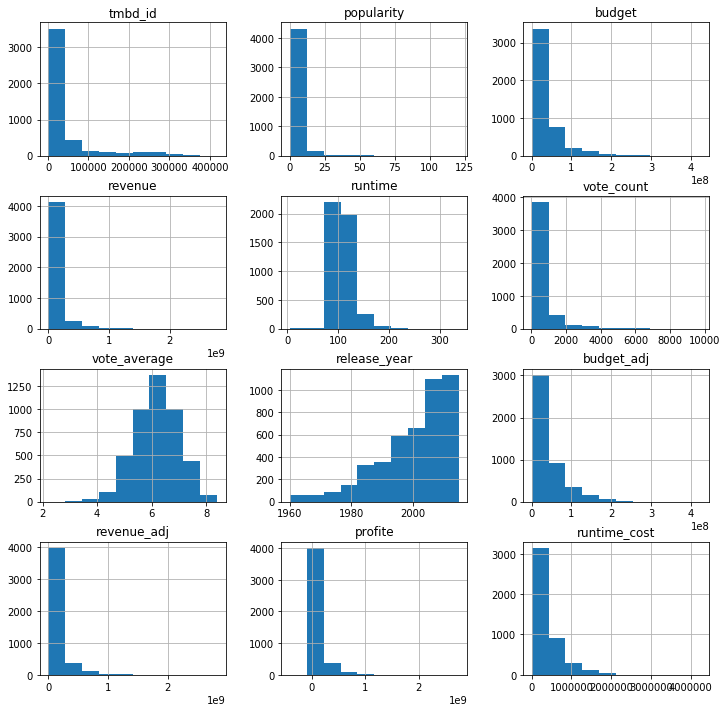

In [106]:
# A quick way to view histograms for all numerical columns in a dataframe is a hist function
dfupdated.hist(figsize=(12,12)); # the ";" removes the unwanted output

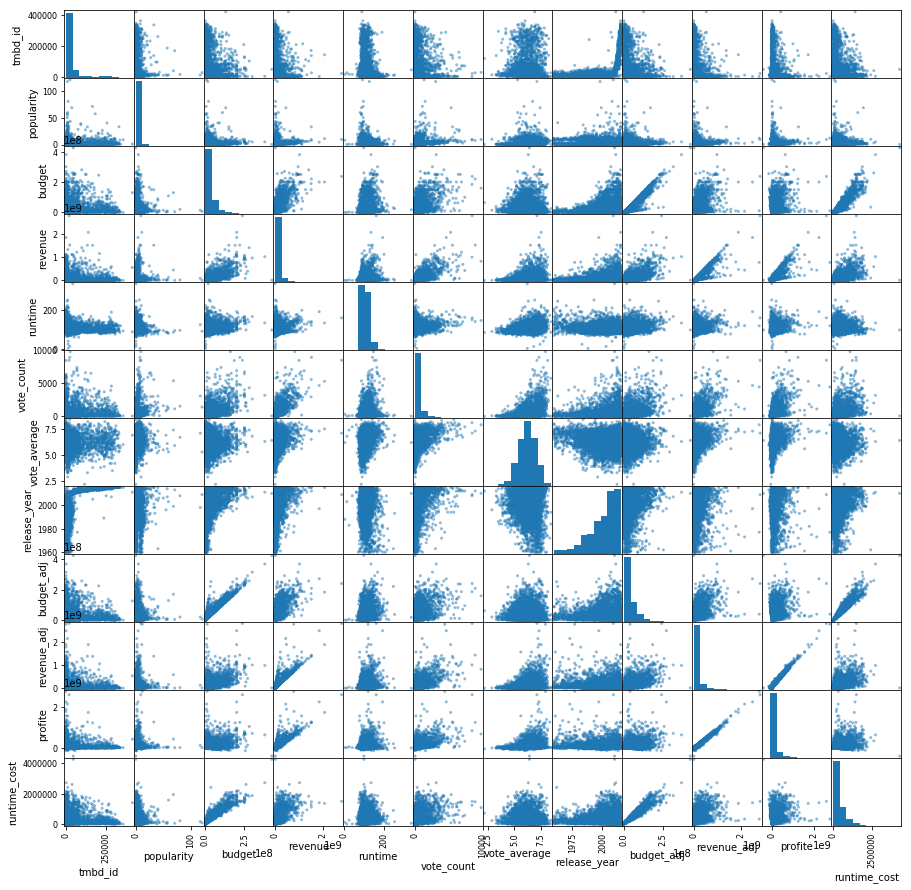

In [107]:
pd.plotting.scatter_matrix(dfupdated, figsize=(15,15));

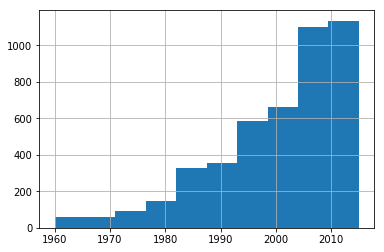

In [108]:
# call histograme for a specific column
dfupdated['release_year'].hist();

In [109]:
# This "value_counts" function aggregates counts for each unique value in a column
dfupdated['release_year'].value_counts()

2011    206
2013    196
2009    194
2014    193
2008    192
2006    191
2010    188
2007    184
2005    180
2012    176
2015    175
2004    160
2002    146
2003    140
2001    133
1999    124
2000    118
1998    111
1996    102
1997    100
1993    100
1995     94
1994     77
1988     74
1986     73
1992     71
1989     70
1990     70
1991     70
1987     64
1985     59
1984     52
1983     42
1982     39
1981     39
1980     36
1978     25
1979     24
1977     23
1976     19
1974     18
1967     16
1973     16
1970     15
1971     14
1975     13
1968     13
1960     12
1961     11
1963     11
1966     10
1972     10
1964     10
1962      9
1965      7
1969      6
Name: release_year, dtype: int64

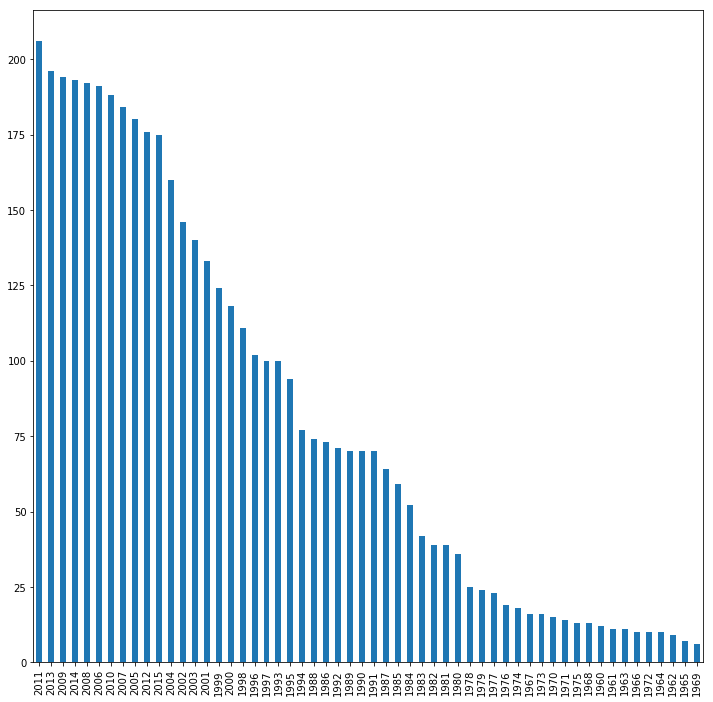

In [110]:
dfupdated['release_year'].value_counts().plot(kind='bar', figsize=(12,12));

### Research Q 1 (Does release year affect the movie watcher -  Internet Impact)

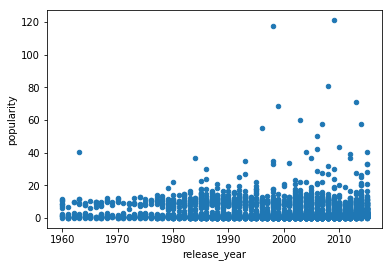

In [111]:
dfupdated.plot(x='release_year', y = 'popularity', kind='scatter');

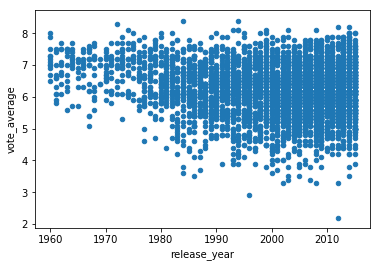

In [112]:
dfupdated.plot(x='release_year', y = 'vote_average', kind='scatter'); 

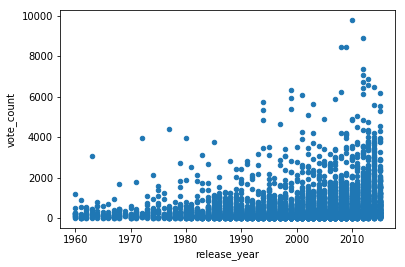

In [113]:
dfupdated.plot(x='release_year', y = 'vote_count', kind='scatter');

### Research Q 1 Conclusion:
- With the avilability of internet people now have more ways to watch movies, & it is not limited any more to the movie theaters, that is reflected on;
1. More movies tends to have higher popularity
2. The average number of votes significattly increase as now the industry has more means to collect the user votes
3. The vote significattly increase as now the industry has more means to collect the user votes

### Research Q 2 (When people tends to vote -  Internet Impact)

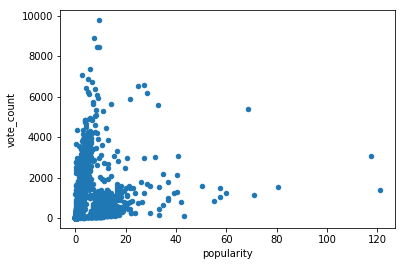

In [114]:
dfupdated.plot(x='popularity', y = 'vote_count', kind='scatter');

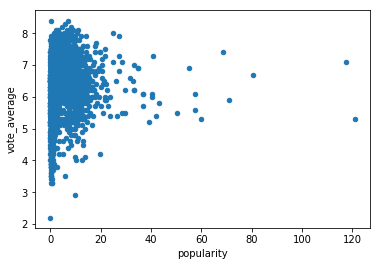

In [115]:
dfupdated.plot(x='popularity', y = 'vote_average', kind='scatter');

### Research Q 2 Conclusion:
1. The most popular movies has les votes count than the less popular
2. The most popular movie has less vote average

- **POV**: As people now has more means to speak-up, peolpe tends to punish the movies that they do not like, & avoid rewarding the movies that they like the most.

### Research Q 3 (Does Recessions periods affect the movie Industry - Economically )
As per [wikipedia](https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States) the following periods had recession
1. Apr 1960–Feb 1961	10 months
2. Dec 1969–Nov 1970	11 months
3. Nov 1973–Mar 1975	1 year 4 months
5. Jan 1980–July 1980	6 months
6. July 1981–Nov 1982	1 year4 months
7. July 1990–Mar 1991	8 months
8. Mar 2001–Nov 2001	8 months
9. Dec 2007–June 2009	1 year6 months

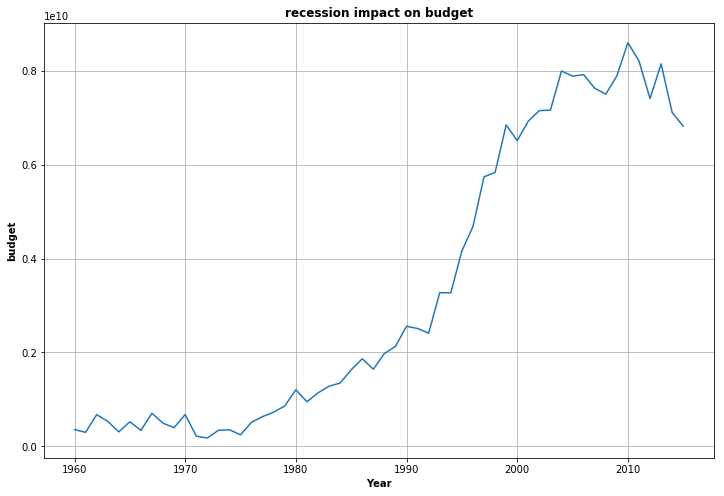

In [116]:
plt.figure(figsize=(12,8))
plt.title('recession impact on budget', weight='bold')
plt.xlabel('Year', weight='bold')
plt.ylabel('budget', weight='bold');
plt.grid()
plt.plot(dfupdated.groupby('release_year').sum()['budget_adj']);

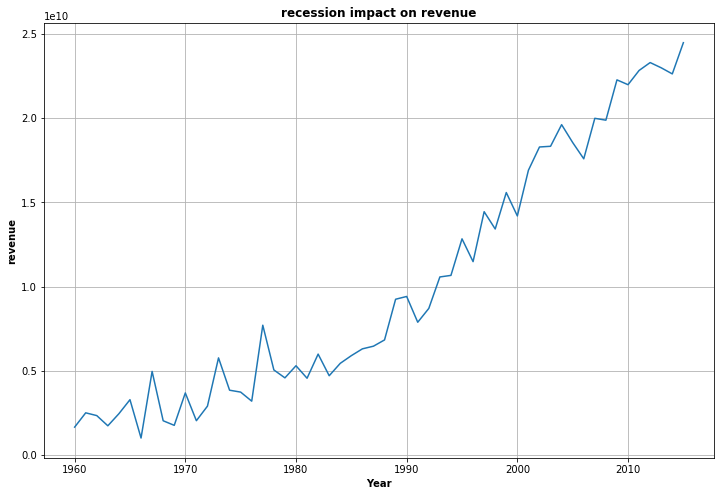

In [117]:
plt.figure(figsize=(12,8))
plt.title('recession impact on revenue', weight='bold')
plt.xlabel('Year', weight='bold')
plt.ylabel('revenue', weight='bold');
plt.grid()
plt.plot(dfupdated.groupby('release_year').sum()['revenue_adj']);

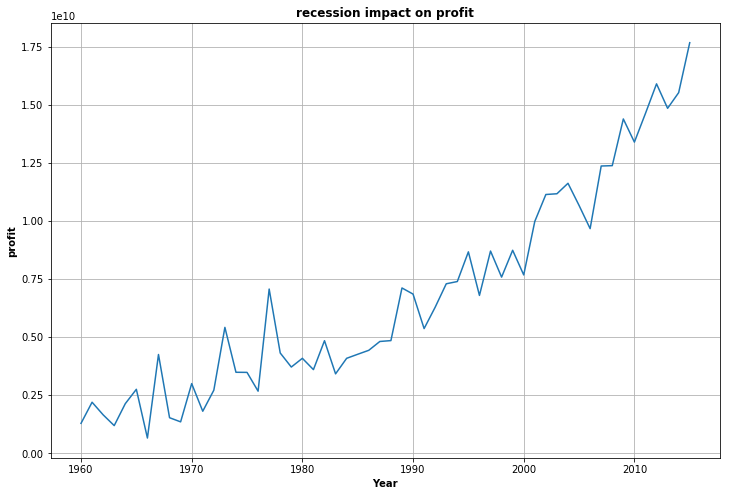

In [118]:
plt.figure(figsize=(12,8))
plt.title('recession impact on profit', weight='bold')
plt.xlabel('Year', weight='bold')
plt.ylabel('profit', weight='bold');
plt.grid()
plt.plot(dfupdated.groupby('release_year').sum()['profite']);

### Research Q 3 Conclusion:
**Budget**
- Their is a decline in movie budget starts with the rescission and continue after the rescission. 
- Longer period of rescission is represented by more budget cuts
**revenue, & Profir**
- Their is an increase in profite & revnue durring recession example (Dec 2007–June 2009), & (Mar 2001–Nov 2001).
- **POV**: My guess is that people tends to look for a cheap way to intertain themselves during hard times

<a id='conclusions'></a>
## Conclusions

- The Avilability of internet & recessision tends to have impact on the movie industry.

### Limitations
- The data is not up to date till today. it will be interesting to compare between the great recession 2007 -2009, & the COVID-19 recession 2020-2021 as their is a significant life style change.
- On line TV producers are not really included. Amazon has only 2 movies, Netflix has only 8 movies included. That can be due to those two companies joined the producers club late. it will be interesting to investigate the difference between the movies they produce and the other industry producers.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [119]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0